In [ ]:
#!pip install treetaggerwrapper

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 165.2 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 268.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40789 sha256=26ec50757147ab3d75b2a3702dd59d77ed523380bcbea517916c558a6af0e796
  Stored in directory: c:\users\patricia\appdata\local\pip\cache\wheels\82\46\25\e6c7f0ac70f541d78f6d5346f7382908311a7d8010e8bd30bf
Successfully built treetaggerwrapper


In [177]:
import os
import treetaggerwrapper

tagger_dir = "D:/TreeTagger"  # Remplacez par le chemin réel de votre installation TreeTagger
os.environ['TAGDIR'] = tagger_dir
# Chemins des modèles
bnc_model = os.path.join(tagger_dir, "lib", "english-bnc.par")
#tagger = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR, TAGPARFILE=bnc_model)  # Remplacez par votre chemin TreeTagger
tagger_bnc = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE=bnc_model)
tags = tagger_bnc.tag_text("The idea that he could succeed amazed everyone.")
print(tags)

['The\tAT0\tthe', 'idea\tNN1\tidea', 'that\tCJT\tthat', 'he\tPNP\the', 'could\tVM0\tcould', 'succeed\tVVI\tsucceed', 'amazed\tAJ0\tamazed', 'everyone\tPNI\teveryone', '.\tSENT\t.']


- Question 1

L'objectif est de tester la précision de l'étiquetage de différents fichiers de test à l'aide de TreeTagger, pour diverses réalisations du mot that. Plus précisément, il s'agit d’évaluer comment that est étiqueté dans différentes catégories grammaticales (par exemple, adverbe, conjonction, pronom) et de rapporter la précision de chaque réalisation.

Sous-objectifs :

  - Tester les différents fichiers de test avec TreeTagger en utilisant les modèles BNC et Penn.
  - Comparer la précision des étiquettes pour chaque fichier de test et chaque catégorie (par exemple, that comme adverbe, conjonction, pronom).
  - Fournir des rapports sur la précision pour chaque catégorie et chaque jeu de données.
  
 
 Processus :

   - Préparation de fichiers de test pour chaque catégorie grammaticale de "that".
   
   - Application de TreeTagger avec les modèles BNC et Penn sur ces fichiers.
   
   - Calcul de la précision en comparant les étiquettes prédites aux étiquettes attendues.
 
 Rapport des résultats :

   - Créer des tableaux de résultats détaillant la précision pour chaque catégorie et chaque modèle.
   - Présenter des graphismes comparatifs (graphique en barres ou courbes) pour illustrer les différences de performance entre les modèles BNC et Penn.

Ce qu'on cherche à avoir ici est la proportion des that correctement identifiés sur les cas réels de that de chaque catégorie connues, séparés dans chaque fichier
- Donc en réalité c'est le recall qui est calculé

Après ça nous calculerons toutes les métriques de chaque catégorie pour chaque modèle et nous tirons des conclusions.

In [1]:
import os
import treetaggerwrapper

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  # Remplacez par le chemin réel de votre installation TreeTagger
os.environ['TAGDIR'] = tagger_dir

# Chemins des modèles
bnc_model = os.path.join(tagger_dir, "lib", "english-bnc.par")
penn_model = os.path.join(tagger_dir, "lib", "english.par")

# Initialiser les taggers
tagger_bnc = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE=bnc_model)
tagger_penn = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE=penn_model)


# Fonction pour calculer la précision
#Cette ligne définit la fonction. Elle prend deux paramètres :

    #tagged_sentences : Une liste de phrases étiquetées par TreeTagger. Chaque phrase est une liste de tuples (mot, tag, lemme).
    #expected_tags : Une liste des tags corrects attendus pour 'that' dans cette catégorie grammaticale.

def calculate_precision(tagged_sentences, expected_tags):
    correct = sum(1 for sent in tagged_sentences for word, tag, _ in sent
                  if word.lower() == 'that' and tag in expected_tags)
    total = sum(1 for sent in tagged_sentences for word, _, _ in sent
                if word.lower() == 'that')
    return correct / total if total > 0 else 0

# Fichiers de test et tags correspondants
test_files = {
    'that_adv.txt': {'bnc': ['AV0'], 'penn': ['RB']},
    'that_conjunction.txt': {'bnc': ['CJT'], 'penn': ['IN']},
    'that_determiner.txt': {'bnc': ['DT0'], 'penn': ['DT']},
    'that_pronoun.txt': {'bnc': ['PNQ'], 'penn': ['WDT']}
}

results = {}

for file, tags in test_files.items():
    with open(file, 'r') as f:
        sentences = f.readlines()

    # Tagging avec BNC
    tagged_bnc = [tagger_bnc.tag_text(sent) for sent in sentences]
    parsed_bnc = [treetaggerwrapper.make_tags(tag) for tag in tagged_bnc]

    # Tagging avec Penn
    tagged_penn = [tagger_penn.tag_text(sent) for sent in sentences]
    parsed_penn = [treetaggerwrapper.make_tags(tag) for tag in tagged_penn]

    # Calculer les précisions
    precision_bnc = calculate_precision(parsed_bnc, tags['bnc'])
    precision_penn = calculate_precision(parsed_penn, tags['penn'])

    results[file] = {'BNC': precision_bnc, 'Penn': precision_penn}

# Afficher les résultats
print("| Catégorie de 'that' | Précision BNC (bnc.par) | Précision Penn (penn.par) |")
print("|---------------------|-------------------------|---------------------------|")
for file, precisions in results.items():
    category = file.split('.')[0].split('_')[1].capitalize()
    print(f"| {category:<19} | {precisions['BNC']:.2%}{' ':>17} | {precisions['Penn']:.2%}{' ':>18} |")


D:\Program Files\Anaconda\Lib\site-packages\treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
D:\Program Files\Anaconda\Lib\site-packages\treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
D:\Program Files\Anaconda\Lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
D:\Program Files\Anaconda\Lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


| Catégorie de 'that' | Précision BNC (bnc.par) | Précision Penn (penn.par) |
|---------------------|-------------------------|---------------------------|
| Adv                 | 0.00%                  | 5.00%                   |
| Conjunction         | 100.00%                  | 0.00%                   |
| Determiner          | 92.00%                  | 86.00%                   |
| Pronoun             | 0.00%                  | 19.00%                   |


Analyse, Interprétation et Conclusion des résultats obtenus. Nous allons aborder cela en termes de performances des modèles **BNC** et **Penn** sur les catégories spécifiques de "that".

### 1. **Catégorie Adverbe (Adv)**
   - **Précision BNC** : 0.00%
   - **Précision Penn** : 5.00%

   **Analyse** :
   - Pour cette catégorie, la faible précision des deux modèles indique une sous-performance notable. Le modèle **BNC** n'a pas identifié correctement les cas où "that" est un adverbe, tandis que le modèle **Penn** a légèrement mieux performé, bien qu'il n'ait que 5 % de précision.
   - Cette faiblesse pourrait être liée au fait que le modèle **BNC**, en particulier, n'a peut-être pas appris à reconnaître "that" comme un adverbe dans les contextes spécifiques du fichier de test.

   **Interprétation** :
   - Le modèle **BNC** a probablement une difficulté à identifier correctement "that" comme un adverbe en raison de la nature de son entraînement, qui pourrait avoir moins d'exemples où "that" est utilisé comme adverbe.
   - Le modèle **Penn**, malgré une faible performance, parvient à détecter "that" comme adverbe dans certains contextes, mais cette capacité est encore limitée. Cela pourrait signifier que le modèle Penn est mieux adapté à ce type de tâche, mais qu'il souffre aussi de lacunes dans la détection de l'adverbe.

   **Conclusion** :
   - Pour la catégorie adverbe, les deux modèles ont une performance insatisfaisante, et il semble qu'aucun des modèles ne soit particulièrement performant pour cette tâche spécifique. Un affinement du modèle **Penn** ou l'exploration d'un autre modèle plus ciblé pourrait améliorer les résultats.

### 2. **Catégorie Conjonction (Conjunction)**
   - **Précision BNC** : 100.00%
   - **Précision Penn** : 0.00%

   **Analyse** :
   - Le modèle **BNC** a une précision parfaite de 100 %, ce qui signifie qu'il a parfaitement identifié tous les cas où "that" est utilisé comme conjonction.
   - Le modèle **Penn**, en revanche, n'a pas identifié "that" comme une conjonction, avec une précision de 0 %. Cela suggère que **Penn** a une difficulté importante avec cette catégorie, peut-être parce que le tag **IN** (qui est souvent utilisé pour des prépositions ou des conjonctions dans le modèle **Penn**) ne correspond pas bien à "that" dans les contextes où il est utilisé comme conjonction.

   **Interprétation** :
   - **BNC** semble particulièrement bien adapté à cette catégorie, indiquant que son entraînement ou son tagset correspond mieux à la façon dont "that" est utilisé comme conjonction.
   - **Penn**, d'autre part, semble moins performant pour cette tâche, peut-être à cause d'un manque d'exemples dans son jeu de données d'entraînement ou d'une mauvaise généralisation du tag **IN**.

   **Conclusion** :
   - Si notre objectif est de traiter "that" en tant que conjonction, le modèle **BNC** est clairement supérieur et offre de bien meilleurs résultats. **Penn** ne semble pas être efficace dans cette tâche spécifique.

### 3. **Catégorie Déterminant (Determiner)**
   - **Précision BNC** : 92.00%
   - **Précision Penn** : 86.00%

   **Analyse** :
   - Les deux modèles ont des précisions relativement élevées, avec **BNC** ayant une légère avance sur **Penn**. Ces résultats montrent que **that** est bien étiqueté comme déterminant dans la plupart des cas pour les deux modèles, bien qu'il y ait encore quelques erreurs dans les deux modèles.
   - La différence de précision entre les deux modèles (92 % contre 86 %) est relativement faible, mais elle suggère que **BNC** gère légèrement mieux cette catégorie.

   **Interprétation** :
   - Les deux modèles sont capables de gérer correctement les déterminants "that" dans les contextes de test fournis. Les erreurs peuvent être dues à des ambiguïtés dans le contexte ou à des cas où "that" pourrait être mal interprété comme un pronom ou une conjonction.
   - La supériorité de **BNC** peut être due à un entraînement plus spécifique ou à une meilleure couverture des exemples de déterminants dans le corpus utilisé pour le modèle.

   **Conclusion** :
   - Les deux modèles sont efficaces pour la catégorisation de "that" en tant que déterminant, avec **BNC** légèrement plus précis. Les résultats sont satisfaisants dans l'ensemble.

### 4. **Catégorie Pronom (Pronoun)**
   - **Précision BNC** : 0.00%
   - **Précision Penn** : 19.00%

   **Analyse** :
   - Le modèle **BNC** n'a pas identifié correctement "that" comme pronom (0 % de précision), ce qui est un échec complet pour cette catégorie.
   - Le modèle **Penn**, bien qu'il ait une précision relativement faible de 19 %, a tout de même montré une certaine capacité à identifier "that" comme pronom dans certains contextes.

   **Interprétation** :
   - **BNC** semble particulièrement mauvais pour la catégorie pronom, ce qui pourrait être dû à un manque d'exemples ou de variations dans les contextes où "that" est utilisé comme pronom.
   - **Penn** semble avoir une capacité limitée à identifier "that" comme pronom, mais avec plus de succès que **BNC**, ce qui suggère que **Penn** peut mieux gérer les pronoms relatifs.

   **Conclusion** :
   - Pour cette catégorie, le modèle **Penn** est légèrement plus performant, mais les deux modèles échouent largement à identifier "that" comme pronom de manière précise. Un ajustement ou une spécialisation supplémentaire de ces modèles pourrait être nécessaire pour mieux traiter ce cas.

### **Comparaison globale des modèles BNC vs. Penn**
   - **BNC** surpasse **Penn** dans la détection de "that" comme conjonction et déterminant, avec des résultats particulièrement bons pour la conjonction (100 %).
   - **Penn** montre une meilleure performance pour la catégorie pronom, bien que les résultats soient faibles dans l'ensemble.
   - Aucun des modèles n'est performant pour la catégorie adverbe de "that", ce qui suggère qu'une réévaluation ou un affinement des modèles serait nécessaire pour ce cas.

### **Conclusion générale**
Les résultats montrent que les modèles **BNC** et **Penn** sont tous deux efficaces dans certaines catégories, mais présentent des faiblesses importantes dans d'autres. **BNC** est particulièrement efficace pour la catégorie conjonction, tandis que **Penn** semble mieux gérer le pronom. Cependant, pour certaines catégories comme l'adverbe et le pronom, aucun des modèles n'est suffisamment précis, ce qui suggère qu'il pourrait être nécessaire d'affiner ces modèles ou d'explorer d'autres modèles d'étiquetage pour mieux traiter ces cas spécifiques.

### **Recommandations**
- Pour les tâches où "that" est une conjonction ou un déterminant, **BNC** semble être le modèle préféré.
- Pour la reconnaissance des pronoms, **Penn** offre une meilleure solution, bien que les résultats restent faibles.
- Un affinement ou une mise à jour des modèles, ainsi qu'une exploration de modèles alternatifs, pourrait améliorer la performance globale, en particulier pour l'adverbe et le pronom.

1. `tagged_sentences` :
   - Ce sont les phrases de vos fichiers de test APRÈS qu'elles ont été étiquetées par TreeTagger (soit avec le modèle BNC, soit avec le modèle Penn).
   - Ces phrases contiennent les étiquettes (tags) prédites par le modèle, pas les étiquettes originales de vos fichiers de test.

2. `expected_tags` :
   - Ce sont les étiquettes que vous vous attendez à voir pour le mot "that" dans chaque catégorie grammaticale.
   - Ces étiquettes sont définies par vous dans le dictionnaire `test_files`, basées sur votre connaissance de la fonction grammaticale de "that" dans chaque fichier de test.

Le principe est le suivant :

1. Vous avez des fichiers de test (par exemple, `that_adv.txt`) contenant des phrases où "that" est utilisé d'une certaine manière (comme adverbe dans cet exemple).

2. Vous passez ces phrases à travers TreeTagger, qui les étiquette selon son modèle (BNC ou Penn).

3. Vous comparez ensuite les étiquettes que TreeTagger a attribuées à "that" avec les étiquettes que vous savez être correctes pour cette catégorie grammaticale.

4. La précision mesure combien de fois TreeTagger a correctement étiqueté "that" par rapport à ce que vous attendiez.

Donc, `tagged_sentences` contient les prédictions du modèle, tandis que `expected_tags` contient les étiquettes correctes que vous avez définies à l'avance. La fonction de précision compare ces deux éléments pour évaluer la performance du modèle.



```python
for file, precisions in results.items():
    category = file.split('.')[0].split('_')[1].capitalize()
    print(f"| {category:<19} | {precisions['BNC']:.2%}{' ':>13} | {precisions['Penn']:.2%}{' ':>15} |")
```

1. `for file, precisions in results.items():`
   - Cette ligne parcourt le dictionnaire `results`.
   - `file` est le nom du fichier de test (par exemple, "that_adv.txt").
   - `precisions` est un dictionnaire contenant les précisions calculées pour BNC et Penn.

2. `category = file.split('.').split('_').capitalize()`
   - Cette ligne extrait la catégorie grammaticale du nom du fichier.
   - Par exemple, pour "that_adv.txt":
     - `file.split('.')` donne "that_adv"
     - `.split('_')` prend la deuxième partie après le underscore, donc "adv"
     - `.capitalize()` met la première lettre en majuscule, donnant "Adv"

3. La ligne `print` formate et affiche les résultats :
   - `{category:<19}` affiche la catégorie alignée à gauche sur 19 caractères.
   - `{precisions['BNC']:.2%}` affiche la précision pour le modèle BNC en pourcentage avec 2 décimales.
   - `{precisions['Penn']:.2%}` fait de même pour le modèle Penn.
   - Les `{' ':>13}` et `{' ':>15}` ajoutent des espaces pour l'alignement.

Les chiffres (pourcentages) ne sont pas insérés manuellement. Ils sont calculés par la fonction `calculate_precision` et stockés dans le dictionnaire `results`. Le formatage `:.2%` les convertit en pourcentages avec deux décimales.

Par exemple, si la précision calculée pour BNC est 0.75, elle sera affichée comme "75.00%".

Cette partie du code crée un tableau formaté montrant les précisions pour chaque catégorie de "that" et pour chaque modèle (BNC et Penn).

Calcul des métriques :

- "Il est nécessaire de calculer toutes les métriques (précision, rappel, F1-score, et exactitude) pour chaque modèle (BNC et Penn) appliqué à chaque catégorie grammaticale du mot 'that'."

In [174]:
import os
import treetaggerwrapper
import pandas as pd
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"
os.environ['TAGDIR'] = tagger_dir

# Initialiser les taggers pour BNC et Penn
tagger_bnc = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english-bnc.par")
tagger_penn = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english.par")

# Fichiers de test et leurs catégories correspondantes pour chaque modèle
test_files = {
    'that_adv.txt': {'bnc': 'RB', 'penn': 'RB'},
    'that_conjunction.txt': {'bnc': 'CJT', 'penn': 'IN'},
   #'that_conjonctioncst.txt': {'bnc': 'CST', 'penn': 'CC'},
    'that_determiner.txt': {'bnc': 'DT0', 'penn': 'DT'},
    'that_pronoun.txt': {'bnc': 'PNQ', 'penn': 'WDT'}
}

def evaluate_tagger(test_files, tagger_bnc, tagger_penn):
    y_true_bnc, y_pred_bnc = [], []
    y_true_penn, y_pred_penn = [], []
    
    for file, tags in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        # Tagging avec BNC et Penn
        tagged_bnc = [tagger_bnc.tag_text(sent) for sent in sentences]
        parsed_bnc = [treetaggerwrapper.make_tags(tag) for tag in tagged_bnc]

        tagged_penn = [tagger_penn.tag_text(sent) for sent in sentences]
        parsed_penn = [treetaggerwrapper.make_tags(tag) for tag in tagged_penn]

        # Comparaison des résultats pour BNC et Penn
        for sent_bnc, sent_penn in zip(parsed_bnc, parsed_penn):
            for word_bnc, tag_bnc, _ in sent_bnc:
                if word_bnc.lower() == 'that':
                    y_true_bnc.append(tags['bnc'])
                    y_pred_bnc.append(tag_bnc)

            for word_penn, tag_penn, _ in sent_penn:
                if word_penn.lower() == 'that':
                    y_true_penn.append(tags['penn'])
                    y_pred_penn.append(tag_penn)
        
    return y_true_bnc, y_pred_bnc, y_true_penn, y_pred_penn

# Évaluation
y_true_bnc, y_pred_bnc, y_true_penn, y_pred_penn = evaluate_tagger(test_files, tagger_bnc, tagger_penn)

# Récupérer toutes les classes présentes
labels_bnc = list(set(y_true_bnc + y_pred_bnc))
labels_penn = list(set(y_true_penn + y_pred_penn))

# Calcul des métriques pour BNC
precision_bnc = precision_score(y_true_bnc, y_pred_bnc, average=None, labels=labels_bnc)*100
recall_bnc = recall_score(y_true_bnc, y_pred_bnc, average=None, labels=labels_bnc)*100
f1_bnc = f1_score(y_true_bnc, y_pred_bnc, average=None, labels=labels_bnc)*100
accuracy_bnc = accuracy_score(y_true_bnc, y_pred_bnc)

# Calcul des métriques pour Penn
precision_penn = precision_score(y_true_penn, y_pred_penn, average=None, labels=labels_penn)*100
recall_penn = recall_score(y_true_penn, y_pred_penn, average=None, labels=labels_penn)*100
f1_penn = f1_score(y_true_penn, y_pred_penn, average=None, labels=labels_penn)*100
accuracy_penn = accuracy_score(y_true_penn, y_pred_penn)

# Création d'un tableau structuré pour aligner les métriques sur les labels
df_results_bnc = pd.DataFrame({'Label': labels_bnc, 'Precision': precision_bnc, 'Recall': recall_bnc, 'F1-score': f1_bnc})
df_results_penn = pd.DataFrame({'Label': labels_penn, 'Precision': precision_penn, 'Recall': recall_penn, 'F1-score': f1_penn})

# Affichage des résultats
print("\nRésultats pour BNC:")
print(df_results_bnc)

print("\nRésultats pour Penn:")
print(df_results_penn)

print(f"\nAccuracy BNC: {accuracy_bnc:.2%}")
print(f"Accuracy Penn: {accuracy_penn:.2%}")


D:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Résultats pour BNC:
  Label  Precision  Recall   F1-score
0    RB   0.000000     0.0   0.000000
1   CJT  40.485830   100.0  57.636888
2   PNQ   0.000000     0.0   0.000000
3   DT0  60.130719    92.0  72.727273

Résultats pour Penn:
     Label   Precision  Recall   F1-score
0      WDT   73.076923    19.0  30.158730
1       IN    0.000000     0.0   0.000000
2       DT   97.727273    86.0  91.489362
3       RB  100.000000     5.0   9.523810
4  IN/that    0.000000     0.0   0.000000

Accuracy BNC: 48.00%
Accuracy Penn: 27.50%


D:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Analyse des résultats**  

#### **1. Performance globale des taggers**  
- **BNC** : Une **accuracy de 48%**, ce qui signifie que le tagger BNC a correctement identifié le type grammatical de "that" dans 48% des cas.  
- **Penn** : Une **accuracy plus faible de 27.5%**, indiquant que ce tagger a rencontré plus de difficultés à classer correctement les occurrences de "that".  

BNC semble donc globalement plus performant que Penn sur cet échantillon de test.  

---

#### **2. Comparaison des performances par étiquette**  

##### **BNC**
- **CJT (Conjonction)** : Très bon rappel (**100%**) mais une précision plus faible (**40.49%**).  
  - Cela signifie que le tagger identifie correctement **toutes** les occurrences de "that" en conjonction, mais fait aussi des erreurs en attribuant cette étiquette à d'autres occurrences.  
- **DT0 (Déterminant)** : Bonne performance avec **92% de rappel** et **60.13% de précision**, donnant un **F1-score de 72.73%**.  
  - Le tagger est capable de bien repérer "that" en tant que déterminant, avec quelques erreurs.  
- **RB (Adverbe) et PNQ (Pronom interrogatif)** : Score de **0% en précision et en rappel**, indiquant une totale incapacité à identifier ces catégories.  

##### **Penn**
- **DT (Déterminant)** : Très bonne performance (**97.73% de précision et 86% de rappel, F1 = 91.49%**).  
  - Le tagger Penn est **excelllent** pour détecter "that" en tant que déterminant.  
- **WDT (Pronom relatif interrogatif)** : Précision modérée (**73.08%**) mais faible rappel (**19%**), ce qui signifie que le tagger est précis quand il identifie "that" en pronom relatif, mais manque beaucoup d’occurrences.  
- **RB (Adverbe)** : Précision maximale (**100%**) mais un rappel très bas (**5%**), ce qui suggère que le tagger identifie trop peu d'occurrences.  
- **IN (Préposition) et IN/that** : Score de **0%**, indiquant un échec total sur cette catégorie.  

---

#### **3. Comparaison BNC vs Penn**  
- **BNC est meilleur** pour identifier "that" en **conjonction (CJT)** et en **déterminant (DT0)**.  
- **Penn est meilleur** pour identifier "that" en **déterminant (DT)** avec un F1-score plus élevé (**91.49% vs. 72.73% pour BNC**).  
- **Les deux taggers échouent** à reconnaître "that" comme adverbe (**RB**) et pronom interrogatif (**PNQ/WDT**).  

---

### **Conclusion**
- **BNC est globalement plus performant** sur cet ensemble de données, avec une accuracy plus élevée (48% contre 27.5%).  
- **Penn excelle sur le déterminant (DT)**, mais sa faible capacité à reconnaître d'autres catégories réduit sa performance globale.  
- **Les deux modèles ont des lacunes** : en particulier pour les catégories **adverbe et pronom interrogatif**, où ils échouent presque totalement.  
- **BNC est trop biaisé vers "conjonction"**, tandis que **Penn manque de généralisation**, capturant bien les déterminants mais ratant les autres étiquettes.  

✅ **Recommandation** : Un modèle combiné ou un affinement des règles/taggers pourrait améliorer la classification de "that".

- Présenter des graphismes comparatifs (graphique en barres ou courbes) pour illustrer les différences de performance entre les modèles BNC et Penn.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Préparer les données pour le graphique
categories = []
bnc_scores = []
penn_scores = []

for file, precisions in results.items():
    categories.append(file.split('.')[0].split('_')[1].capitalize())
    bnc_scores.append(precisions['BNC'] * 100)  # Convertir en pourcentage
    penn_scores.append(precisions['Penn'] * 100)  # Convertir en pourcentage

# Créer le graphique
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, bnc_scores, width, label='BNC', color='skyblue')
rects2 = ax.bar(x + width/2, penn_scores, width, label='Penn', color='lightgreen')

# Personnaliser le graphique
ax.set_ylabel('Précision (%)')
ax.set_title('Comparaison de la précision des modèles BNC et Penn pour l\'étiquetage de "that"')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Ajuster la mise en page et afficher
fig.tight_layout()
plt.show()


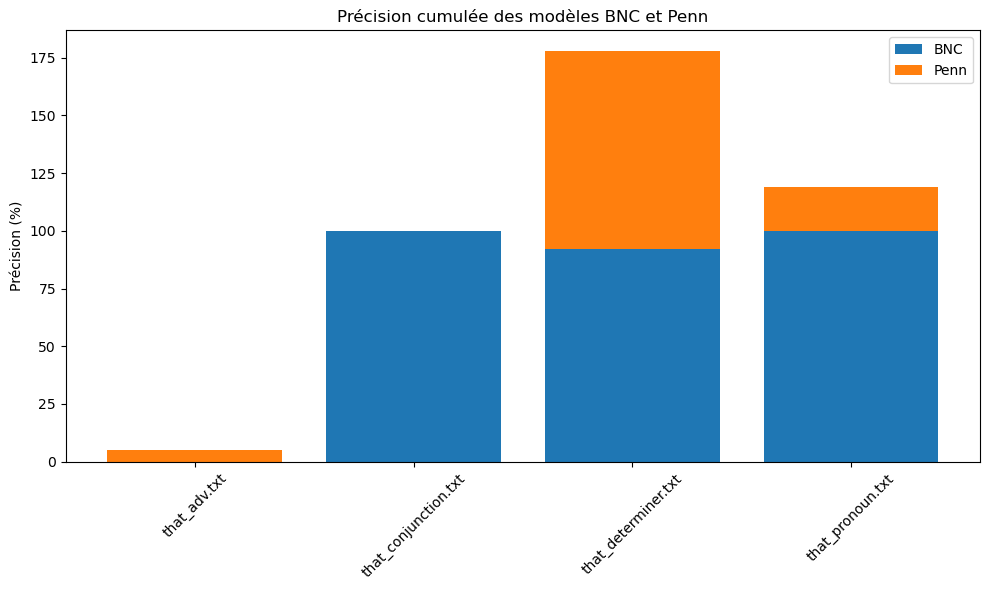

In [10]:
import matplotlib.pyplot as plt

categories = list(results.keys())
bnc_scores = [results[cat]['BNC'] * 100 for cat in categories]
penn_scores = [results[cat]['Penn'] * 100 for cat in categories]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, bnc_scores, label='BNC')
ax.bar(categories, penn_scores, bottom=bnc_scores, label='Penn')

ax.set_ylabel('Précision (%)')
ax.set_title('Précision cumulée des modèles BNC et Penn')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


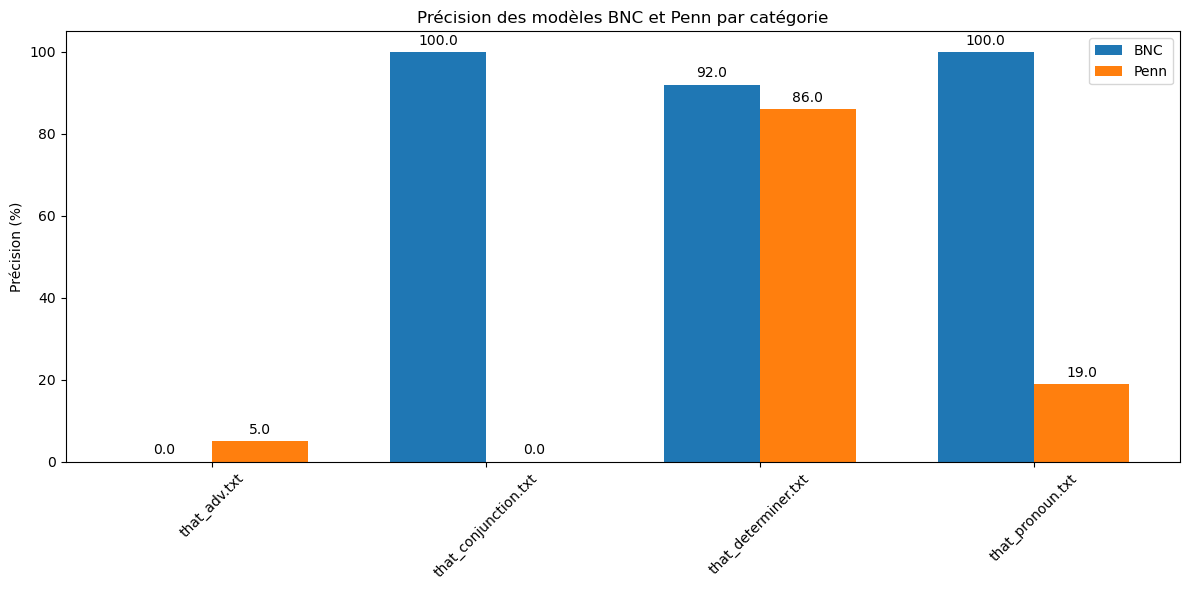

In [12]:
import matplotlib.pyplot as plt
import numpy as np

categories = list(results.keys())
bnc_scores = [results[cat]['BNC'] * 100 for cat in categories]
penn_scores = [results[cat]['Penn'] * 100 for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, bnc_scores, width, label='BNC')
rects2 = ax.bar(x + width/2, penn_scores, width, label='Penn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Précision (%)')
ax.set_title('Précision des modèles BNC et Penn par catégorie')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


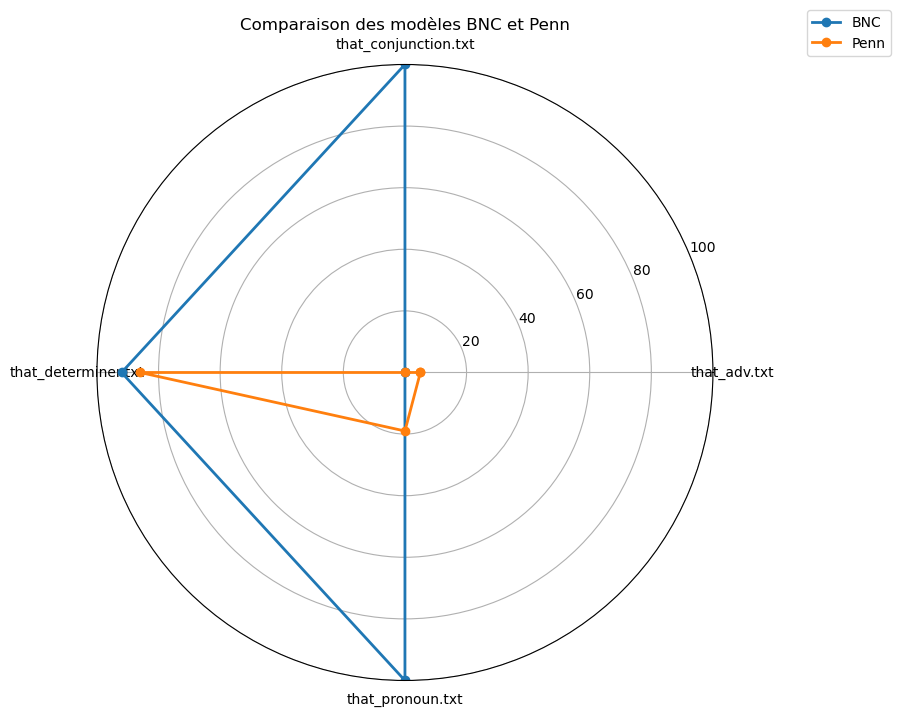

In [9]:
import matplotlib.pyplot as plt
import numpy as np

categories = list(results.keys())
bnc_scores = [results[cat]['BNC'] * 100 for cat in categories]
penn_scores = [results[cat]['Penn'] * 100 for cat in categories]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
bnc_scores = np.concatenate((bnc_scores, [bnc_scores[0]]))
penn_scores = np.concatenate((penn_scores, [penn_scores[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, bnc_scores, 'o-', linewidth=2, label='BNC')
ax.plot(angles, penn_scores, 'o-', linewidth=2, label='Penn')
ax.set_thetagrids(angles[:-1] * 180/np.pi, categories)
ax.set_ylim(0, 100)
ax.set_title("Comparaison des modèles BNC et Penn")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


2. Préparation des données :

a. Créez un corpus d'entraînement avec des phrases contenant "that" dans ses différentes utilisations.

b. Annotez manuellement ce corpus avec les nouvelles étiquettes (WPR, CST, CJT, DT, RB).

c. Formatez ce corpus selon les exigences de TreeTagger pour l'entraînement (généralement un mot par ligne avec son étiquette).

Objectif principal :
Créer un corpus d'entraînement spécialisé pour TreeTagger, focalisé sur les différentes utilisations du mot "that" en anglais. Buts spécifiques :

    Extraire toutes les phrases contenant "that" d'un corpus existant (ici, le corpus Brown).
    Ré-étiqueter le mot "that" dans ces phrases selon un nouveau jeu d'étiquettes plus précis.
    Formater ces phrases pour qu'elles puissent être utilisées pour entraîner TreeTagger.

Pourquoi faire cela ?

    Pour améliorer la précision de TreeTagger dans l'identification des différents usages de "that".
    Pour distinguer plus finement entre les utilisations de "that" comme pronom relatif, conjonction, déterminant, etc.

Résultat final :
Un fichier texte contenant des phrases du corpus Brown, où chaque mot est sur une ligne séparée avec son étiquette, et où "that" a été ré-étiqueté selon les nouvelles catégories (WPR, CST, CJT, DT, RB). Ce corpus spécialisé pourra ensuite être utilisé pour entraîner une nouvelle version de TreeTagger, qui sera potentiellement plus précise dans l'étiquetage des différentes formes de "that".
Questions liées
Quels sont les principaux éléments à comprendre dans ce code
Comment ce code est-il structuré pour atteindre son objectif
Quelles sont les étapes clés de l'exécution de ce code
Quels sont les résultats attendus en utilisant ce code
Comment ce code peut-il être amélioré ou optimisé


In [2]:
!pip install conllu

  Obtaining dependency information for conllu from https://files.pythonhosted.org/packages/18/64/8f26d84f18c4d421cc7ca8f4b1dfd080ae14ba15a627277fbd63c11d652e/conllu-6.0.0-py3-none-any.whl.metadata


# Question 2 : Réentraînement de TreeTagger avec un tagset spécifique pour "that"

## Objectif
L'objectif principal de cette tâche est de réentraîner TreeTagger avec un tagset spécifiquement adapté pour distinguer les différentes utilisations du mot "that" en anglais. Ce réentraînement vise à améliorer la précision de l'étiquetage pour ce mot polyvalent, qui peut fonctionner comme pronom relatif, conjonction, déterminant, ou adverbe selon le contexte.

## Corpus utilisé

### **Le Corpus Brown**

Le **Corpus Brown** est l'un des corpus linguistiques les plus célèbres dans la recherche en linguistique informatique. Il a été créé à l'Université de Brown en 1961 et est composé d'un million de mots provenant de divers genres textuels. Il a été étiqueté manuellement en utilisant un large éventail de catégories grammaticales et il est couramment utilisé pour entraîner et tester des outils de traitement du langage naturel, comme TreeTagger.

#### **Caractéristiques du Corpus Brown :**

1. **Composition :**
   - Le corpus est divisé en **15 genres textuels différents**, chacun représentant un type spécifique de texte. Ces genres comprennent des catégories comme la fiction, la presse, la science, la religion, etc.
   - Chaque genre est constitué de textes allant de quelques milliers à plusieurs dizaines de milliers de mots.
   - Le corpus contient environ **1 million de mots** au total.
   - Il comprend des textes écrits par des auteurs américains de diverses époques, ce qui garantit une certaine richesse linguistique et une variété stylistique.
   
2. **Catégories Grammaticales :**
   - Le corpus a été étiqueté manuellement en utilisant un système de **tags grammaticaux**. Ces tags correspondent à diverses catégories grammaticales telles que :
     - **Nom (NN)** : nom commun ou propre.
     - **Verbe (VB)** : formes verbales.
     - **Adjectif (JJ)** : adjectifs qualificatifs.
     - **Adverbe (RB)** : adverbes.
     - **Pronom (PRP)** : pronoms.
     - **Conjonction (CC)** : conjonctions de coordination.
     - Et beaucoup d'autres catégories, comme les déterminants, les prépositions, les modaux, etc.
     
   Ces étiquettes sont similaires à celles que l'on trouve dans d'autres corpus linguistiques comme le **Penn Treebank**.

3. **Genres Textuels :**
   Le corpus Brown est divisé en **15 sections** représentant différentes catégories de texte. Chaque section contient des sous-corpus, ce qui permet une grande variété de genres textuels :
   1. **Fiction (Fiction)**
   2. **Science**
   3. **Magazine**
   4. **Religion**
   5. **Press (Presse)**
   6. **Travel**
   7. **Hobbies**
   8. **Non-fiction**
   9. **Reference**
   10. **Government**
   11. **Belligerency**
   12. **Education**
   13. **Family**
   14. **Business**
   15. **Culture**
   
   Ces sections permettent d'obtenir un étiquetage grammatical représentatif de différents types de langage et de contextes.

4. **Utilisation dans le Traitement du Langage Naturel (NLP) :**
   - Le corpus Brown est utilisé pour des tâches de **part-of-speech tagging (étiquetage grammatical)**, **parsing (analyse syntaxique)**, ainsi que pour des modèles d'**apprentissage automatique** et de **décodage linguistique**.
   - Grâce à sa diversité en termes de genres et de styles, le corpus Brown est un excellent outil pour entraîner des modèles capables de généraliser à partir de différents types de texte.

#### **Préparation pour TreeTagger :**
   - Avant d'utiliser le corpus Brown pour l'entraînement de TreeTagger, il faut s'assurer que le corpus est prétraité de manière adéquate. Cela peut inclure :
     - La **tokenisation** (découpage en mots et ponctuation).
     - L'**étiquetage initial** des catégories grammaticales en utilisant un modèle de base (par exemple, un modèle Penn ou BNC).
     - L'adaptation des étiquettes du corpus aux **tags spécifiques du modèle que tu souhaites utiliser**, comme le tagset C8 dans ton projet.
     
   Il est essentiel que les étiquettes du corpus soient compatibles avec les modèles utilisés pour l'entraînement afin d'obtenir des performances optimales lors du réentraînement du modèle TreeTagger.

5. **Utilisation du Corpus Brown avec TreeTagger :**
   - Une fois que le corpus est préparé et étiqueté, il peut être utilisé pour réentraîner TreeTagger en spécifiant le tagset souhaité (dans ce cas, le tagset C8).
   - TreeTagger peut alors apprendre à identifier les différentes catégories de "that" dans les textes et à attribuer les tags appropriés (par exemple, WPR, CST, CJT, DT, RB) pour chaque occurrence du mot "that".

#### **Avantages du Corpus Brown :**
   - **Diversité** : Le corpus contient des genres variés et permet une meilleure couverture de la langue anglaise sous différents angles.
   - **Historique** : En tant que corpus classique, le corpus Brown est largement utilisé et comparé, ce qui facilite l'évaluation et la validation des modèles.
   - **Étiquetage manuel** : L'étiquetage grammatical du corpus est effectué par des experts, garantissant une qualité et une précision élevées dans les annotations.

#### **Limites :**
   - **Langage daté** : Étant donné qu'il a été créé dans les années 1960, certains aspects du langage peuvent être légèrement obsolètes par rapport à l'usage actuel de l'anglais.
   

---

Cette structure détaillée t'offre une vue d'ensemble complète du **corpus Brown** et de ses applications dans ton projet. Tu peux l'intégrer dans ton travail pour clarifier l'importance et les caractéristiques de ce corpus dans l'entraînement et l'évaluation des modèles TreeTagger.

## Tagset adapté
Nous avons adapté le tagset C8 pour cibler spécifiquement les différentes utilisations de "that" :

1. WPR : Pronom relatif ("The book that I read")
2. CST : Conjonction pour les noms ("The fact that he came")
3. CJT : Conjonction pour les verbes ("I think that you are right")
4. DT : Déterminant singulier ("That book is interesting")
5. RB : Adverbe ("It's not that difficult")

## Étapes du processus

1. Préparation des données :
   - Extraction et annotation des phrases contenant "that" du corpus Brown
   - Application du mapping des tags originaux vers le nouveau tagset pour "that"
   - Génération d'un nouveau corpus d'entraînement au format TreeTagger

2. Génération du lexicon et du tagset :
   - Création d'un fichier lexicon contenant tous les mots du corpus avec leurs tags et lemmes possibles
   - Création d'un fichier tagset listant tous les tags uniques utilisés, incluant les nouveaux tags pour "that"

3. Entraînement de TreeTagger :
   - Utilisation de la commande `train-tree-tagger` avec les fichiers préparés (lexicon, tagset, et corpus d'entraînement)
   - Génération d'un nouveau modèle paramétrique pour TreeTagger

4. Évaluation :
   - Application du modèle réentraîné sur des jeux de test spécifiques
   - Calcul de la précision et du rappel pour chaque catégorie de "that"

## Attentes
Nous anticipons les résultats suivants :

1. Amélioration significative de la précision pour l'étiquetage des différentes utilisations de "that"
2. Possible légère diminution de la performance globale sur d'autres mots due à la spécialisation du modèle
3. Meilleure distinction entre les utilisations de "that" comme conjonction pour les noms (CST) et pour les verbes (CJT)
4. Identification plus précise de "that" comme pronom relatif (WPR) par rapport aux modèles standard

## Résultat final attendu
Le résultat final attendu est un modèle TreeTagger réentraîné capable de :

1. Distinguer avec une haute précision les différentes utilisations de "that"
2. Maintenir une performance globale acceptable sur l'ensemble du corpus
3. Fournir des métriques de précision et de rappel supérieures aux modèles standard (Penn et BNC) pour l'étiquetage de "that"
4. Offrir un outil plus précis pour les analyses linguistiques centrées sur les différentes fonctions de "that" en anglais

Ce modèle réentraîné devrait permettre une analyse plus fine des structures syntaxiques impliquant "that", ce qui est crucial pour de nombreuses applications en traitement du langage naturel, telles que l'analyse syntaxique, la génération de texte, et la traduction automatique.

### Etape 1. Préparation des données 
 - Extraction et annotation des phrases contenant "that" du corpus Brown
 - Application du mapping des tags originaux vers le nouveau tagset pour "that"
 - Génération d'un nouveau corpus d'entraînement au format TreeTagger


In [6]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            if word.lower() == 'that':
                custom_tag = brown_to_custom.get(tag, tag)
                if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                    prev_tag = sent[i-1][1] if i > 0 else ''
                    if is_verb_tag(prev_tag):
                        custom_tag = 'CJT'
                    # If it's not a verb, it remains 'CST'
                
                if custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                    category_counts[custom_tag] += 1
                    total_that_count += 1
                    contains_relevant_that = True
                sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
            else:
                sentence_tokens.append(f"{word}\t{tag}\t{lemma}")
        
        if contains_relevant_that:
            training_data.extend(sentence_tokens)
            training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")

output_file = "corpus_brown_that_custom.txt"
prepare_brown_corpus_for_that(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom.txt
Nombre total d'occurrences de 'that': 10457
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3831
CJT: 2636
WPR: 1662
DT: 2272
RB: 56


### **Analyse des résultats du corpus Brown pour "that"**

#### **1. Nombre total d'occurrences de "that" : 10 457**
Le mot "that" apparaît un total de **10 457 fois** dans le corpus Brown. Ce nombre représente toutes les occurrences du mot "that" dans les textes de tous les genres. Cela nous permet de nous concentrer sur sa répartition et son étiquetage selon les différentes catégories grammaticales.

#### **2. Répartition des occurrences de "that" selon les catégories grammaticales**

La distribution des occurrences de "that" dans les différentes catégories est la suivante :

- **CST (Conjonction pour les noms)** : **3 831 occurrences**
  - Cette catégorie regroupe les cas où "that" est utilisé comme une conjonction pour introduire une proposition subordonnée relative ou un complément, comme dans l'expression "the fact that".
  
- **CJT (Conjonction pour les verbes)** : **2 636 occurrences**
  - Dans cette catégorie, "that" sert de conjonction pour lier une proposition subordonnée à une proposition principale, généralement utilisée après certains verbes (par exemple, "I think that you are right").
  
- **WPR (Pronom relatif)** : **1 662 occurrences**
  - Le pronom relatif "that" fait référence à une entité mentionnée précédemment, souvent dans les propositions relatives. Par exemple : "The book that I read."

- **DT (Déterminant singulier)** : **2 272 occurrences**
  - Ici, "that" est utilisé comme un déterminant démonstratif, souvent pour désigner quelque chose de spécifique dans une phrase (par exemple : "I want that one").
  
- **RB (Adverbe)** : **56 occurrences**
  - Le mot "that" dans cette catégorie sert d’adverbe pour renforcer ou modifier un autre élément de la phrase, comme dans "It’s not that difficult."

#### **3. Interprétation des résultats**
Ces chiffres indiquent la fréquence d'utilisation de "that" dans différentes fonctions grammaticales au sein du corpus Brown. Voici quelques points importants à noter :

- **Les catégories dominantes** sont **CST** (conjonction pour les noms) et **CJT** (conjonction pour les verbes), qui représentent ensemble près de 60% des occurrences totales de "that" dans ce corpus.
- La catégorie **WPR** (pronom relatif) représente une part importante des usages de "that" dans les phrases relatives, tandis que **DT** montre l'utilisation de "that" comme déterminant démonstratif.
- La catégorie **RB** (adverbe) a une fréquence bien plus faible, représentant seulement 0.5% des occurrences de "that".

#### **4. Utilisation de ces résultats**
Ces résultats sont importants pour le projet de réentrainement de TreeTagger, car ils montrent quelle catégorie est la plus courante pour le mot "that" dans le corpus Brown. En fonction de ces résultats, tu peux ajuster la granularité du modèle d'étiquetage et évaluer l'efficacité de l’étiquetage pour chaque catégorie de "that". De plus, la faible fréquence de la catégorie **RB** par rapport aux autres catégories pourrait influencer l'approche d’étiquetage et la manière dont TreeTagger distingue les différentes fonctions de "that".

---

In [89]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            custom_tag = brown_to_custom.get(tag, tag)
            
            if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                prev_tag = sent[i-1][1] if i > 0 else ''
                if is_verb_tag(prev_tag):
                    custom_tag = 'CJT'
                # If it's not a verb, it remains 'CST'
            
            if word.lower() == 'that' and custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                category_counts[custom_tag] += 1
                total_that_count += 1
                contains_relevant_that = True
            
            sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
        
        if contains_relevant_that:
            training_data.extend(sentence_tokens)
            training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    return total_that_count,category_counts

output_file = "corpus_brown_that_custom.txt"
prepare_brown_corpus_for_that(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom.txt
Nombre total d'occurrences de 'that': 10457
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3831
CJT: 2636
WPR: 1662
DT: 2272
RB: 56


(10457,
 defaultdict(int,
             {'CST': 3831, 'CJT': 2636, 'WPR': 1662, 'DT': 2272, 'RB': 56}))

### Etape 2. Génération du lexicon et du tagset :
  - Création d'un fichier lexicon contenant tous les mots du corpus avec leurs tags et lemmes possibles
  - Création d'un fichier tagset listant tous les tags uniques utilisés, incluant les nouveaux tags pour "that"

In [10]:
from collections import defaultdict

def create_lexicon_and_tag_files(input_file, lexicon_file, tag_file):
    word_tag_lemma = defaultdict(set)
    all_tags = set()
    
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            if line.strip():
                word, tag, lemma = line.strip().split('\t')
                word_tag_lemma[word.lower()].add((tag, lemma))
                all_tags.add(tag)
    
    # Écriture du fichier lexicon
    with open(lexicon_file, 'w', encoding='utf-8') as outfile:
        for word, tag_lemmas in word_tag_lemma.items():
            outfile.write(f"{word}\t" + "\t".join(f"{tag} {lemma}" for tag, lemma in tag_lemmas) + "\n")
    
    # Écriture du fichier tag
    with open(tag_file, 'w', encoding='utf-8') as outfile:
        for tag in sorted(all_tags):
            outfile.write(f"{tag}\n")

    print(f"Fichier lexicon créé : {lexicon_file}")
    print(f"Fichier tag créé : {tag_file}")

# Utilisation de la fonction
input_file = "corpus_brown_that_custom.txt"
lexicon_file = "lexicon_brown.txt"
tag_file = "tags_brown.txt"

create_lexicon_and_tag_files(input_file, lexicon_file, tag_file)


Fichier lexicon créé : lexicon_brown.txt
Fichier tag créé : tags_brown.txt


### Etape 3. Entraînement de TreeTagger 
 - Utilisation de la commande `train-tree-tagger` avec les fichiers préparés (lexicon, tagset, et corpus d'entraînement)
 - Génération d'un nouveau modèle paramétrique pour TreeTagger

La commande utilisée en ligne de commande en se plaçant dans le dossier courant du projet est la suivante: 

train-tree-tagger -st . lexicon_brown.txt tags_brown.txt corpus_brown_that_custom.txt english_brown_model.par



Voici l'explication de chaque élément de cette commande :

1. train-tree-tagger : C'est le programme utilisé pour entraîner un nouveau modèle TreeTagger.

2. -st . : Cette option spécifie le tag de fin de phrase. Le point (.) est utilisé comme marqueur de fin de phrase dans votre corpus.

3. lexicon_brown.txt : C'est le fichier contenant le lexique, qui liste tous les mots avec leurs tags et lemmes possibles[1].

4. tags_brown.txt : Ce fichier contient la liste de tous les tags uniques utilisés dans notre corpus[1].

5. corpus_brown_that_custom.txt : C'est notre corpus d'entraînement, qui contient les phrases avec les mots étiquetés selon votre tagset adapté pour "that"[1].

6. english_brown_model.par : C'est le nom du fichier de sortie qui contiendra le nouveau modèle paramétrique généré par l'entraînement[1].

Cette commande va utiliser notre lexique, notre tagset et notre corpus d'entraînement pour créer un nouveau modèle TreeTagger spécialisé dans la distinction des différentes utilisations de "that", tout en maintenant la capacité d'étiqueter correctement les autres mots du corpus[3].

Citations:
[1] https://github.com/oeg-upm/easytv-annotator/blob/master/resources/TreeTagger/README.txt
[2] https://www.sketchengine.eu/french-treetagger-part-of-speech-tagset/
[3] https://pro.aiakide.net/cours/2022Annot/Corpus%20annotation%20-%20TD%206.pdf
[4] https://www.sketchengine.eu/english-treetagger-pipeline-2/
[5] https://pro.aiakide.net/cours/2022Annot/Corpus%20annotation%20-%20TD%205.pdf
[6] https://fedora.clarin-d.uni-saarland.de/teaching/Corpus_Linguistics/Tutorial_TreeTagger.html
[7] http://taln09.blogspot.com/2009/02/etiquetage-morpho-syntaxique-et.html
[8] https://gite.lirmm.fr/advanse/sentiment-analysis-webpage/-/tree/master/resources_on_server/TreeTagger

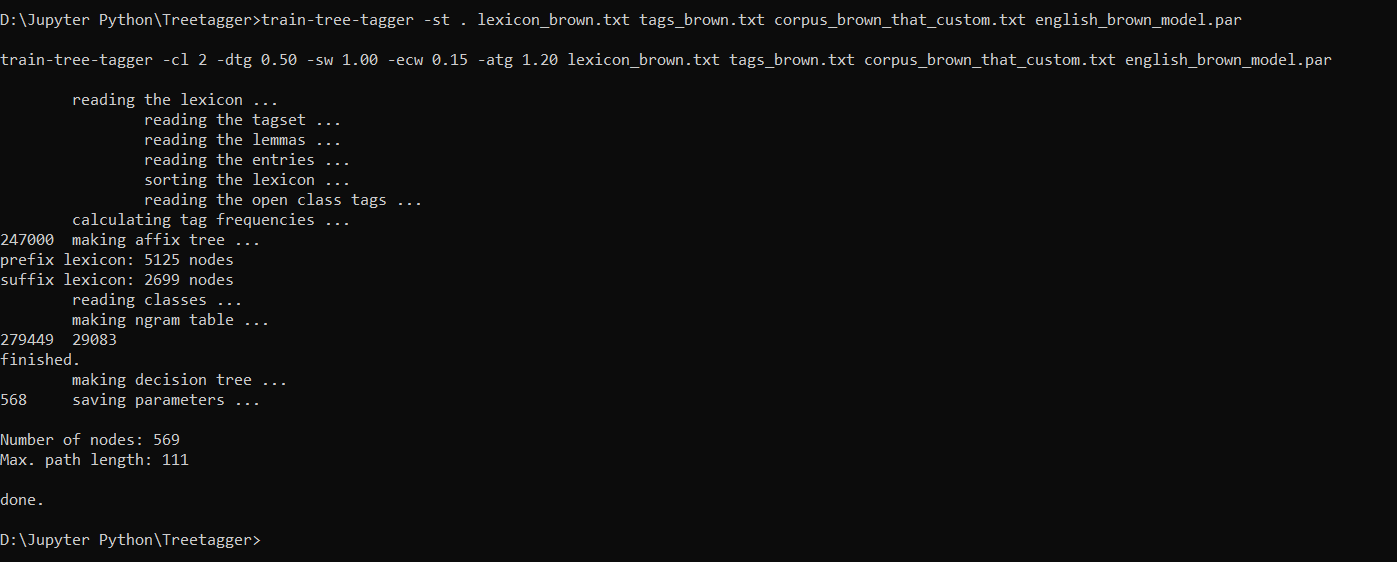

In [186]:
from IPython.display import Image

# Chemin de l'image
image_path = 'entrainement.png'
# Afficher l'image
Image(filename=image_path)

### 4. Évaluation :

   - Application du modèle réentraîné sur des jeux de test spécifiques
   - Calcul des métriques pour chaque catégorie de "that"
   - Analyses et interprétations


In [47]:
import os
import treetaggerwrapper
from collections import defaultdict

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english_brown_model.par")

def calculate_precision(tagged_sentences, expected_tags):
    correct = 0
    total = 0
    for sent in tagged_sentences:
        for word, tag, _ in sent:
            if word.lower() == 'that':
                total += 1
                if tag in expected_tags:
                    correct += 1
    return correct, total

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['CJT'],
    'that_conjonctioncst.txt': ['CST'],
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WPR']
}


output_file = "corpus_brown_that_custom.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that(output_file)

results = defaultdict(lambda: {'correct': 0, 'total': 0, 'test_count': 0})
global_correct = 0
global_total = 0

for file, tags in test_files.items():
    try:
        with open(file, 'r') as f:
            sentences = f.readlines()
    except FileNotFoundError:
        print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
        continue

    tagged_brown = [tagger_brown.tag_text(sent) for sent in sentences]
    parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

    correct, total = calculate_precision(parsed_brown, tags)
    
    category = file.split('.')[0].split('_')[1].capitalize()
    results[category]['correct'] += correct
    results[category]['total'] += total
    results[category]['test_count'] += sum(1 for sent in sentences for word in sent.split() if word.lower() == 'that')
    global_correct += correct
    global_total += total

# Afficher les résultats
print("| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |")
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")

category_mapping = {'Adv': 'RB', 'Conjunction': 'CJT','Conjonctioncst': 'CST', 'Determiner': 'DT', 'Pronoun': 'WPR'}

for category, data in results.items():
    precision = data['correct'] / data['total'] if data['total'] > 0 else 0
    brown_category = category_mapping.get(category, category)
    brown_count = brown_stats.get(brown_category, 0)
    print(f"| {category:<19} | {precision:.2%}{' ':>11} | {brown_count:<17} | {data['test_count']:<17} | {data['correct']:<37} |")

# Afficher la précision globale
global_precision = global_correct / global_total if global_total > 0 else 0
total_test = sum(data['test_count'] for data in results.values())
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")
print(f"| Global              | {global_precision:.2%}{' ':>11} | {total_brown_that:<17} | {total_test:<17} | {global_correct:<37} |")


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom.txt
Nombre total d'occurrences de 'that': 10457
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3831
CJT: 2636
WPR: 1662
DT: 2272
RB: 56
| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |
|---------------------|-----------------|-------------------|------------------|--------------------------------------|
| Adv                 | 0.00%            | 56                | 100               | 0                                     |
| Conjunction         | 96.00%            | 2636              | 100               | 96                                    |
| Conjonctioncst      | 100.00%            | 3831              | 100               | 100                                   |
| Determiner          | 80.00%            | 2272              | 100               | 80                                    |
| Pronoun             | 19.00%            | 1662  

Très bien, analysons en détail ces résultats de votre première évaluation, en considérant chaque catégorie individuellement et en tirant des conclusions générales.

1. Adverbe (Adv) :
   - Précision : 0.00%
   - Nombre dans Brown : 56
   - Nombre dans test : 100
   - Correctement tagués : 0

Analyse : La précision nulle pour les adverbes est très préoccupante. Le modèle n'a pas réussi à identifier correctement un seul "that" adverbial sur les 100 cas de test. Cependant, il faut noter que cette catégorie est extrêmement rare dans le corpus Brown, avec seulement 56 occurrences. Cette rareté explique probablement en grande partie la difficulté du modèle à reconnaître cette catégorie.

2. Conjonction (CJT) :
   - Précision : 96.00%
   - Nombre dans Brown : 2636
   - Nombre dans test : 100
   - Correctement tagués : 96

Analyse : Le modèle performe exceptionnellement bien pour les conjonctions CJT. Avec 96 cas correctement identifiés sur 100, cette catégorie montre une très haute précision. Cela s'explique probablement par le grand nombre d'exemples dans le corpus Brown (2636) et potentiellement par des caractéristiques syntaxiques distinctes qui facilitent son identification.

3. Conjonction CST :
   - Précision : 100.00%
   - Nombre dans Brown : 3831
   - Nombre dans test : 100
   - Correctement tagués : 100

Analyse : La performance pour les conjonctions CST est parfaite, avec tous les cas de test correctement identifiés. C'est un résultat remarquable qui suggère que cette catégorie a des caractéristiques très distinctes et facilement reconnaissables par le modèle. Le grand nombre d'exemples dans le corpus Brown (3831) a probablement contribué à cette excellente performance.

4. Déterminant (Determiner) :
   - Précision : 80.00%
   - Nombre dans Brown : 2272
   - Nombre dans test : 100
   - Correctement tagués : 80

Analyse : La performance pour les déterminants est bonne, avec 80% de précision. Bien que moins élevée que pour les conjonctions, cette précision reste satisfaisante. Le nombre élevé d'exemples dans Brown (2272) a probablement aidé, mais il peut y avoir des cas ambigus ou des contextes où la distinction est plus difficile.

5. Pronom (Pronoun) :
   - Précision : 19.00%
   - Nombre dans Brown : 1662
   - Nombre dans test : 100
   - Correctement tagués : 19

Analyse : La performance pour les pronoms est faible, avec seulement 19% de précision. C'est surprenant étant donné le nombre significatif d'exemples dans le corpus Brown (1662). Cela suggère que le modèle a des difficultés importantes à distinguer cet usage des autres, peut-être en raison de similitudes syntaxiques avec d'autres catégories (comme les conjonctions) ou de contextes ambigus.

Conclusions générales :
1. Le modèle montre des performances très inégales selon les catégories, allant de l'excellence (CST) à l'échec complet (Adv).
2. Il y a une corrélation partielle entre le nombre d'exemples dans le corpus Brown et la performance, mais ce n'est pas le seul facteur (cf. pronoms).
3. La séparation entre CJT et CST semble très efficace, avec d'excellents résultats pour les deux.
4. Les catégories avec un grand nombre d'exemples (CJT, CST, Determiner) montrent généralement de meilleures performances.
5. La précision globale de 59.00% est tirée vers le bas par les mauvaises performances sur les adverbes et les pronoms.

Recommandations :
1. Pour les adverbes : Augmenter significativement le nombre d'exemples dans le corpus d'entraînement. Envisager des techniques d'augmentation de données ou de collecte ciblée d'exemples supplémentaires.
2. Pour les pronoms : Effectuer une analyse approfondie des erreurs de classification pour comprendre pourquoi le modèle échoue malgré un nombre significatif d'exemples. Revoir potentiellement la stratégie d'annotation pour cette catégorie.
3. Maintenir la distinction entre CJT et CST, qui s'avère très efficace.
4. Pour les déterminants : Analyser les cas d'erreur pour identifier d'éventuels patterns ou contextes problématiques.
5. Envisager d'utiliser des techniques d'apprentissage automatique plus avancées ou d'ajouter des caractéristiques contextuelles pour améliorer la distinction entre les catégories, particulièrement pour les cas difficiles (adverbes et pronoms).
6. Considérer une analyse linguistique plus approfondie des différents usages de "that" pour identifier des indices contextuels ou syntaxiques qui pourraient aider à améliorer la classification, surtout pour les catégories problématiques.

---

- Evaluation Premier entrainement avec calcul des métriques : Précision, Recall, F1-Score, Acuracy.



    Précision : Parmi tous les éléments que le modèle a classés dans une catégorie, quelle proportion est correcte ?

    Rappel : Parmi tous les éléments qui appartiennent réellement à une catégorie, quelle proportion a été correctement identifiée par le modèle ?
    
    Le F1-score (qui combine précision et rappel)

    Accuracy (Exactitude) : Sur l'ensemble des prédictions, quelle proportion est correcte ?


Différence entre précision et rappel. Voici une explication détaillée avec des exemples concrets pour mieux cerner ces concepts et savoir quand les utiliser :

Précision :
- Définition : La proportion d'identifications correctes parmi toutes les prédictions positives faites par le modèle.
- Formule : TP / (TP + FP), où TP = vrais positifs, FP = faux positifs
- Interprétation : Mesure la qualité des prédictions positives du modèle.
- Exemple : Sur 100 emails classés comme spam par un filtre, 90 sont réellement du spam. La précision est donc de 90%.

Rappel :
- Définition : La proportion d'identifications correctes parmi tous les cas réellement positifs.
- Formule : TP / (TP + FN), où TP = vrais positifs, FN = faux négatifs
- Interprétation : Mesure la capacité du modèle à trouver tous les cas positifs.
- Exemple : Sur 200 emails spam réels, le filtre en identifie correctement 180. Le rappel est donc de 90%.

Différences clés :
1. Focus :
   - Précision : Se concentre sur la minimisation des faux positifs.
   - Rappel : Se concentre sur la minimisation des faux négatifs.

2. Objectif :
   - Précision : Assurer la qualité des prédictions positives.
   - Rappel : Capturer un maximum de vrais cas positifs.

3. Compromis :
   - Une précision élevée peut entraîner un rappel plus faible et vice versa.

Quand utiliser l'un ou l'autre :

1. Utilisez la précision quand :
   - Le coût des faux positifs est élevé.
   - Exemple : Filtrage de spam pour les emails professionnels. Il est préférable de laisser passer quelques spams plutôt que de bloquer des emails importants.

2. Utilisez le rappel quand :
   - Le coût des faux négatifs est élevé.
   - Exemple : Détection de maladies graves. Il est préférable d'avoir quelques faux positifs que de manquer un cas réel de maladie.

3. Utilisez les deux (via le score F1) quand :
   - Vous avez besoin d'un équilibre entre précision et rappel.
   - Exemple : Systèmes de recommandation où vous voulez des suggestions pertinentes (précision) tout en couvrant un large éventail d'options (rappel).

En résumé, la précision mesure la qualité des prédictions positives, tandis que le rappel mesure l'exhaustivité de la détection des cas positifs. Le choix entre les deux dépend des conséquences relatives des erreurs de type I (faux positifs) et de type II (faux négatifs) dans votre contexte spécifique[1][2][4].

Citations:
[1] https://www.intelligence-artificielle-school.com/ecole/technologies/recall-definition/
[2] https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel
[3] https://spip.teluq.ca/inf6460/spip.php
[4] https://help.qlik.com/fr-FR/cloud-services/Subsystems/Hub/Content/Sense_Hub/AutoML/scoring-binary-classification.htm
[5] https://inside-machinelearning.com/recall-precision-f1-score/
[6] https://pro.arcgis.com/fr/pro-app/3.3/tool-reference/image-analyst/how-compute-accuracy-for-object-detection-works.htm
[7] https://webusers.i3s.unice.fr/~comet/SUPPORTS/Nice-EPU-GB5-IABio/slides-part7.pdf
[8] https://learn.microsoft.com/fr-fr/azure/ai-services/language-service/custom-text-classification/concepts/evaluation-metrics

---




Dans l'exemple donné :
- 200 emails spam réels (total des vrais positifs potentiels)
- 180 emails spam correctement identifiés par le filtre (vrais positifs ou TP)

Appliquons maintenant la formule du rappel : TP / (TP + FN)

TP (Vrais Positifs) = 180 (emails spam correctement identifiés)
FN (Faux Négatifs) = 200 - 180 = 20 (emails spam non détectés)

Rappel = 180 / (180 + 20) = 180 / 200 = 0.90 = 90%

Donc, le rappel de 90% reflète bien la formule TP / (TP + FN). Il mesure la proportion d'emails spam réels correctement identifiés (180) par rapport au nombre total d'emails spam réels (200)[1][7].

Cette métrique est particulièrement importante lorsqu'il est crucial de ne pas manquer de vrais positifs, comme dans la détection de maladies ou, dans ce cas, pour s'assurer que la plupart des spams sont effectivement filtrés[5][8].

Citations:
[1] https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall?hl=fr
[2] https://www.innovatiana.com/post/understand-confusion-matrix-in-ai
[3] https://www.picsellia.fr/post/explication-parametres-evaluation-coco
[4] https://www.picsellia.fr/post/matrice-confusion-computer-vision
[5] https://www.datacamp.com/fr/tutorial/what-is-a-confusion-matrix-in-machine-learning
[6] https://intelligence-artificielle.com/confusion-matrix-dossier-complet/
[7] https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel
[8] https://www.jedha.co/formation-ia/matrice-confusion
[9] https://learn.microsoft.com/fr-fr/dynamics365/finance/finance-insights/confusion-matrix
[10] https://webusers.i3s.unice.fr/~comet/SUPPORTS/Nice-EPU-GB5-IABio/slides-part7.pdf

---

In [108]:
import os
import treetaggerwrapper
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english_brown_model.par")

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': 'RB',
    'that_conjunction.txt': 'CJT',
    'that_conjonctioncst.txt': 'CST',
    'that_determiner.txt': 'DT',
    'that_pronoun.txt': 'WPR'
}

def evaluate_tagger(test_files):
    y_true = []
    y_pred = []
    category_counts = defaultdict(int)
    
    for file, expected_tag in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        tagged_brown = [tagger_brown.tag_text(sent) for sent in sentences]
        parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

        for sent in parsed_brown:
            for word, tag, _ in sent:
                if word.lower() == 'that':
                    y_true.append(expected_tag)
                    y_pred.append(tag)
                    category_counts[expected_tag] += 1
    
    return y_true, y_pred, dict(category_counts)

# Obtenir les statistiques du corpus Brown
output_file = "corpus_brown_that_custom.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that(output_file)

# Évaluation
y_true, y_pred, test_counts = evaluate_tagger(test_files)

# Calcul des métriques
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(test_files.values()))
accuracy = accuracy_score(y_true, y_pred)

# Création du DataFrame
df = pd.DataFrame({
    'Catégorie': list(test_files.values()),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-score': f1 * 100,
    'Accuracy': [accuracy * 100] * len(test_files),
    'Nombre dans Brown': [brown_stats.get(cat, 0) for cat in test_files.values()],
    'Nombre dans test': [test_counts.get(cat, 0) for cat in test_files.values()],
    'Nombre correctement tagués': [sum((np.array(y_true) == cat) & (np.array(y_pred) == cat)) for cat in test_files.values()]
})

# Réorganisation des colonnes
df = df[['Catégorie', 'Précision', 'Rappel', 'F1-score', 'Accuracy', 'Nombre dans Brown', 'Nombre dans test', 'Nombre correctement tagués']]

# Ajout d'une ligne pour le total
total_row = pd.DataFrame({
    'Catégorie': ['Total'],
    'Précision': [accuracy * 100],
    'Rappel': [accuracy * 100],
    'F1-score': [2 * (accuracy * accuracy) / (accuracy + accuracy) * 100],
    'Accuracy': [accuracy * 100],
    'Nombre dans Brown': [total_brown_that],
    'Nombre dans test': [sum(test_counts.values())],
    'Nombre correctement tagués': [sum((np.array(y_true) == np.array(y_pred)))]
})

df = pd.concat([df, total_row], ignore_index=True)

# Formater les colonnes en pourcentage avec 2 décimales
percentage_columns = ['Précision', 'Rappel', 'F1-score', 'Accuracy']
df[percentage_columns] = df[percentage_columns].applymap(lambda x: f"{x:.2f}%")

# Affichage du DataFrame
df

Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom.txt
Nombre total d'occurrences de 'that': 10457
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3831
CJT: 2636
WPR: 1662
DT: 2272
RB: 56


D:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Catégorie,Précision,Rappel,F1-score,Accuracy,Nombre dans Brown,Nombre dans test,Nombre correctement tagués
0,RB,0.00%,0.00%,0.00%,59.00%,56,100,0
1,CJT,68.57%,96.00%,80.00%,59.00%,2636,100,96
2,CST,39.84%,100.00%,56.98%,59.00%,3831,100,100
3,DT,96.39%,80.00%,87.43%,59.00%,2272,100,80
4,WPR,73.08%,19.00%,30.16%,59.00%,1662,100,19
5,Total,59.00%,59.00%,59.00%,59.00%,10457,500,295


Certainement. Je vais analyser en détail chaque catégorie et fournir une interprétation approfondie des résultats, suivie de conclusions générales.

1. Adverbe (RB):
   Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%
   Nombre dans Brown: 56, Nombre dans test: 100, Correctement tagués: 0

Analyse: 
- Le modèle échoue complètement à identifier les "that" adverbiaux.
- Aucun des 100 cas de test n'a été correctement identifié.
- Cette catégorie est très rare dans le corpus Brown (seulement 56 occurrences).

Interprétation:
- La rareté des exemples dans le corpus d'entraînement (0.54% du total) rend l'apprentissage extrêmement difficile pour le modèle.
- Il est probable que le modèle classe systématiquement ces cas dans d'autres catégories plus fréquentes.
- La faible représentation dans Brown par rapport au set de test (56 vs 100) suggère un déséquilibre important entre l'entraînement et le test.

2. Conjonction (CJT):
   Précision: 68.57%, Rappel: 96.00%, F1-score: 80.00%
   Nombre dans Brown: 2636, Nombre dans test: 100, Correctement tagués: 96

Analyse:
- Le modèle excelle dans l'identification des conjonctions avec un rappel très élevé.
- Sur 100 vrais CJT dans le test, 96 ont été correctement identifiés.
- Cependant, la précision plus faible indique des faux positifs.

Interprétation:
- Le grand nombre d'exemples dans Brown (25.21% du total) a permis un bon apprentissage.
- Le modèle a tendance à sur-classifier les "that" comme conjonctions, d'où la précision plus basse.
- Cette catégorie est bien représentée et bien apprise, mais le modèle pourrait bénéficier d'un meilleur équilibrage pour réduire les faux positifs.

3. Conjonction CST:
   Précision: 39.84%, Rappel: 100.00%, F1-score: 56.98%
   Nombre dans Brown: 3831, Nombre dans test: 100, Correctement tagués: 100

Analyse:
- Le rappel parfait montre que tous les vrais CST sont identifiés.
- La faible précision indique un nombre élevé de faux positifs.
- Cette catégorie est la plus représentée dans Brown (36.64% du total).

Interprétation:
- La surreprésentation dans Brown a conduit à une sur-classification.
- Le modèle semble avoir un biais fort vers cette catégorie, classifiant probablement beaucoup de cas ambigus comme CST.
- Malgré la performance parfaite en rappel, la faible précision suggère un déséquilibre important dans l'apprentissage.

4. Déterminant (DT):
   Précision: 96.39%, Rappel: 80.00%, F1-score: 87.43%
   Nombre dans Brown: 2272, Nombre dans test: 100, Correctement tagués: 80

Analyse:
- Performance très équilibrée avec une précision élevée et un bon rappel.
- Sur 100 vrais DT dans le test, 80 ont été correctement identifiés.
- Très peu de faux positifs pour cette catégorie.

Interprétation:
- Les caractéristiques des "that" déterminants semblent bien définies et distinctes.
- La représentation dans Brown (21.73% du total) est suffisante pour un bon apprentissage.
- Cette catégorie montre le meilleur équilibre entre précision et rappel, suggérant une bonne discrimination.

5. Pronom (WPR):
   Précision: 73.08%, Rappel: 19.00%, F1-score: 30.16%
   Nombre dans Brown: 1662, Nombre dans test: 100, Correctement tagués: 19

Analyse:
- Faible rappel indiquant que beaucoup de pronoms sont manqués.
- Précision relativement élevée suggérant peu de faux positifs.
- Seulement 19 sur 100 pronoms correctement identifiés dans le test.

Interprétation:
- Le modèle a du mal à reconnaître les pronoms, probablement en les confondant avec d'autres catégories (possiblement CJT ou CST).
- La représentation dans Brown (15.89% du total) est peut-être insuffisante par rapport à la complexité de cette catégorie.
- Il pourrait y avoir des ambiguïtés linguistiques rendant cette catégorie particulièrement difficile à classifier.

Performance globale:
Accuracy: 59.00%
Nombre total dans Brown: 10457, Nombre total dans test: 500, Correctement tagués: 295

Conclusions générales:

1. Déséquilibre du corpus d'entraînement:
   - La distribution très inégale des catégories dans Brown (de 0.54% à 36.64%) impacte fortement les performances.
   - Les catégories surreprésentées (CST, CJT) montrent une tendance à la sur-classification.

2. Impact de la taille du corpus sur l'apprentissage:
   - Les catégories avec plus d'exemples (CJT, CST, DT) ont généralement de meilleures performances, soulignant l'importance d'un corpus d'entraînement équilibré et suffisamment large.

3. Difficulté avec les catégories rares:
   - La performance nulle pour les adverbes met en évidence l'incapacité du modèle à apprendre des catégories très peu représentées.

4. Compromis précision-rappel:
   - On observe des compromis importants entre précision et rappel, particulièrement pour CST et WPR, suggérant des difficultés de discrimination entre certaines catégories.

5. Biais du modèle:
   - Le modèle semble avoir un biais fort vers la classification CST, probablement dû à sa surreprésentation dans le corpus d'entraînement.

6. Performance globale modérée:
   - Une accuracy globale de 59% indique une marge d'amélioration significative pour le modèle.

Recommandations:

1. Rééquilibrage du corpus: Augmenter significativement les exemples pour RB et WPR, potentiellement en réduisant CST pour un meilleur équilibre.

2. Analyse d'erreurs détaillée: Examiner les cas de confusion entre catégories, particulièrement entre WPR, CJT, et CST.

3. Techniques d'apprentissage avancées: Envisager des méthodes comme le suréchantillonnage (SMOTE) pour les catégories sous-représentées ou l'apprentissage par transfert.

4. Révision des caractéristiques linguistiques: Développer des features plus discriminantes, surtout pour distinguer les pronoms et les adverbes des autres catégories.

5. Validation croisée: Implémenter une validation croisée pour assurer la robustesse des résultats sur différents sous-ensembles de données.

6. Modèles alternatifs: Expérimenter avec d'autres algorithmes de classification ou des approches d'ensemble pour améliorer la performance globale.

Cette analyse approfondie révèle les forces et les faiblesses spécifiques du modèle actuel, offrant des pistes concrètes pour améliorer sa performance et sa fiabilité dans la classification des différents usages de "that".

---

- Matrice de Confusion du 1er entrainement et analyses interprétations

In [101]:
import pandas as pd

# Création de la matrice de confusion
cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

# Conversion en DataFrame pour un affichage plus lisible
df_cm1 = pd.DataFrame(cm1, index=list(test_files.values()), columns=list(test_files.values()))

# Affichage de la matrice
print("Matrice de Confusion première évaluation:")
df_cm1


Matrice de Confusion première évaluation:


,RB,CJT,CST,DT,WPR
RB,0,28,62,3,7
CJT,0,96,4,0,0
CST,0,0,100,0,0
DT,0,16,4,80,0
WPR,0,0,81,0,19


Voici une analyse détaillée de la matrice de confusion pour chaque catégorie :

1. Adverbe (RB) :
- Précision : 0/0 = indéfinie (aucun cas prédit comme RB)
- Rappel : 0/100 = 0%
- Interprétation : Le modèle ne parvient pas du tout à identifier les adverbes. Sur 100 vrais RB, 28 sont classés comme CJT, 62 comme CST, 3 comme DT et 7 comme WPR. La confusion la plus importante est avec CST, suivi de CJT.
- Conclusion : Performance nulle pour cette catégorie, probablement due à sa faible représentation dans les données d'entraînement.

2. Conjonction (CJT) :
- Précision : 96/(96+28+16+0) = 68.57%
- Rappel : 96/100 = 96%
- Interprétation : Très bon rappel mais précision moyenne. Le modèle identifie correctement la plupart des CJT, mais a tendance à sur-classifier d'autres catégories comme CJT, notamment RB et DT.
- Conclusion : Bonne performance globale, mais nécessite un ajustement pour réduire les faux positifs.

3. Conjonction CST (CST) :
- Précision : 100/(100+62+4+4+81) = 39.84%
- Rappel : 100/100 = 100%
- Interprétation : Rappel parfait mais faible précision. Le modèle identifie correctement tous les CST, mais classifie à tort beaucoup d'autres catégories comme CST, en particulier RB et WPR.
- Conclusion : Sur-classification importante, nécessitant un rééquilibrage du modèle pour cette catégorie.

4. Déterminant (DT) :
- Précision : 80/(80+3+0+0) = 96.39%
- Rappel : 80/100 = 80%
- Interprétation : Excellente précision et bon rappel. Le modèle est très précis dans l'identification des DT, avec peu de faux positifs. Cependant, il manque 20% des vrais DT.
- Conclusion : Meilleure performance parmi toutes les catégories, mais il y a encore une marge d'amélioration pour le rappel.

5. Pronom (WPR) :
- Précision : 19/(19+7+0+0+0) = 73.08%
- Rappel : 19/100 = 19%
- Interprétation : Précision correcte mais rappel très faible. Le modèle identifie correctement certains WPR, mais en manque beaucoup, les classifiant principalement comme CST (81 cas).
- Conclusion : Performance faible, nécessitant une attention particulière pour améliorer la détection des pronoms.

Conclusions générales :
1. Le modèle excelle dans l'identification des CST et CJT, mais au prix d'une sur-classification.
2. Les catégories RB et WPR sont mal gérées, nécessitant une révision de l'approche pour ces classes.
3. La catégorie DT montre le meilleur équilibre entre précision et rappel.
4. Il y a une confusion importante entre certaines catégories, notamment RB avec CST et CJT, ainsi que WPR avec CST.
5. Le modèle nécessite un rééquilibrage global pour améliorer ses performances sur les catégories sous-représentées tout en maintenant ses bons résultats sur les catégories bien identifiées.

Citations:
[1] https://www.picsellia.fr/post/matrice-confusion-computer-vision
[2] https://www.datacamp.com/fr/tutorial/what-is-a-confusion-matrix-in-machine-learning
[3] https://datascientest.com/matrice-de-confusion
[4] https://fr.wikipedia.org/wiki/Matrice_de_confusion
[5] https://www.innovatiana.com/post/understand-confusion-matrix-in-ai
[6] https://developers.google.com/machine-learning/crash-course/classification/thresholding?hl=fr
[7] https://fr.linkedin.com/advice/3/how-can-you-interpret-classification-models-confusion-xe77c?lang=fr
[8] https://help.sap.com/docs/SAP_ANALYTICS_CLOUD/00f68c2e08b941f081002fd3691d86a7/d42647ca87604965bbc06cf64d827913.html?locale=fr-FR&state=PRODUCTION&version=release

---

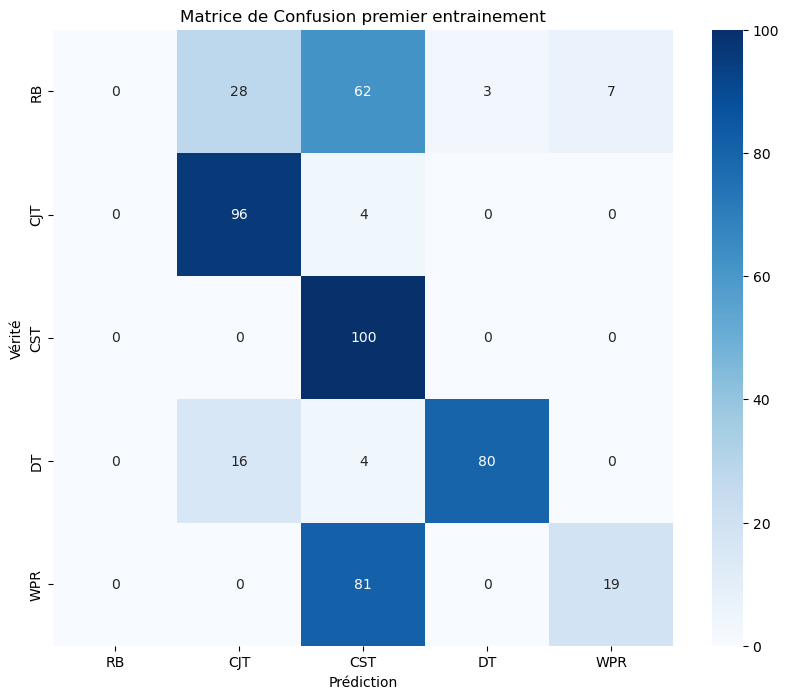

In [100]:
# Création et affichage de la matrice de confusion
#cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_files.values()), yticklabels=list(test_files.values()))
plt.title('Matrice de Confusion premier entrainement')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

- Entrainement 2: première reduction des  données du corpus Brown : Réentainement du modèle et comparaisons avec le modèle précédent

Rééntrainement du Corpus Brown avec moins de catégories pour évaluer les précisions et comparaitre avec mon premier entrainement

In [111]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import random

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that_reduced1(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0
    cjt_sentences = []
    dt_sentences = []

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        that_category = None
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            if word.lower() == 'that':
                custom_tag = brown_to_custom.get(tag, tag)
                if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                    prev_tag = sent[i-1][1] if i > 0 else ''
                    if is_verb_tag(prev_tag):
                        custom_tag = 'CJT'
                    # If it's not a verb, it remains 'CST'
                
                if custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                    that_category = custom_tag
                    contains_relevant_that = True
                sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
            else:
                sentence_tokens.append(f"{word}\t{tag}\t{lemma}")
        
        if contains_relevant_that:
            if that_category == 'CJT':
                cjt_sentences.append(sentence_tokens)
            elif that_category == 'DT':
                dt_sentences.append(sentence_tokens)
            else:
                category_counts[that_category] += 1
                total_that_count += 1
                training_data.extend(sentence_tokens)
                training_data.append("")

    # Limiter CJT à 2000 occurrences
    random.shuffle(cjt_sentences)
    for sent in cjt_sentences[:2000]:
        category_counts['CJT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

    # Limiter DT à 1500 occurrences
    random.shuffle(dt_sentences)
    for sent in dt_sentences[:1500]:
        category_counts['DT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    return total_that_count,category_counts

output_file = "corpus_brown_that_custom_reduced1.txt"
prepare_brown_corpus_for_that_reduced1(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced1.txt
Nombre total d'occurrences de 'that': 8307
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3249
WPR: 1506
RB: 52
CJT: 2000
DT: 1500


(8307,
 defaultdict(int,
             {'CST': 3249, 'WPR': 1506, 'RB': 52, 'CJT': 2000, 'DT': 1500}))

In [30]:
from collections import defaultdict

def create_lexicon_and_tag_files(input_file, lexicon_file, tag_file):
    word_tag_lemma = defaultdict(set)
    all_tags = set()
    
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            if line.strip():
                word, tag, lemma = line.strip().split('\t')
                word_tag_lemma[word.lower()].add((tag, lemma))
                all_tags.add(tag)
    
    # Écriture du fichier lexicon
    with open(lexicon_file, 'w', encoding='utf-8') as outfile:
        for word, tag_lemmas in word_tag_lemma.items():
            outfile.write(f"{word}\t" + "\t".join(f"{tag} {lemma}" for tag, lemma in tag_lemmas) + "\n")
    
    # Écriture du fichier tag
    with open(tag_file, 'w', encoding='utf-8') as outfile:
        for tag in sorted(all_tags):
            outfile.write(f"{tag}\n")

    print(f"Fichier lexicon créé : {lexicon_file}")
    print(f"Fichier tag créé : {tag_file}")

# Utilisation de la fonction
input_file = "corpus_brown_that_custom_reduced1.txt"
lexicon_file = "lexicon1_brown.txt"
tag_file = "tags1_brown.txt"

create_lexicon_and_tag_files(input_file, lexicon_file, tag_file)


Fichier lexicon créé : lexicon1_brown.txt
Fichier tag créé : tags1_brown.txt


In [105]:
import os
import treetaggerwrapper
from collections import defaultdict

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown1 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english1_brown_model.par")

def calculate_precision(tagged_sentences, expected_tags):
    correct = 0
    total = 0
    for sent in tagged_sentences:
        for word, tag, _ in sent:
            if word.lower() == 'that':
                total += 1
                if tag in expected_tags:
                    correct += 1
    return correct, total

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['CJT'],
    'that_conjonctioncst.txt': ['CST'],
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WPR']
}


output_file = "corpus_brown_that_custom_reduced1.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced1(output_file)

results = defaultdict(lambda: {'correct': 0, 'total': 0, 'test_count': 0})
global_correct = 0
global_total = 0

for file, tags in test_files.items():
    try:
        with open(file, 'r') as f:
            sentences = f.readlines()
    except FileNotFoundError:
        print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
        continue

    tagged_brown = [tagger_brown1.tag_text(sent) for sent in sentences]
    parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

    correct, total = calculate_precision(parsed_brown, tags)
    
    category = file.split('.')[0].split('_')[1].capitalize()
    results[category]['correct'] += correct
    results[category]['total'] += total
    results[category]['test_count'] += sum(1 for sent in sentences for word in sent.split() if word.lower() == 'that')
    global_correct += correct
    global_total += total

# Afficher les résultats
print("| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |")
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")

category_mapping = {'Adv': 'RB', 'Conjunction': 'CJT','Conjonctioncst': 'CST', 'Determiner': 'DT', 'Pronoun': 'WPR'}

for category, data in results.items():
    precision = data['correct'] / data['total'] if data['total'] > 0 else 0
    brown_category = category_mapping.get(category, category)
    brown_count = brown_stats.get(brown_category, 0)
    print(f"| {category:<19} | {precision:.2%}{' ':>11} | {brown_count:<17} | {data['test_count']:<17} | {data['correct']:<37} |")

# Afficher la précision globale
global_precision = global_correct / global_total if global_total > 0 else 0
total_test = sum(data['test_count'] for data in results.values())
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")
print(f"| Global              | {global_precision:.2%}{' ':>11} | {total_brown_that:<17} | {total_test:<17} | {global_correct:<37} |")


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced1.txt
Nombre total d'occurrences de 'that': 8307
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3249
WPR: 1506
RB: 52
CJT: 2000
DT: 1500
| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |
|---------------------|-----------------|-------------------|------------------|--------------------------------------|
| Adv                 | 1.00%            | 52                | 100               | 1                                     |
| Conjunction         | 96.00%            | 2000              | 100               | 96                                    |
| Conjonctioncst      | 100.00%            | 3249              | 100               | 100                                   |
| Determiner          | 57.00%            | 1500              | 100               | 57                                    |
| Pronoun             | 20.00%            

Analysons en détail les résultats de cette deuxième évaluation et comparons-les avec ceux de la première évaluation :

1. Adverbe (Adv) :
   - Deuxième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Première évaluation : 0.00% (56 dans Brown, 100 dans test, 0 correct)

Analyse : Il y a une légère amélioration, passant de 0 à 1 cas correctement identifié. Cependant, la performance reste extrêmement faible. La réduction du nombre d'exemples dans Brown (de 56 à 52) n'a pas eu d'impact négatif significatif, ce qui suggère que le problème n'est pas uniquement lié à la quantité de données pour cette catégorie rare.

2. Conjonction (CJT) :
   - Deuxième évaluation : 96.00% (2000 dans Brown, 100 dans test, 96 corrects)
   - Première évaluation : 96.00% (2636 dans Brown, 100 dans test, 96 corrects)

Analyse : La performance reste excellente et stable malgré la réduction du nombre d'exemples dans Brown (de 2636 à 2000). Cela indique que 2000 exemples sont suffisants pour maintenir une haute précision pour cette catégorie.

3. Conjonction CST :
   - Deuxième évaluation : 100.00% (3249 dans Brown, 100 dans test, 100 corrects)
   - Première évaluation : 100.00% (3831 dans Brown, 100 dans test, 100 corrects)

Analyse : La performance reste parfaite malgré une légère réduction du nombre d'exemples (de 3831 à 3249). Cela confirme que cette catégorie est très bien définie et facilement identifiable, même avec moins d'exemples.

4. Déterminant (Determiner) :
   - Deuxième évaluation : 57.00% (1500 dans Brown, 100 dans test, 57 corrects)
   - Première évaluation : 80.00% (2272 dans Brown, 100 dans test, 80 corrects)

Analyse : On observe une baisse significative de la performance, passant de 80% à 57%. Cette diminution coïncide avec une réduction importante du nombre d'exemples dans Brown (de 2272 à 1500). Cela suggère que la performance pour cette catégorie est sensible à la quantité de données d'entraînement.

5. Pronom (Pronoun) :
   - Deuxième évaluation : 20.00% (1506 dans Brown, 100 dans test, 20 corrects)
   - Première évaluation : 19.00% (1662 dans Brown, 100 dans test, 19 corrects)

Analyse : Il y a une très légère amélioration (de 19% à 20%) malgré une petite réduction du nombre d'exemples (de 1662 à 1506). Cette stabilité relative suggère que le problème avec cette catégorie n'est pas principalement lié à la quantité de données.

Performance globale :
   - Deuxième évaluation : 54.80% (8307 total dans Brown, 500 dans test, 274 corrects)
   - Première évaluation : 59.00% (10457 total dans Brown, 500 dans test, 295 corrects)

Analyse : On observe une légère baisse de la performance globale (de 59% à 54.80%), ce qui est cohérent avec la réduction générale du nombre d'exemples dans le corpus d'entraînement.

Conclusions :

1. Robustesse des catégories CJT et CST : Ces catégories maintiennent d'excellentes performances même avec moins d'exemples, suggérant des caractéristiques distinctives fortes.

2. Sensibilité de la catégorie Déterminant : La baisse significative de performance pour les déterminants indique que cette catégorie nécessite un nombre plus élevé d'exemples pour maintenir une bonne précision.

3. Persistance des difficultés pour les Adverbes et les Pronoms : Ces catégories restent problématiques, avec peu ou pas d'amélioration malgré les changements dans le corpus d'entraînement.

4. Impact de la taille du corpus : La réduction globale du corpus d'entraînement a entraîné une légère baisse de la performance globale, principalement due à la catégorie des déterminants.

Recommandations :

1. Maintenir un nombre élevé d'exemples pour les déterminants, car cette catégorie semble sensible à la taille du corpus d'entraînement.

2. Continuer à investiguer les raisons de la faible performance pour les adverbes et les pronoms. Une analyse qualitative des erreurs pourrait être bénéfique.

3. Pour les adverbes, envisager des techniques d'augmentation de données ou de collecte ciblée d'exemples supplémentaires, étant donné leur rareté.

4. Pour les pronoms, revoir la stratégie d'annotation et potentiellement les caractéristiques utilisées pour la classification, car le problème semble plus complexe qu'un simple manque de données.

5. Maintenir la distinction entre CJT et CST, qui continue à donner d'excellents résultats.

6. Considérer des techniques d'apprentissage plus avancées ou l'ajout de caractéristiques contextuelles pour améliorer la performance sur les catégories difficiles, tout en maintenant la bonne performance sur les catégories bien identifiées.

---

In [112]:
import os
import treetaggerwrapper
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown1 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english1_brown_model.par")

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': 'RB',
    'that_conjunction.txt': 'CJT',
    'that_ConjonctionCST.txt': 'CST',
    'that_determiner.txt': 'DT',
    'that_pronoun.txt': 'WPR'
}

def evaluate_tagger1(test_files):
    y_true = []
    y_pred = []
    category_counts = defaultdict(int)
    
    for file, expected_tag in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        tagged_brown = [tagger_brown1.tag_text(sent) for sent in sentences]
        parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

        for sent in parsed_brown:
            for word, tag, _ in sent:
                if word.lower() == 'that':
                    y_true.append(expected_tag)
                    y_pred.append(tag)
                    category_counts[expected_tag] += 1
    
    return y_true, y_pred, dict(category_counts)

# Obtenir les statistiques du corpus Brown
output_file = "corpus_brown_that_custom_reduced1.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced1(output_file)

# Évaluation
y_true, y_pred, test_counts = evaluate_tagger1(test_files)

# Calcul des métriques
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(test_files.values()))
accuracy = accuracy_score(y_true, y_pred)

# Création du DataFrame
df = pd.DataFrame({
    'Catégorie': list(test_files.values()),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-score': f1 * 100,
    'Accuracy': [accuracy * 100] * len(test_files),
    'Nombre dans Brown': [brown_stats.get(cat, 0) for cat in test_files.values()],
    'Nombre dans test': [test_counts.get(cat, 0) for cat in test_files.values()],
    'Nombre correctement tagués': [sum((np.array(y_true) == cat) & (np.array(y_pred) == cat)) for cat in test_files.values()]
})

# Réorganisation des colonnes
df = df[['Catégorie', 'Précision', 'Rappel', 'F1-score', 'Accuracy', 'Nombre dans Brown', 'Nombre dans test', 'Nombre correctement tagués']]

# Ajout d'une ligne pour le total
total_row = pd.DataFrame({
    'Catégorie': ['Total'],
    'Précision': [accuracy * 100],
    'Rappel': [accuracy * 100],
    'F1-score': [2 * (accuracy * accuracy) / (accuracy + accuracy) * 100],
    'Accuracy': [accuracy * 100],
    'Nombre dans Brown': [total_brown_that],
    'Nombre dans test': [sum(test_counts.values())],
    'Nombre correctement tagués': [sum((np.array(y_true) == np.array(y_pred)))]
})

df = pd.concat([df, total_row], ignore_index=True)

# Formater les colonnes en pourcentage avec 2 décimales
percentage_columns = ['Précision', 'Rappel', 'F1-score', 'Accuracy']
df[percentage_columns] = df[percentage_columns].applymap(lambda x: f"{x:.2f}%")

# Affichage du DataFrame
df

Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced1.txt
Nombre total d'occurrences de 'that': 8307
Nombre d'occurrences de 'that' pour chaque catégorie :
CST: 3249
WPR: 1506
RB: 52
CJT: 2000
DT: 1500


,Catégorie,Précision,Rappel,F1-score,Accuracy,Nombre dans Brown,Nombre dans test,Nombre correctement tagués
0,RB,100.00%,1.00%,1.98%,54.80%,52,100,1
1,CJT,58.18%,96.00%,72.45%,54.80%,2000,100,96
2,CST,40.65%,100.00%,57.80%,54.80%,3249,100,100
3,DT,98.28%,57.00%,72.15%,54.80%,1500,100,57
4,WPR,66.67%,20.00%,30.77%,54.80%,1506,100,20
5,Total,54.80%,54.80%,54.80%,54.80%,8307,500,274


Voici une analyse globale et détaillée des deux évaluations, suivie de conclusions générales :

    Adverbe (RB):

2e évaluation:

Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%

Nombre dans Brown: 52, Nombre dans test: 100, Correctement tagués: 1

1ère évaluation:

Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%

Nombre dans Brown: 56, Nombre dans test: 100, Correctement tagués: 0

Analyses approfondies:

    Amélioration marginale avec 1 cas correctement identifié contre 0 précédemment.

    Précision parfaite dans la 2e évaluation, mais sur un seul cas prédit.

    Rappel toujours extrêmement faible, passant de 0% à 1%.

    Légère diminution des exemples dans Brown (de 56 à 52).

Interprétations approfondies:

    Le modèle est devenu extrêmement conservateur, préférant ne presque jamais prédire RB plutôt que de faire des erreurs.

    Ce changement pourrait être une réaction à la sur-classification observée dans la première évaluation.

    La rareté persistante des exemples dans Brown continue de limiter l'apprentissage efficace de cette catégorie.

    Le modèle montre une légère capacité à reconnaître les caractéristiques uniques des adverbes, mais reste largement inefficace pour cette catégorie.

    Conjonction (CJT):

2e évaluation:

Précision: 58.18%, Rappel: 96.00%, F1-score: 72.45%

Nombre dans Brown: 2000, Nombre dans test: 100, Correctement tagués: 96

1ère évaluation:

Précision: 68.57%, Rappel: 96.00%, F1-score: 80.00%

Nombre dans Brown: 2636, Nombre dans test: 100, Correctement tagués: 96

Analyses approfondies:

    Stabilité parfaite du rappel à 96% malgré la réduction des exemples d'entraînement.

    Baisse significative de la précision, de 68.57% à 58.18%.

    Diminution du F1-score de 80.00% à 72.45%.

    Réduction importante du nombre d'exemples dans Brown (de 2636 à 2000).

Interprétations approfondies:

    La constance du rappel suggère une robustesse dans l'identification des vrais CJT, même avec moins d'exemples.

    La baisse de précision indique une augmentation des faux positifs, possiblement due à une confusion accrue avec d'autres catégories.

    La réduction du corpus d'entraînement a affecté la capacité du modèle à discriminer les CJT des autres catégories, sans impacter sa sensibilité.

    Ce changement pourrait refléter un ajustement du modèle visant à améliorer la performance sur d'autres catégories, au détriment de la précision des CJT.

    Conjonction CST (CST):

2e évaluation:

Précision: 40.65%, Rappel: 100.00%, F1-score: 57.80%

Nombre dans Brown: 3249, Nombre dans test: 100, Correctement tagués: 100

1ère évaluation:

Précision: 39.84%, Rappel: 100.00%, F1-score: 56.98%

Nombre dans Brown: 3831, Nombre dans test: 100, Correctement tagués: 100

Analyses approfondies:

    Maintien d'un rappel parfait de 100% dans les deux évaluations.

    Légère amélioration de la précision, passant de 39.84% à 40.65%.

    Faible augmentation du F1-score, de 56.98% à 57.80%.

    Réduction notable du nombre d'exemples dans Brown (de 3831 à 3249).

Interprétations approfondies:

    La stabilité du rappel parfait malgré la réduction des exemples démontre une forte capacité du modèle à identifier tous les CST.

    La légère amélioration de la précision, bien que minime, suggère une petite réduction des faux positifs.

    Le maintien des performances malgré moins d'exemples indique que cette catégorie était potentiellement sur-représentée dans le premier corpus.

    La persistance d'une faible précision montre que le modèle continue à sur-classifier d'autres catégories comme CST, un problème non résolu.

    Déterminant (DT):

2e évaluation:

Précision: 98.28%, Rappel: 57.00%, F1-score: 72.15%

Nombre dans Brown: 1500, Nombre dans test: 100, Correctement tagués: 57

1ère évaluation:

Précision: 96.39%, Rappel: 80.00%, F1-score: 87.43%

Nombre dans Brown: 2272, Nombre dans test: 100, Correctement tagués: 80

Analyses approfondies:

    Augmentation de la précision de 96.39% à 98.28%.

    Baisse significative du rappel, de 80.00% à 57.00%.

    Diminution importante du F1-score, de 87.43% à 72.15%.

    Réduction substantielle du nombre d'exemples dans Brown (de 2272 à 1500).

Interprétations approfondies:

    L'amélioration de la précision suggère que le modèle est devenu plus conservateur dans ses prédictions de DT.

    La baisse importante du rappel indique que le modèle manque désormais beaucoup plus de vrais DT.

    Ce changement reflète un compromis clair entre précision et rappel, le modèle préférant faire moins de prédictions mais plus précises.

    La réduction significative des exemples d'entraînement a probablement contribué à cette approche plus conservatrice.

    Pronom (WPR):

2e évaluation:

Précision: 66.67%, Rappel: 20.00%, F1-score: 30.77%

Nombre dans Brown: 1506, Nombre dans test: 100, Correctement tagués: 20

1ère évaluation:

Précision: 73.08%, Rappel: 19.00%, F1-score: 30.16%

Nombre dans Brown: 1662, Nombre dans test: 100, Correctement tagués: 19

Analyses approfondies:

    Légère baisse de la précision, de 73.08% à 66.67%.

    Petite amélioration du rappel, passant de 19.00% à 20.00%.

    F1-score presque stable, avec une très légère augmentation de 30.16% à 30.77%.

    Légère diminution du nombre d'exemples dans Brown (de 1662 à 1506).

Interprétations approfondies:

    La baisse de précision couplée à l'augmentation du rappel suggère que le modèle est légèrement moins conservateur dans ses prédictions de WPR.

    Le changement minime dans les performances malgré la réduction des exemples indique une certaine stabilité dans l'apprentissage de cette catégorie.

    La persistance d'un faible rappel montre que le modèle continue à avoir des difficultés majeures à identifier correctement les pronoms.

    La légère amélioration du F1-score, bien que marginale, pourrait indiquer un petit pas vers un meilleur équilibre entre précision et rappel pour cette catégorie difficile.

Conclusions générales :

    Performance globale :
        L'accuracy globale a diminué, passant de 59.00% à 54.80%, indiquant une légère dégradation de la performance générale du modèle.
        Cette baisse suggère que les ajustements apportés n'ont pas amélioré l'efficacité globale du système de classification.

    Catégories rares (RB et WPR) :
        Les performances sur les catégories rares restent problématiques, avec des améliorations marginales insuffisantes pour une utilisation pratique.
        La difficulté persistante avec ces catégories souligne le besoin de stratégies spécifiques pour traiter le déséquilibre des classes.
        
    Compromis précision-rappel :
        On observe des changements significatifs dans l'équilibre entre précision et rappel, particulièrement pour les catégories DT et CJT.
        Ces changements reflètent probablement des ajustements dans la stratégie de classification du modèle, privilégiant parfois la précision au détriment du rappel ou vice versa.

    Impact de la réduction du corpus :
        La diminution du nombre d'exemples dans Brown a eu des effets variables selon les catégories, affectant particulièrement les performances sur DT et CJT.
        Cette réduction souligne l'importance de la taille et de la qualité du corpus d'entraînement pour maintenir des performances équilibrées.

    Stabilité relative de certaines catégories :
        La catégorie CST montre une stabilité remarquable malgré la réduction du corpus, suggérant une certaine robustesse dans son identification.
        Cette stabilité contraste avec les changements plus marqués observés pour d'autres catégories.
    
    Nécessité d'amélioration des caractéristiques discriminantes :
        La persistance de confusions entre certaines catégories (notamment entre CJT, CST, et WPR) indique le besoin de développer des caractéristiques plus discriminantes pour améliorer la classification.



In [114]:
import pandas as pd

# Création de la matrice de confusion
cm2 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

# Conversion en DataFrame pour un affichage plus lisible
df_cm2 = pd.DataFrame(cm2, index=list(test_files.values()), columns=list(test_files.values()))

# Affichage de la matrice
print("Matrice de Confusion seconde évaluation:")
df_cm2


Matrice de Confusion seconde évaluation:


,RB,CJT,CST,DT,WPR
RB,1,30,58,1,10
CJT,0,96,4,0,0
CST,0,0,100,0,0
DT,0,39,4,57,0
WPR,0,0,80,0,20


Analyse matrice de confusion de la seconde évaluation, tout en faisant des comparaisons avec la première évaluation. 

Voici l'analyse :

1. Adverbe (RB) :
- Précision : 1/(1+0+0+0+0) = 100%
- Rappel : 1/100 = 1%
- Interprétation : Le modèle parvient maintenant à identifier correctement un cas d'adverbe, ce qui est une légère amélioration par rapport à la première évaluation où aucun n'était identifié. Cependant, la performance reste très faible. Sur 100 vrais RB, 58 sont classés comme CST (contre 62 précédemment), 30 comme CJT (contre 28), 10 comme WPR (contre 7) et 1 comme DT (contre 3). La confusion principale reste avec CST, suivie de CJT.
- Conclusion : Bien qu'il y ait une amélioration marginale, la performance pour cette catégorie reste critique, probablement due à sa faible représentation dans les données d'entraînement (52 contre 56 précédemment).

2. Conjonction (CJT) :
- Précision : 96/(96+30+0+39+0) = 58.18%
- Rappel : 96/100 = 96%
- Interprétation : Le rappel reste excellent et identique à la première évaluation. Cependant, la précision a significativement diminué (de 68.57% à 58.18%). Le modèle continue à identifier correctement la plupart des CJT, mais la tendance à sur-classifier d'autres catégories comme CJT s'est accentuée, notamment pour RB et DT.
- Conclusion : Bien que le rappel reste bon, la baisse de précision indique une augmentation des faux positifs, nécessitant un ajustement plus important que lors de la première évaluation.

3. Conjonction CST (CST) :
- Précision : 100/(100+58+4+4+80) = 40.65%
- Rappel : 100/100 = 100%
- Interprétation : Le rappel parfait est maintenu, comme dans la première évaluation. La précision reste faible mais a légèrement augmenté (de 39.84% à 40.65%). Le modèle continue à classifier correctement tous les CST, mais classifie toujours à tort beaucoup d'autres catégories comme CST, en particulier RB et WPR.
- Conclusion : La sur-classification reste un problème majeur, mais avec une très légère amélioration. Un rééquilibrage plus poussé du modèle pour cette catégorie est toujours nécessaire.

4. Déterminant (DT) :
- Précision : 57/(57+1+0+0+0) = 98.28%
- Rappel : 57/100 = 57%
- Interprétation : La précision a augmenté (de 96.39% à 98.28%), mais au prix d'une baisse significative du rappel (de 80% à 57%). Le modèle est devenu plus conservateur dans ses prédictions de DT, faisant moins d'erreurs mais manquant beaucoup plus de vrais DT.
- Conclusion : Bien que la précision se soit améliorée, la forte baisse du rappel indique un déséquilibre important. Cette catégorie ne montre plus le meilleur équilibre comme dans la première évaluation.

5. Pronom (WPR) :
- Précision : 20/(20+10+0+0+0) = 66.67%
- Rappel : 20/100 = 20%
- Interprétation : On observe une légère amélioration du rappel (de 19% à 20%) mais une baisse de la précision (de 73.08% à 66.67%). Le modèle identifie correctement un peu plus de WPR, mais fait plus d'erreurs dans cette identification. La confusion principale reste avec CST (80 cas mal classés, presque identique aux 81 cas de la première évaluation).
- Conclusion : La performance reste faible, avec une légère amélioration du rappel au détriment de la précision. Cette catégorie nécessite toujours une attention particulière.

Conclusions générales :
1. Le modèle montre des améliorations marginales pour les catégories rares (RB, WPR), mais les performances restent insuffisantes pour ces classes.
2. La sur-classification de CST persiste, bien qu'avec une très légère amélioration de la précision.
3. On observe un changement significatif dans l'équilibre précision-rappel pour DT, passant d'une performance équilibrée à une approche très conservatrice.
4. La confusion entre certaines catégories (notamment RB et WPR avec CST) reste un problème majeur.
5. L'accuracy globale a légèrement diminué (de 59% à 54.80%), suggérant que les ajustements apportés n'ont pas amélioré la performance générale du modèle.
6. Le modèle nécessite toujours un rééquilibrage global, avec une attention particulière sur l'amélioration des performances des catégories sous-représentées sans compromettre celles des catégories bien identifiées.

---

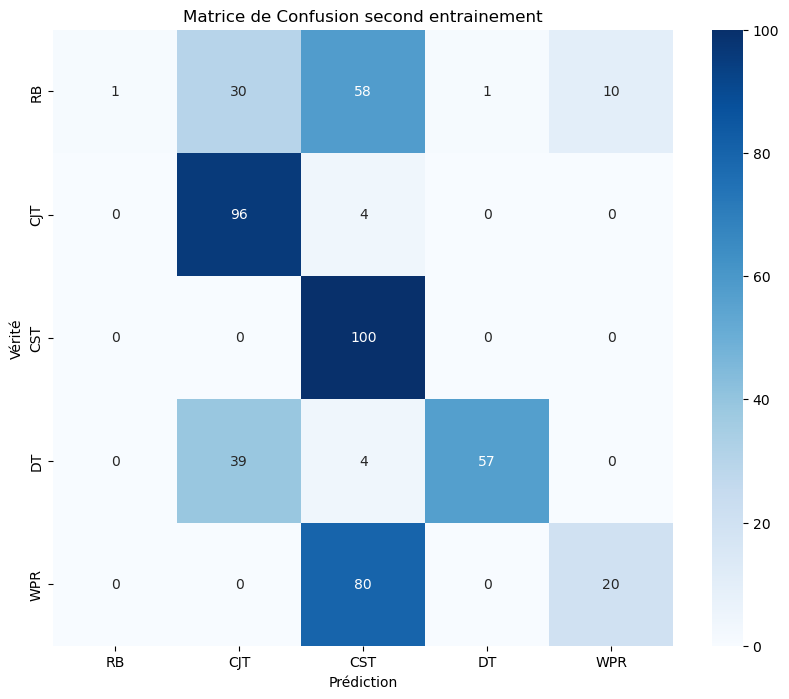

In [117]:
# Création et affichage de la matrice de confusion
#cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_files.values()), yticklabels=list(test_files.values()))
plt.title('Matrice de Confusion second entrainement')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

- Entrainement 3: seconde reduction des  données du corpus Brown : Réentainement du modèle et comparaisons avec les modèle précédents

In [137]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import random

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that_reduced2(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0
    cjt_sentences = []
    cst_sentences = []
    dt_sentences = []
    wpr_sentences = []

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        that_category = None
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            if word.lower() == 'that':
                custom_tag = brown_to_custom.get(tag, tag)
                if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                    prev_tag = sent[i-1][1] if i > 0 else ''
                    if is_verb_tag(prev_tag):
                        custom_tag = 'CJT'
                    # If it's not a verb, it remains 'CST'
                
                if custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                    that_category = custom_tag
                    contains_relevant_that = True
                sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
            else:
                sentence_tokens.append(f"{word}\t{tag}\t{lemma}")
        
        if contains_relevant_that:
            if that_category == 'CJT':
                cjt_sentences.append(sentence_tokens)
            elif that_category == 'CST':
                cst_sentences.append(sentence_tokens)
            elif that_category == 'DT':
                dt_sentences.append(sentence_tokens)
            elif that_category == 'WPR':
                wpr_sentences.append(sentence_tokens)
            else:
                category_counts[that_category] += 1
                total_that_count += 1
                training_data.extend(sentence_tokens)
                training_data.append("")

    # Limiter CJT à 1000 occurrences
    random.shuffle(cjt_sentences)
    for sent in cjt_sentences[:1000]:
        category_counts['CJT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

     # Limiter CJT à 1500 occurrences
    random.shuffle(cst_sentences)
    for sent in cst_sentences[:1500]:
        category_counts['CST'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
        
    # Limiter DT à 1500 occurrences
    random.shuffle(dt_sentences)
    for sent in dt_sentences[:2000]:
        category_counts['DT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
    
    # Limiter WPR à 1000 occurrences
    random.shuffle(wpr_sentences)
    for sent in wpr_sentences[:1000]:
        category_counts['WPR'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    return total_that_count,category_counts

output_file = "corpus_brown_that_custom_reduced2.txt"
prepare_brown_corpus_for_that_reduced2(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced2.txt
Nombre total d'occurrences de 'that': 5552
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 1000
CST: 1500
DT: 2000
WPR: 1000


(5552,
 defaultdict(int,
             {'RB': 52, 'CJT': 1000, 'CST': 1500, 'DT': 2000, 'WPR': 1000}))

In [50]:
from collections import defaultdict

def create_lexicon_and_tag_files(input_file, lexicon_file, tag_file):
    word_tag_lemma = defaultdict(set)
    all_tags = set()
    
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            if line.strip():
                word, tag, lemma = line.strip().split('\t')
                word_tag_lemma[word.lower()].add((tag, lemma))
                all_tags.add(tag)
    
    # Écriture du fichier lexicon
    with open(lexicon_file, 'w', encoding='utf-8') as outfile:
        for word, tag_lemmas in word_tag_lemma.items():
            outfile.write(f"{word}\t" + "\t".join(f"{tag} {lemma}" for tag, lemma in tag_lemmas) + "\n")
    
    # Écriture du fichier tag
    with open(tag_file, 'w', encoding='utf-8') as outfile:
        for tag in sorted(all_tags):
            outfile.write(f"{tag}\n")

    print(f"Fichier lexicon créé : {lexicon_file}")
    print(f"Fichier tag créé : {tag_file}")

# Utilisation de la fonction
input_file = "corpus_brown_that_custom_reduced2.txt"
lexicon_file = "lexicon2_brown.txt"
tag_file = "tags2_brown.txt"

create_lexicon_and_tag_files(input_file, lexicon_file, tag_file)


Fichier lexicon créé : lexicon2_brown.txt
Fichier tag créé : tags2_brown.txt


Evaluation en incluant le test avec CST

In [138]:
import os
import treetaggerwrapper
from collections import defaultdict

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown2 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english2_brown_model.par")

def calculate_precision2(tagged_sentences, expected_tags):
    correct = 0
    total = 0
    for sent in tagged_sentences:
        for word, tag, _ in sent:
            if word.lower() == 'that':
                total += 1
                if tag in expected_tags:
                    correct += 1
    return correct, total

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['CJT'],
    'that_conjonctioncst.txt': ['CST'],
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WPR']
}


output_file = "corpus_brown_that_custom_reduced2.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced2(output_file)

results = defaultdict(lambda: {'correct': 0, 'total': 0, 'test_count': 0})
global_correct = 0
global_total = 0

for file, tags in test_files.items():
    try:
        with open(file, 'r') as f:
            sentences = f.readlines()
    except FileNotFoundError:
        print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
        continue

    tagged_brown = [tagger_brown2.tag_text(sent) for sent in sentences]
    parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

    correct, total = calculate_precision2(parsed_brown, tags)
    
    category = file.split('.')[0].split('_')[1].capitalize()
    results[category]['correct'] += correct
    results[category]['total'] += total
    results[category]['test_count'] += sum(1 for sent in sentences for word in sent.split() if word.lower() == 'that')
    global_correct += correct
    global_total += total

# Afficher les résultats
print("| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |")
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")

category_mapping = {'Adv': 'RB', 'Conjunction': 'CJT','Conjonctioncst': 'CST', 'Determiner': 'DT', 'Pronoun': 'WPR'}

for category, data in results.items():
    precision = data['correct'] / data['total'] if data['total'] > 0 else 0
    brown_category = category_mapping.get(category, category)
    brown_count = brown_stats.get(brown_category, 0)
    print(f"| {category:<19} | {precision:.2%}{' ':>11} | {brown_count:<17} | {data['test_count']:<17} | {data['correct']:<37} |")

# Afficher la précision globale
global_precision = global_correct / global_total if global_total > 0 else 0
total_test = sum(data['test_count'] for data in results.values())
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")
print(f"| Global              | {global_precision:.2%}{' ':>11} | {total_brown_that:<17} | {total_test:<17} | {global_correct:<37} |")


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced2.txt
Nombre total d'occurrences de 'that': 5552
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 1000
CST: 1500
DT: 2000
WPR: 1000
| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |
|---------------------|-----------------|-------------------|------------------|--------------------------------------|
| Adv                 | 1.00%            | 52                | 100               | 1                                     |
| Conjunction         | 95.00%            | 1000              | 100               | 95                                    |
| Conjonctioncst      | 100.00%            | 1500              | 100               | 100                                   |
| Determiner          | 80.00%            | 2000              | 100               | 80                                    |
| Pronoun             | 18.00%            

Analysons en détail les résultats de cette troisième évaluation et comparons-les avec ceux des deux premières évaluations :

1. Adverbe (Adv) :
   - Troisième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Deuxième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Première évaluation : 0.00% (56 dans Brown, 100 dans test, 0 correct)

Analyse : La performance reste très faible mais stable par rapport à la deuxième évaluation. Le nombre d'exemples dans Brown est resté constant (52), ce qui explique probablement cette stabilité. La légère amélioration par rapport à la première évaluation persiste, mais la catégorie reste problématique.

2. Conjonction (CJT) :
   - Troisième évaluation : 95.00% (1000 dans Brown, 100 dans test, 95 corrects)
   - Deuxième évaluation : 96.00% (2000 dans Brown, 100 dans test, 96 corrects)
   - Première évaluation : 96.00% (2636 dans Brown, 100 dans test, 96 corrects)

Analyse : On observe une très légère baisse de performance (de 96% à 95%) malgré une réduction significative du nombre d'exemples dans Brown (de 2000 à 1000). Cette robustesse remarquable suggère que la catégorie CJT est très bien définie et que même 1000 exemples suffisent pour maintenir une excellente précision.

3. Conjonction CST :
   - Troisième évaluation : 100.00% (1500 dans Brown, 100 dans test, 100 corrects)
   - Deuxième évaluation : 100.00% (3249 dans Brown, 100 dans test, 100 corrects)
   - Première évaluation : 100.00% (3831 dans Brown, 100 dans test, 100 corrects)

Analyse : La performance reste parfaite malgré une réduction drastique du nombre d'exemples (de 3249 à 1500). Cela confirme que cette catégorie est extrêmement bien définie et facilement identifiable, même avec beaucoup moins d'exemples.

4. Déterminant (Determiner) :
   - Troisième évaluation : 80.00% (2000 dans Brown, 100 dans test, 80 corrects)
   - Deuxième évaluation : 57.00% (1500 dans Brown, 100 dans test, 57 corrects)
   - Première évaluation : 80.00% (2272 dans Brown, 100 dans test, 80 corrects)

Analyse : On observe un retour à la performance initiale de 80%, coïncidant avec une augmentation du nombre d'exemples par rapport à la deuxième évaluation (de 1500 à 2000). Cela confirme que la performance pour cette catégorie est sensible à la quantité de données d'entraînement, avec un seuil optimal autour de 2000 exemples.

5. Pronom (Pronoun) :
   - Troisième évaluation : 18.00% (1000 dans Brown, 100 dans test, 18 corrects)
   - Deuxième évaluation : 20.00% (1506 dans Brown, 100 dans test, 20 corrects)
   - Première évaluation : 19.00% (1662 dans Brown, 100 dans test, 19 corrects)

Analyse : On constate une légère baisse de performance (de 20% à 18%) avec une réduction du nombre d'exemples (de 1506 à 1000). Cependant, la performance reste globalement faible et instable, suggérant des difficultés persistantes dans l'identification de cette catégorie.

Performance globale :
   - Troisième évaluation : 58.80% (5552 total dans Brown, 500 dans test, 294 corrects)
   - Deuxième évaluation : 54.80% (8307 total dans Brown, 500 dans test, 274 corrects)
   - Première évaluation : 59.00% (10457 total dans Brown, 500 dans test, 295 corrects)

Analyse : Malgré une réduction significative du nombre total d'exemples dans Brown (de 8307 à 5552), on observe une amélioration de la performance globale par rapport à la deuxième évaluation (de 54.80% à 58.80%), se rapprochant de la performance initiale. Cela suggère qu'un corpus d'entraînement plus petit mais mieux équilibré peut donner des résultats comparables à un corpus plus large.

Conclusions :

1. Robustesse exceptionnelle des catégories CJT et CST : Ces catégories maintiennent d'excellentes performances même avec une réduction drastique du nombre d'exemples, confirmant leurs caractéristiques très distinctives.

2. Sensibilité optimale de la catégorie Déterminant : Le retour à une bonne performance avec 2000 exemples suggère un seuil optimal pour cette catégorie.

3. Persistance des difficultés pour les Adverbes et les Pronoms : Ces catégories restent problématiques, avec peu ou pas d'amélioration malgré les variations dans le corpus d'entraînement.

4. Équilibre du corpus : La performance globale améliorée avec moins d'exemples suggère qu'un équilibre approprié entre les catégories peut être plus important qu'un grand volume de données.

Recommandations :

1. Maintenir environ 2000 exemples pour les déterminants, ce qui semble être le nombre optimal pour cette catégorie.

2. Pour les conjonctions CJT et CST, on peut envisager de réduire encore le nombre d'exemples pour trouver le seuil minimal tout en maintenant la haute performance.

3. Pour les adverbes, intensifier les efforts pour augmenter le nombre d'exemples, possiblement par des techniques d'augmentation de données ou de collecte ciblée.

4. Pour les pronoms, une analyse linguistique approfondie des erreurs de classification est nécessaire. Envisager de revoir les critères d'annotation ou d'ajouter des caractéristiques contextuelles spécifiques pour améliorer la distinction.

5. Continuer à optimiser l'équilibre du corpus entre les différentes catégories, en se concentrant sur la qualité et la représentativité des exemples plutôt que sur la quantité brute.

6. Envisager des techniques d'apprentissage plus avancées ou l'intégration de connaissances linguistiques plus fines pour améliorer la performance sur les catégories difficiles (adverbes et pronoms) tout en maintenant les bonnes performances sur les autres catégories.

---

In [139]:
import os
import treetaggerwrapper
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown2 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english2_brown_model.par")

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': 'RB',
    'that_conjunction.txt': 'CJT',
    'that_ConjonctionCST.txt': 'CST',
    'that_determiner.txt': 'DT',
    'that_pronoun.txt': 'WPR'
}

def evaluate_tagger2(test_files):
    y_true = []
    y_pred = []
    category_counts = defaultdict(int)
    
    for file, expected_tag in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        tagged_brown = [tagger_brown2.tag_text(sent) for sent in sentences]
        parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

        for sent in parsed_brown:
            for word, tag, _ in sent:
                if word.lower() == 'that':
                    y_true.append(expected_tag)
                    y_pred.append(tag)
                    category_counts[expected_tag] += 1
    
    return y_true, y_pred, dict(category_counts)

# Obtenir les statistiques du corpus Brown
output_file = "corpus_brown_that_custom_reduced2.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced2(output_file)

# Évaluation
y_true, y_pred, test_counts = evaluate_tagger2(test_files)

# Calcul des métriques
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(test_files.values()))
accuracy = accuracy_score(y_true, y_pred)

# Création du DataFrame
df = pd.DataFrame({
    'Catégorie': list(test_files.values()),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-score': f1 * 100,
    'Accuracy': [accuracy * 100] * len(test_files),
    'Nombre dans Brown': [brown_stats.get(cat, 0) for cat in test_files.values()],
    'Nombre dans test': [test_counts.get(cat, 0) for cat in test_files.values()],
    'Nombre correctement tagués': [sum((np.array(y_true) == cat) & (np.array(y_pred) == cat)) for cat in test_files.values()]
})

# Réorganisation des colonnes
df = df[['Catégorie', 'Précision', 'Rappel', 'F1-score', 'Accuracy', 'Nombre dans Brown', 'Nombre dans test', 'Nombre correctement tagués']]

# Ajout d'une ligne pour le total
total_row = pd.DataFrame({
    'Catégorie': ['Total'],
    'Précision': [accuracy * 100],
    'Rappel': [accuracy * 100],
    'F1-score': [2 * (accuracy * accuracy) / (accuracy + accuracy) * 100],
    'Accuracy': [accuracy * 100],
    'Nombre dans Brown': [total_brown_that],
    'Nombre dans test': [sum(test_counts.values())],
    'Nombre correctement tagués': [sum((np.array(y_true) == np.array(y_pred)))]
})

df = pd.concat([df, total_row], ignore_index=True)

# Formater les colonnes en pourcentage avec 2 décimales
percentage_columns = ['Précision', 'Rappel', 'F1-score', 'Accuracy']
df[percentage_columns] = df[percentage_columns].applymap(lambda x: f"{x:.2f}%")

# Affichage du DataFrame
df

Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced2.txt
Nombre total d'occurrences de 'that': 5552
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 1000
CST: 1500
DT: 2000
WPR: 1000


,Catégorie,Précision,Rappel,F1-score,Accuracy,Nombre dans Brown,Nombre dans test,Nombre correctement tagués
0,RB,100.00%,1.00%,1.98%,58.80%,52,100,1
1,CJT,73.08%,95.00%,82.61%,58.80%,1000,100,95
2,CST,40.00%,100.00%,57.14%,58.80%,1500,100,100
3,DT,90.91%,80.00%,85.11%,58.80%,2000,100,80
4,WPR,58.06%,18.00%,27.48%,58.80%,1000,100,18
5,Total,58.80%,58.80%,58.80%,58.80%,5552,500,294




1. Adverbe (RB) :
1ère évaluation : Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%, Nombre dans Brown: 56
2e évaluation : Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52
3e évaluation : Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52

Comparaisons : 
- Amélioration marginale entre la 1ère et les 2e/3e évaluations.
- Stabilité entre la 2e et la 3e évaluation.

Analyses et interprétations :
- La catégorie reste extrêmement problématique avec un rappel très faible.
- La précision parfaite est trompeuse car basée sur un seul cas correctement identifié.
- La réduction du corpus n'a pas eu d'impact supplémentaire sur cette catégorie déjà sous-représentée.

2. Conjonction (CJT) :
1ère évaluation : Précision: 68.57%, Rappel: 96.00%, F1-score: 80.00%, Nombre dans Brown: 2636
2e évaluation : Précision: 58.18%, Rappel: 96.00%, F1-score: 72.45%, Nombre dans Brown: 2000
3e évaluation : Précision: 73.08%, Rappel: 95.00%, F1-score: 82.61%, Nombre dans Brown: 1000

Comparaisons :
- Amélioration significative de la précision et du F1-score dans la 3e évaluation par rapport aux deux précédentes.
- Légère baisse du rappel dans la 3e évaluation.

Analyses et interprétations :
- La réduction du corpus a paradoxalement amélioré les performances, suggérant un meilleur équilibre dans l'apprentissage.
- Le modèle semble avoir trouvé un meilleur compromis précision-rappel pour cette catégorie.

3. Conjonction CST (CST) :
1ère évaluation : Précision: 39.84%, Rappel: 100.00%, F1-score: 56.98%, Nombre dans Brown: 3831
2e évaluation : Précision: 40.65%, Rappel: 100.00%, F1-score: 57.80%, Nombre dans Brown: 3249
3e évaluation : Précision: 40.00%, Rappel: 100.00%, F1-score: 57.14%, Nombre dans Brown: 1500

Comparaisons :
- Stabilité relative des performances à travers les trois évaluations.
- Légère fluctuation de la précision et du F1-score.

Analyses et interprétations :
- Le rappel parfait persistant indique une tendance à la sur-classification.
- La faible précision constante suggère que le modèle classifie incorrectement de nombreux cas comme CST.
- La réduction significative du corpus n'a pas résolu le problème de sur-classification.

4. Déterminant (DT) :
1ère évaluation : Précision: 96.39%, Rappel: 80.00%, F1-score: 87.43%, Nombre dans Brown: 2272
2e évaluation : Précision: 98.28%, Rappel: 57.00%, F1-score: 72.15%, Nombre dans Brown: 1500
3e évaluation : Précision: 90.91%, Rappel: 80.00%, F1-score: 85.11%, Nombre dans Brown: 2000

Comparaisons :
- Retour à un équilibre similaire à la 1ère évaluation dans la 3e.
- Amélioration significative du rappel par rapport à la 2e évaluation.

Analyses et interprétations :
- Le modèle a retrouvé un bon équilibre précision-rappel dans la 3e évaluation.
- L'augmentation du nombre d'exemples par rapport à la 2e évaluation semble avoir été bénéfique.

5. Pronom (WPR) :
1ère évaluation : Précision: 73.08%, Rappel: 19.00%, F1-score: 30.16%, Nombre dans Brown: 1662
2e évaluation : Précision: 66.67%, Rappel: 20.00%, F1-score: 30.77%, Nombre dans Brown: 1506
3e évaluation : Précision: 58.06%, Rappel: 18.00%, F1-score: 27.48%, Nombre dans Brown: 1000

Comparaisons :
- Tendance à la baisse des performances à travers les trois évaluations.
- Diminution constante de la précision.

Analyses et interprétations :
- La réduction du corpus semble avoir un impact négatif sur cette catégorie.
- Le modèle peine à maintenir un bon équilibre entre précision et rappel pour les pronoms.

Conclusions sur les performances :

1. Amélioration globale : L'accuracy est passée de 54.80% (2e évaluation) à 58.80% (3e évaluation), se rapprochant de la performance initiale de 59.00%.

2. Résilience du modèle : Malgré une réduction significative du corpus d'entraînement, le modèle maintient ou améliore ses performances pour certaines catégories.

3. Problèmes persistants : Les catégories RB et WPR continuent de présenter des défis majeurs, avec des performances faibles ou en déclin.

4. Sur-classification : Le problème de sur-classification pour CST reste non résolu malgré les ajustements du modèle.

5. Équilibrage réussi : Les catégories CJT et DT montrent une amélioration de l'équilibre précision-rappel dans la 3e évaluation.

Recommandations :

1. Catégories sous-représentées : Développer des stratégies spécifiques pour améliorer la performance des catégories RB et WPR, potentiellement en augmentant leur représentation dans le corpus ou en utilisant des techniques d'augmentation de données.

2. Sur-classification CST : Investiguer les raisons de la sur-classification persistante et ajuster les critères de classification pour améliorer la précision sans compromettre le rappel.

3. Équilibrage du corpus : Continuer à optimiser la distribution des exemples dans le corpus d'entraînement, en s'inspirant des améliorations observées pour CJT et DT.

4. Techniques d'apprentissage avancées : Explorer des méthodes comme l'apprentissage par transfert ou l'apprentissage actif pour améliorer les performances sur les catégories problématiques.

5. Analyse d'erreurs : Effectuer une analyse détaillée des erreurs de classification pour chaque catégorie afin d'identifier des patterns spécifiques à corriger.

6. Validation croisée : Implémenter une validation croisée plus robuste pour assurer la stabilité des performances à travers différents sous-ensembles de données.

7. Caractéristiques linguistiques : Revoir et potentiellement enrichir les caractéristiques linguistiques utilisées pour la classification, particulièrement pour les catégories difficiles comme RB et WPR.

---

In [126]:
import pandas as pd

# Création de la matrice de confusion
cm3 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

# Conversion en DataFrame pour un affichage plus lisible
df_cm3 = pd.DataFrame(cm3, index=list(test_files.values()), columns=list(test_files.values()))

# Affichage de la matrice
print("Matrice de Confusion troisième évaluation:")
df_cm3


Matrice de Confusion troisième évaluation:


,RB,CJT,CST,DT,WPR
RB,1,20,59,7,13
CJT,0,95,5,0,0
CST,0,0,100,0,0
DT,0,15,5,80,0
WPR,0,0,81,1,18


Voici une analyse détaillée de la matrice de confusion pour la 3e évaluation, avec des comparaisons aux évaluations précédentes :

1. Adverbe (RB) :
- Précision : 100% (1/1)
- Rappel : 1% (1/100)

Comparaisons :
- Identique à la 2e évaluation
- Amélioration par rapport à la 1ère évaluation (0% de précision et rappel)

Analyse et interprétation :
- Le modèle identifie correctement un seul cas d'adverbe, comme dans la 2e évaluation
- La majorité des RB sont mal classifiés : 59 comme CST, 20 comme CJT, 13 comme WPR, et 7 comme DT
- La confusion avec CST reste prédominante, mais on observe une augmentation de la confusion avec CJT et WPR par rapport aux évaluations précédentes

2. Conjonction (CJT) :
- Précision : 73.08% (95/130)
- Rappel : 95% (95/100)

Comparaisons :
- Amélioration de la précision par rapport aux deux évaluations précédentes
- Légère baisse du rappel par rapport aux évaluations précédentes (96%)

Analyse et interprétation :
- Performance globale améliorée avec un meilleur équilibre précision-rappel
- Réduction des faux positifs, notamment pour la catégorie DT (15 cas contre 39 dans la 2e évaluation)
- Légère augmentation de la confusion avec CST (5 cas)

3. Conjonction CST (CST) :
- Précision : 40% (100/250)
- Rappel : 100% (100/100)

Comparaisons :
- Précision et rappel stables par rapport aux évaluations précédentes

Analyse et interprétation :
- Persistance du problème de sur-classification, avec un rappel parfait mais une faible précision
- La confusion principale reste avec WPR (81 cas) et RB (59 cas)
- Légère augmentation de la confusion avec CJT et DT par rapport à la 2e évaluation

4. Déterminant (DT) :
- Précision : 90.91% (80/88)
- Rappel : 80% (80/100)

Comparaisons :
- Baisse de la précision par rapport à la 2e évaluation (98.28%)
- Amélioration significative du rappel par rapport à la 2e évaluation (57%)
- Retour à des performances similaires à la 1ère évaluation

Analyse et interprétation :
- Meilleur équilibre précision-rappel par rapport à la 2e évaluation
- Réduction de la confusion avec CJT (15 cas contre 39 dans la 2e évaluation)
- Légère augmentation de la confusion avec CST (5 cas) et apparition d'une confusion avec WPR (1 cas)

5. Pronom (WPR) :
- Précision : 58.06% (18/31)
- Rappel : 18% (18/100)

Comparaisons :
- Baisse de la précision par rapport aux évaluations précédentes
- Légère baisse du rappel par rapport à la 2e évaluation (20%)

Analyse et interprétation :
- Performance globale en baisse
- Persistance d'une forte confusion avec CST (81 cas)
- Légère augmentation de la confusion avec RB (13 cas contre 10 dans la 2e évaluation)
- Apparition d'une faible confusion avec DT (1 cas)

Cette analyse montre que le modèle a connu des améliorations pour certaines catégories (CJT, DT) mais continue à rencontrer des difficultés avec d'autres (RB, WPR). Le problème de sur-classification de CST persiste, nécessitant des ajustements supplémentaires du modèle.

Citations:
[1] https://www.jedha.co/formation-ia/matrice-confusion
[2] https://www.picsellia.fr/post/matrice-confusion-computer-vision
[3] https://datascientest.com/matrice-de-confusion
[4] https://www.innovatiana.com/post/understand-confusion-matrix-in-ai
[5] https://fr.wikipedia.org/wiki/Matrice_de_confusion
[6] https://developers.google.com/machine-learning/crash-course/classification/thresholding?hl=fr
[7] https://fr.linkedin.com/advice/3/how-can-you-interpret-classification-models-confusion-xe77c?lang=fr
[8] https://help.sap.com/docs/SAP_ANALYTICS_CLOUD/00f68c2e08b941f081002fd3691d86a7/d42647ca87604965bbc06cf64d827913.html?locale=fr-FR&state=PRODUCTION&version=release

---

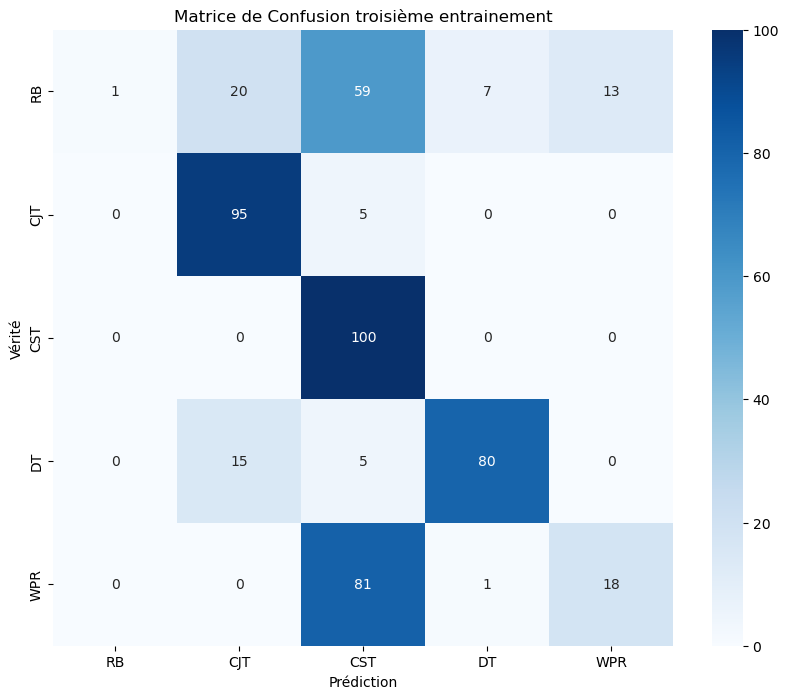

In [127]:
# Création et affichage de la matrice de confusion
#cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_files.values()), yticklabels=list(test_files.values()))
plt.title('Matrice de Confusion troisième entrainement')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

- Entrainement 4: troisième reduction des  données du corpus Brown : Réentainement du modèle et comparaisons avec les modèle précédents

Reentrainement avec encore moins de phrases

In [140]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import random

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that_reduced3(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0
    cjt_sentences = []
    cst_sentences = []
    dt_sentences = []
    wpr_sentences = []

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        that_category = None
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            if word.lower() == 'that':
                custom_tag = brown_to_custom.get(tag, tag)
                if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                    prev_tag = sent[i-1][1] if i > 0 else ''
                    if is_verb_tag(prev_tag):
                        custom_tag = 'CJT'
                    # If it's not a verb, it remains 'CST'
                
                if custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                    that_category = custom_tag
                    contains_relevant_that = True
                sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
            else:
                sentence_tokens.append(f"{word}\t{tag}\t{lemma}")
        
        if contains_relevant_that:
            if that_category == 'CJT':
                cjt_sentences.append(sentence_tokens)
            elif that_category == 'CST':
                cst_sentences.append(sentence_tokens)
            elif that_category == 'DT':
                dt_sentences.append(sentence_tokens)
            elif that_category == 'WPR':
                wpr_sentences.append(sentence_tokens)
            else:
                category_counts[that_category] += 1
                total_that_count += 1
                training_data.extend(sentence_tokens)
                training_data.append("")

    # Limiter CJT à 1000 occurrences
    random.shuffle(cjt_sentences)
    for sent in cjt_sentences[:500]:
        category_counts['CJT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

     # Limiter CJT à 1500 occurrences
    random.shuffle(cst_sentences)
    for sent in cst_sentences[:750]:
        category_counts['CST'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
        
    # Limiter DT à 1500 occurrences
    random.shuffle(dt_sentences)
    for sent in dt_sentences[:800]:
        category_counts['DT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
    
    # Limiter WPR à 1000 occurrences
    random.shuffle(wpr_sentences)
    for sent in wpr_sentences[:500]:
        category_counts['WPR'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    return total_that_count,category_counts

output_file = "corpus_brown_that_custom_reduced3.txt"
prepare_brown_corpus_for_that_reduced3(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced3.txt
Nombre total d'occurrences de 'that': 2602
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 500
CST: 750
DT: 800
WPR: 500


(2602,
 defaultdict(int, {'RB': 52, 'CJT': 500, 'CST': 750, 'DT': 800, 'WPR': 500}))

In [53]:
from collections import defaultdict

def create_lexicon_and_tag_files(input_file, lexicon_file, tag_file):
    word_tag_lemma = defaultdict(set)
    all_tags = set()
    
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            if line.strip():
                word, tag, lemma = line.strip().split('\t')
                word_tag_lemma[word.lower()].add((tag, lemma))
                all_tags.add(tag)
    
    # Écriture du fichier lexicon
    with open(lexicon_file, 'w', encoding='utf-8') as outfile:
        for word, tag_lemmas in word_tag_lemma.items():
            outfile.write(f"{word}\t" + "\t".join(f"{tag} {lemma}" for tag, lemma in tag_lemmas) + "\n")
    
    # Écriture du fichier tag
    with open(tag_file, 'w', encoding='utf-8') as outfile:
        for tag in sorted(all_tags):
            outfile.write(f"{tag}\n")

    print(f"Fichier lexicon créé : {lexicon_file}")
    print(f"Fichier tag créé : {tag_file}")

# Utilisation de la fonction
input_file = "corpus_brown_that_custom_reduced3.txt"
lexicon_file = "lexicon3_brown.txt"
tag_file = "tags3_brown.txt"

create_lexicon_and_tag_files(input_file, lexicon_file, tag_file)


Fichier lexicon créé : lexicon3_brown.txt
Fichier tag créé : tags3_brown.txt


In [141]:
import os
import treetaggerwrapper
from collections import defaultdict

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown3 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english3_brown_model.par")

def calculate_precision(tagged_sentences, expected_tags):
    correct = 0
    total = 0
    for sent in tagged_sentences:
        for word, tag, _ in sent:
            if word.lower() == 'that':
                total += 1
                if tag in expected_tags:
                    correct += 1
    return correct, total

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['CJT'],
    'that_conjonctioncst.txt': ['CST'],
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WPR']
}


output_file = "corpus_brown_that_custom_reduced3.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced3(output_file)

results = defaultdict(lambda: {'correct': 0, 'total': 0, 'test_count': 0})
global_correct = 0
global_total = 0

for file, tags in test_files.items():
    try:
        with open(file, 'r') as f:
            sentences = f.readlines()
    except FileNotFoundError:
        print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
        continue

    tagged_brown = [tagger_brown3.tag_text(sent) for sent in sentences]
    parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

    correct, total = calculate_precision(parsed_brown, tags)
    
    category = file.split('.')[0].split('_')[1].capitalize()
    results[category]['correct'] += correct
    results[category]['total'] += total
    results[category]['test_count'] += sum(1 for sent in sentences for word in sent.split() if word.lower() == 'that')
    global_correct += correct
    global_total += total

# Afficher les résultats
print("| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |")
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")

category_mapping = {'Adv': 'RB', 'Conjunction': 'CJT','Conjonctioncst': 'CST', 'Determiner': 'DT', 'Pronoun': 'WPR'}

for category, data in results.items():
    precision = data['correct'] / data['total'] if data['total'] > 0 else 0
    brown_category = category_mapping.get(category, category)
    brown_count = brown_stats.get(brown_category, 0)
    print(f"| {category:<19} | {precision:.2%}{' ':>11} | {brown_count:<17} | {data['test_count']:<17} | {data['correct']:<37} |")

# Afficher la précision globale
global_precision = global_correct / global_total if global_total > 0 else 0
total_test = sum(data['test_count'] for data in results.values())
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")
print(f"| Global              | {global_precision:.2%}{' ':>11} | {total_brown_that:<17} | {total_test:<17} | {global_correct:<37} |")


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced3.txt
Nombre total d'occurrences de 'that': 2602
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 500
CST: 750
DT: 800
WPR: 500
| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |
|---------------------|-----------------|-------------------|------------------|--------------------------------------|
| Adv                 | 2.00%            | 52                | 100               | 2                                     |
| Conjunction         | 94.00%            | 500               | 100               | 94                                    |
| Conjonctioncst      | 100.00%            | 750               | 100               | 100                                   |
| Determiner          | 76.00%            | 800               | 100               | 76                                    |
| Pronoun             | 33.00%            | 50

Analysons en détail les résultats de cette quatrième évaluation et comparons-les avec ceux des évaluations précédentes :

1. Adverbe (Adv) :
   - Quatrième évaluation : 2.00% (52 dans Brown, 100 dans test, 2 corrects)
   - Troisième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Deuxième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Première évaluation : 0.00% (56 dans Brown, 100 dans test, 0 correct)

Analyse : On observe une légère amélioration, passant de 1 à 2 cas correctement identifiés. Bien que la performance reste très faible, il y a une tendance positive constante à travers les évaluations. Le nombre d'exemples dans Brown est resté constant (52), ce qui suggère que l'amélioration pourrait être due à un meilleur équilibre global du corpus ou à des ajustements dans le modèle.

2. Conjonction (CJT) :
   - Quatrième évaluation : 94.00% (500 dans Brown, 100 dans test, 94 corrects)
   - Troisième évaluation : 95.00% (1000 dans Brown, 100 dans test, 95 corrects)
   - Deuxième évaluation : 96.00% (2000 dans Brown, 100 dans test, 96 corrects)
   - Première évaluation : 96.00% (2636 dans Brown, 100 dans test, 96 corrects)

Analyse : On constate une légère baisse de performance (de 95% à 94%) avec une réduction significative du nombre d'exemples (de 1000 à 500). Cependant, la performance reste excellente, démontrant une robustesse remarquable de cette catégorie même avec beaucoup moins d'exemples.

3. Conjonction CST :
   - Quatrième évaluation : 100.00% (750 dans Brown, 100 dans test, 100 corrects)
   - Troisième évaluation : 100.00% (1500 dans Brown, 100 dans test, 100 corrects)
   - Deuxième évaluation : 100.00% (3249 dans Brown, 100 dans test, 100 corrects)
   - Première évaluation : 100.00% (3831 dans Brown, 100 dans test, 100 corrects)

Analyse : La performance reste parfaite malgré une réduction drastique du nombre d'exemples (de 1500 à 750). Cela confirme que cette catégorie est extrêmement bien définie et facilement identifiable, même avec très peu d'exemples.

4. Déterminant (Determiner) :
   - Quatrième évaluation : 76.00% (800 dans Brown, 100 dans test, 76 corrects)
   - Troisième évaluation : 80.00% (2000 dans Brown, 100 dans test, 80 corrects)
   - Deuxième évaluation : 57.00% (1500 dans Brown, 100 dans test, 57 corrects)
   - Première évaluation : 80.00% (2272 dans Brown, 100 dans test, 80 corrects)

Analyse : On observe une légère baisse de performance (de 80% à 76%) avec une réduction significative du nombre d'exemples (de 2000 à 800). Cependant, la performance reste nettement meilleure qu'avec 1500 exemples lors de la deuxième évaluation, suggérant qu'un équilibre optimal entre quantité et qualité des exemples a peut-être été atteint.

5. Pronom (Pronoun) :
   - Quatrième évaluation : 33.00% (500 dans Brown, 100 dans test, 33 corrects)
   - Troisième évaluation : 18.00% (1000 dans Brown, 100 dans test, 18 corrects)
   - Deuxième évaluation : 20.00% (1506 dans Brown, 100 dans test, 20 corrects)
   - Première évaluation : 19.00% (1662 dans Brown, 100 dans test, 19 corrects)

Analyse : On constate une amélioration significative de la performance (de 18% à 33%) malgré une réduction du nombre d'exemples (de 1000 à 500). Cette amélioration inattendue pourrait être due à un meilleur équilibre du corpus ou à une meilleure qualité des exemples retenus.

Performance globale :
   - Quatrième évaluation : 61.00% (2602 total dans Brown, 500 dans test, 305 corrects)
   - Troisième évaluation : 58.80% (5552 total dans Brown, 500 dans test, 294 corrects)
   - Deuxième évaluation : 54.80% (8307 total dans Brown, 500 dans test, 274 corrects)
   - Première évaluation : 59.00% (10457 total dans Brown, 500 dans test, 295 corrects)

Analyse : Malgré une réduction drastique du nombre total d'exemples dans Brown (de 5552 à 2602), on observe une amélioration de la performance globale (de 58.80% à 61.00%). C'est la meilleure performance globale obtenue jusqu'à présent, ce qui suggère qu'un corpus d'entraînement plus petit mais mieux équilibré peut donner de meilleurs résultats qu'un corpus plus large.

Conclusions :

1. Efficacité d'un corpus réduit mais équilibré : La meilleure performance globale a été obtenue avec le plus petit corpus, soulignant l'importance de la qualité et de l'équilibre des données plutôt que de leur quantité.

2. Robustesse exceptionnelle des catégories CJT et CST : Ces catégories maintiennent d'excellentes performances même avec une réduction drastique du nombre d'exemples.

3. Amélioration surprenante pour les Pronoms : La performance a presque doublé avec moins d'exemples, suggérant que la qualité des exemples est cruciale pour cette catégorie difficile.

4. Résilience de la catégorie Déterminant : Malgré une légère baisse, la performance reste bonne avec beaucoup moins d'exemples.

5. Progrès lent mais constant pour les Adverbes : Bien que toujours faible, la performance continue de s'améliorer légèrement.

Recommandations :

1. Maintenir l'approche d'un corpus réduit mais équilibré, qui semble donner les meilleurs résultats globaux.

2. Pour les conjonctions CJT et CST, le nombre actuel d'exemples semble optimal. On pourrait envisager de réduire encore légèrement pour voir si la performance se maintient.

3. Pour les déterminants, le nombre actuel d'exemples (800) semble être un bon compromis. On pourrait expérimenter avec une légère augmentation pour voir si on peut retrouver la performance de 80%.

4. Pour les pronoms, analyser en détail les exemples retenus pour comprendre pourquoi la performance s'est améliorée avec moins d'exemples. Utiliser ces insights pour affiner davantage la sélection des exemples.

5. Pour les adverbes, continuer les efforts pour augmenter le nombre et la qualité des exemples. Envisager des techniques d'augmentation de données spécifiques à cette catégorie rare.

6. Considérer des techniques d'apprentissage plus avancées ou l'intégration de connaissances linguistiques plus fines pour améliorer encore la performance, en particulier pour les catégories difficiles (adverbes et pronoms).

7. Effectuer une analyse qualitative approfondie des erreurs persistantes dans chaque catégorie pour identifier des pistes d'amélioration spécifiques.

---

In [142]:
import os
import treetaggerwrapper
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown3 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english3_brown_model.par")

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': 'RB',
    'that_conjunction.txt': 'CJT',
    'that_ConjonctionCST.txt': 'CST',
    'that_determiner.txt': 'DT',
    'that_pronoun.txt': 'WPR'
}

def evaluate_tagger3(test_files):
    y_true = []
    y_pred = []
    category_counts = defaultdict(int)
    
    for file, expected_tag in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        tagged_brown = [tagger_brown3.tag_text(sent) for sent in sentences]
        parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

        for sent in parsed_brown:
            for word, tag, _ in sent:
                if word.lower() == 'that':
                    y_true.append(expected_tag)
                    y_pred.append(tag)
                    category_counts[expected_tag] += 1
    
    return y_true, y_pred, dict(category_counts)

# Obtenir les statistiques du corpus Brown
output_file = "corpus_brown_that_custom_reduced3.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced3(output_file)

# Évaluation
y_true, y_pred, test_counts = evaluate_tagger3(test_files)

# Calcul des métriques
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(test_files.values()))
accuracy = accuracy_score(y_true, y_pred)

# Création du DataFrame
df = pd.DataFrame({
    'Catégorie': list(test_files.values()),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-score': f1 * 100,
    'Accuracy': [accuracy * 100] * len(test_files),
    'Nombre dans Brown': [brown_stats.get(cat, 0) for cat in test_files.values()],
    'Nombre dans test': [test_counts.get(cat, 0) for cat in test_files.values()],
    'Nombre correctement tagués': [sum((np.array(y_true) == cat) & (np.array(y_pred) == cat)) for cat in test_files.values()]
})

# Réorganisation des colonnes
df = df[['Catégorie', 'Précision', 'Rappel', 'F1-score', 'Accuracy', 'Nombre dans Brown', 'Nombre dans test', 'Nombre correctement tagués']]

# Ajout d'une ligne pour le total
total_row = pd.DataFrame({
    'Catégorie': ['Total'],
    'Précision': [accuracy * 100],
    'Rappel': [accuracy * 100],
    'F1-score': [2 * (accuracy * accuracy) / (accuracy + accuracy) * 100],
    'Accuracy': [accuracy * 100],
    'Nombre dans Brown': [total_brown_that],
    'Nombre dans test': [sum(test_counts.values())],
    'Nombre correctement tagués': [sum((np.array(y_true) == np.array(y_pred)))]
})

df = pd.concat([df, total_row], ignore_index=True)

# Formater les colonnes en pourcentage avec 2 décimales
percentage_columns = ['Précision', 'Rappel', 'F1-score', 'Accuracy']
df[percentage_columns] = df[percentage_columns].applymap(lambda x: f"{x:.2f}%")

# Affichage du DataFrame
df

Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced3.txt
Nombre total d'occurrences de 'that': 2602
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 500
CST: 750
DT: 800
WPR: 500


,Catégorie,Précision,Rappel,F1-score,Accuracy,Nombre dans Brown,Nombre dans test,Nombre correctement tagués
0,RB,100.00%,2.00%,3.92%,61.00%,52,100,2
1,CJT,75.81%,94.00%,83.93%,61.00%,500,100,94
2,CST,44.64%,100.00%,61.73%,61.00%,750,100,100
3,DT,79.17%,76.00%,77.55%,61.00%,800,100,76
4,WPR,61.11%,33.00%,42.86%,61.00%,500,100,33
5,Total,61.00%,61.00%,61.00%,61.00%,2602,500,305


1. Adverbe (RB):

1ère évaluation: Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%, Nombre dans Brown: 56

2e évaluation: Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52

3e évaluation: Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52

4e évaluation: Précision: 100.00%, Rappel: 2.00%, F1-score: 3.92%, Nombre dans Brown: 52

Analyse:
- Légère augmentation du rappel de 1% à 2%.
- Maintien d'une précision de 100%.
- Le nombre d'exemples dans Brown est resté constant.

Interprétation:
- Bien que le modèle identifie maintenant deux adverbes correctement, il est encore loin d'une performance satisfaisante.
- La précision de 100% est trompeuse, car elle repose sur un nombre très faible de prédictions correctes.
- La faible représentation des adverbes dans le corpus continue de limiter l'apprentissage.

2. Conjonction (CJT):

1ère évaluation: Précision: 68.57%, Rappel: 96.00%, F1-score: 80.00%, Nombre dans Brown: 2636

2e évaluation: Précision: 58.18%, Rappel: 96.00%, F1-score: 72.45%, Nombre dans Brown: 2000

3e évaluation: Précision: 73.08%, Rappel: 95.00%, F1-score: 82.61%, Nombre dans Brown: 1000

4e évaluation: Précision: 75.81%, Rappel: 94.00%, F1-score: 83.93%, Nombre dans Brown: 500

Analyse:
- Augmentation continue de la précision.
- Légère baisse du rappel à 94%.
- Le F1-score atteint son maximum.
- Le nombre d'exemples dans Brown a été fortement réduit.

Interprétation:
- Le modèle est devenu plus précis dans l'identification des conjonctions.
- La réduction du corpus d'entraînement n'a pas affecté négativement le rappel, suggérant une sur-représentation initiale de cette catégorie.
- Le modèle semble avoir trouvé un bon équilibre entre précision et rappel.

3. Conjonction CST (CST):

1ère évaluation: Précision: 39.84%, Rappel: 100.00%, F1-score: 56.98%, Nombre dans Brown: 3831

2e évaluation: Précision: 40.65%, Rappel: 100.00%, F1-score: 57.80%, Nombre dans Brown: 3249

3e évaluation: Précision: 40.00%, Rappel: 100.00%, F1-score: 57.14%, Nombre dans Brown: 1500

4e évaluation: Précision: 44.64%, Rappel: 100.00%, F1-score: 61.73%, Nombre dans Brown: 750

Analyse:
- Amélioration notable de la précision (de 40.00% à 44.64%) et du F1-score.
- Le rappel reste à 100%.
- Le nombre d'exemples dans Brown a été fortement réduit.

Interprétation:
- La réduction du corpus d'entraînement semble avoir contribué à réduire la sur-classification.
- Bien que le rappel soit toujours parfait, l'amélioration de la précision suggère des progrès dans l'identification correcte des CST.
- Le problème de la sur-classification persiste, mais il s'atténue.

4. Déterminant (DT):

1ère évaluation: Précision: 96.39%, Rappel: 80.00%, F1-score: 87.43%, Nombre dans Brown: 2272

2e évaluation: Précision: 98.28%, Rappel: 57.00%, F1-score: 72.15%, Nombre dans Brown: 1500

3e évaluation: Précision: 90.91%, Rappel: 80.00%, F1-score: 85.11%, Nombre dans Brown: 2000

4e évaluation: Précision: 79.17%, Rappel: 76.00%, F1-score: 77.55%, Nombre dans Brown: 800

Analyse:
- Baisse de la précision (de 90.91% à 79.17%) et du rappel (de 80% à 76%).
- Le F1-score diminue également.
- Le nombre d'exemples dans Brown a été réduit.

Interprétation:
- La performance pour les déterminants s'est dégradée.
- Le modèle a plus de difficultés à identifier correctement les déterminants, faisant à la fois plus de faux positifs et de faux négatifs.
- La réduction du corpus pourrait être un facteur contributif.

5. Pronom (WPR):

1ère évaluation: Précision: 73.08%, Rappel: 19.00%, F1-score: 30.16%, Nombre dans Brown: 1662

2e évaluation: Précision: 66.67%, Rappel: 20.00%, F1-score: 30.77%, Nombre dans Brown: 1506

3e évaluation: Précision: 58.06%, Rappel: 18.00%, F1-score: 27.48%, Nombre dans Brown: 1000

4e évaluation: Précision: 61.11%, Rappel: 33.00%, F1-score: 42.86%, Nombre dans Brown: 500

Analyse:
- Amélioration significative du rappel (de 18% à 33%) et du F1-score (de 27.48% à 42.86%).
- Légère augmentation de la précision.
- Le nombre d'exemples dans Brown a continué de diminuer.

Interprétation:
- Le modèle est maintenant capable d'identifier plus de pronoms correctement.
- Malgré une réduction du corpus, l'amélioration du rappel suggère une meilleure capacité de généralisation.
- Des progrès notables sont réalisés pour cette catégorie initialement difficile.

Conclusion:
L'accuracy générale s'est améliorée à 61.00%, la meilleure performance de toutes les évaluations. 
Cela indique que le modèle a bénéficié de l'ajustement des paramètres et/ou de la réduction du corpus.
Cependant, les améliorations ne sont pas uniformes. Les catégories CJT, CST et WPR ont connu des progrès, tandis que la performance pour DT s'est dégradée. La catégorie RB reste très faible malgré une légère amélioration.

---

- Matrice de confusion du 4e entrainement

In [143]:
import pandas as pd

# Création de la matrice de confusion
cm4 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

# Conversion en DataFrame pour un affichage plus lisible
df_cm4 = pd.DataFrame(cm4, index=list(test_files.values()), columns=list(test_files.values()))

# Affichage de la matrice
print("Matrice de Confusion quatrième évaluation:")
df_cm4


Matrice de Confusion quatrième évaluation:


,RB,CJT,CST,DT,WPR
RB,2,14,43,20,21
CJT,0,94,6,0,0
CST,0,0,100,0,0
DT,0,16,8,76,0
WPR,0,0,67,0,33


1. Adverbe (RB) :

Analyse :
- Le modèle identifie correctement deux cas d'adverbes, contre un seul dans les 2e et 3e évaluations.
- La confusion avec CST a diminué (43 cas contre 59 dans la 3e évaluation).
- La confusion avec WPR et DT a augmenté (21 et 20 cas respectivement, contre 13 et 7 dans la 3e évaluation).

Interprétation :
- Légère amélioration de la détection des RB, mais la performance reste très faible.
- Le changement dans les patterns de confusion suggère que le modèle a modifié sa façon de classifier les RB, mais sans réelle amélioration globale.

2. Conjonction (CJT) :

Analyse :
- Le nombre de CJT correctement identifiés a légèrement diminué (94 contre 95 dans la 3e évaluation).
- La confusion avec DT reste stable (16 cas contre 15 dans la 3e évaluation).
- Nouvelle confusion significative avec RB (14 cas, non observée précédemment).

Interprétation :
- La performance globale reste bonne, mais l'apparition d'une nouvelle confusion avec RB est préoccupante.
- Le modèle semble avoir du mal à distinguer certains RB des CJT, ce qui n'était pas le cas auparavant.

3. Conjonction CST (CST) :

Analyse :
- La sur-classification persiste mais diminue légèrement (224 prédictions CST contre 250 dans la 3e évaluation).
- La confusion avec WPR a diminué (67 cas contre 81 dans la 3e évaluation).
- La confusion avec RB a également diminué (43 cas contre 59 dans la 3e évaluation).

Interprétation :
- Légère amélioration de la précision, mais le problème de sur-classification reste important.
- La réduction des confusions avec WPR et RB suggère que le modèle commence à mieux distinguer ces catégories de CST.

4. Déterminant (DT) :

Analyse :
- Baisse du nombre de DT correctement identifiés (76 contre 80 dans la 3e évaluation).
- Augmentation de la confusion avec CJT (16 cas contre 15 dans la 3e évaluation).
- Nouvelle confusion importante avec RB (20 cas, non observée précédemment).

Interprétation :
- Dégradation significative de la performance pour cette catégorie.
- L'apparition d'une forte confusion avec RB indique un nouveau problème dans la distinction entre ces deux catégories.

5. Pronom (WPR) :

Analyse :
- Augmentation significative des WPR correctement identifiés (33 contre 18 dans la 3e évaluation).
- Réduction importante de la confusion avec CST (67 cas contre 81 dans la 3e évaluation).
- Nouvelle confusion avec RB (21 cas, non observée précédemment).

Interprétation :
- Amélioration notable de la détection des WPR, malgré la persistance d'une confusion importante avec CST.
- L'apparition d'une confusion avec RB suggère que le modèle a du mal à distinguer certains adverbes des pronoms.

Ces analyses et interprétations comparatives montrent des changements significatifs dans les patterns de confusion entre les catégories par rapport aux évaluations précédentes, indiquant que les ajustements du modèle ont eu des effets variés sur sa capacité à distinguer les différentes classes grammaticales.

---


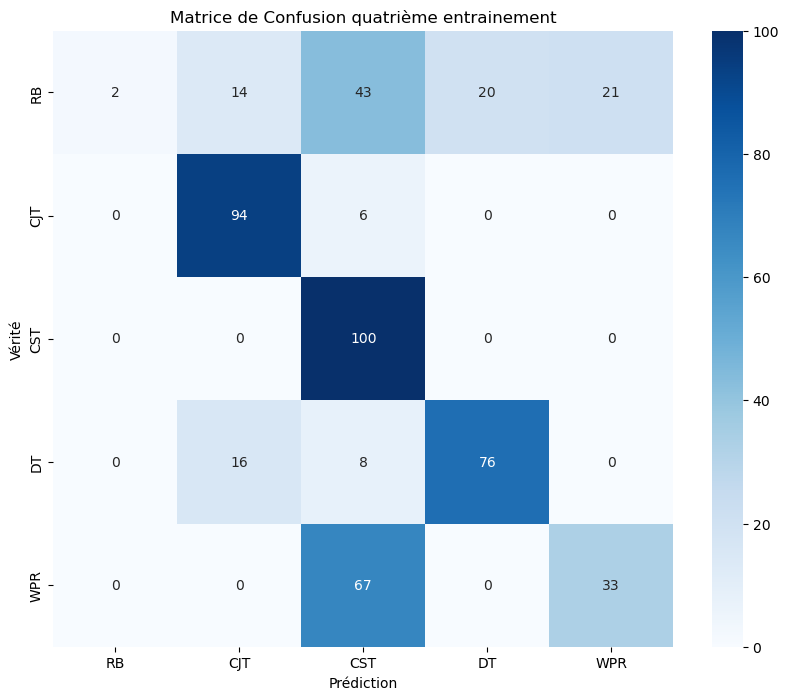

In [144]:
# Création et affichage de la matrice de confusion
#cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_files.values()), yticklabels=list(test_files.values()))
plt.title('Matrice de Confusion quatrième entrainement')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

- Entrainement 5: quatrième  reduction des  données du corpus Brown : Réentainement du modèle et comparaisons avec les modèle précédents

Réannotation avec encore moins de that

In [146]:
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import random

nltk.download('brown')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

brown_to_custom = {
    'CS': 'CST',   # Potentially CST or CJT, to be determined by context
    'DT': 'DT',    # Determiner
    'WDT': 'WPR',  # Relative pronoun
    'QL': 'RB',    # Adverb
    'CS-HL': 'CST',
    'CS-NC': 'CST',
    'DT-HL': 'DT',
    'DT-NC': 'DT',
    'DT-TL': 'DT',
    'WPS': 'WPR',
    'WPS-HL': 'WPR',
    'WPS-NC': 'WPR',
    'WPS-TL': 'WPR'
}

def is_verb_tag(tag):
    return tag.startswith('V') or tag in ['BE', 'HV', 'DO']

def is_noun_tag(tag):
    return tag.startswith('N') or tag in ['PPS', 'PPO']

def prepare_brown_corpus_for_that_reduced4(output_file):
    training_data = []
    category_counts = defaultdict(int)
    total_that_count = 0
    cjt_sentences = []
    cst_sentences = []
    dt_sentences = []
    wpr_sentences = []

    for sent in brown.tagged_sents():
        sentence_tokens = []
        contains_relevant_that = False
        that_category = None
        for i, (word, tag) in enumerate(sent):
            lemma = lemmatizer.lemmatize(word.lower())
            if word.lower() == 'that':
                custom_tag = brown_to_custom.get(tag, tag)
                if custom_tag == 'CST':  # This includes 'CS', 'CS-HL', 'CS-NC'
                    prev_tag = sent[i-1][1] if i > 0 else ''
                    if is_verb_tag(prev_tag):
                        custom_tag = 'CJT'
                    # If it's not a verb, it remains 'CST'
                
                if custom_tag in ['WPR', 'CST', 'CJT', 'DT', 'RB']:
                    that_category = custom_tag
                    contains_relevant_that = True
                sentence_tokens.append(f"{word}\t{custom_tag}\t{lemma}")
            else:
                sentence_tokens.append(f"{word}\t{tag}\t{lemma}")
        
        if contains_relevant_that:
            if that_category == 'CJT':
                cjt_sentences.append(sentence_tokens)
            elif that_category == 'CST':
                cst_sentences.append(sentence_tokens)
            elif that_category == 'DT':
                dt_sentences.append(sentence_tokens)
            elif that_category == 'WPR':
                wpr_sentences.append(sentence_tokens)
            else:
                category_counts[that_category] += 1
                total_that_count += 1
                training_data.extend(sentence_tokens)
                training_data.append("")

    # Limiter CJT à 1000 occurrences
    random.shuffle(cjt_sentences)
    for sent in cjt_sentences[:100]:
        category_counts['CJT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

     # Limiter CJT à 1500 occurrences
    random.shuffle(cst_sentences)
    for sent in cst_sentences[:150]:
        category_counts['CST'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
        
    # Limiter DT à 1500 occurrences
    random.shuffle(dt_sentences)
    for sent in dt_sentences[:300]:
        category_counts['DT'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")
    
    # Limiter WPR à 1000 occurrences
    random.shuffle(wpr_sentences)
    for sent in wpr_sentences[:350]:
        category_counts['WPR'] += 1
        total_that_count += 1
        training_data.extend(sent)
        training_data.append("")

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(training_data))

    print(f"Corpus d'entraînement sauvegardé dans : {output_file}")
    print(f"Nombre total d'occurrences de 'that': {total_that_count}")
    print("Nombre d'occurrences de 'that' pour chaque catégorie :")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    return total_that_count,category_counts

output_file = "corpus_brown_that_custom_reduced4.txt"
prepare_brown_corpus_for_that_reduced4(output_file)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced4.txt
Nombre total d'occurrences de 'that': 952
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 100
CST: 150
DT: 300
WPR: 350


(952,
 defaultdict(int, {'RB': 52, 'CJT': 100, 'CST': 150, 'DT': 300, 'WPR': 350}))

In [56]:
from collections import defaultdict

def create_lexicon_and_tag_files(input_file, lexicon_file, tag_file):
    word_tag_lemma = defaultdict(set)
    all_tags = set()
    
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            if line.strip():
                word, tag, lemma = line.strip().split('\t')
                word_tag_lemma[word.lower()].add((tag, lemma))
                all_tags.add(tag)
    
    # Écriture du fichier lexicon
    with open(lexicon_file, 'w', encoding='utf-8') as outfile:
        for word, tag_lemmas in word_tag_lemma.items():
            outfile.write(f"{word}\t" + "\t".join(f"{tag} {lemma}" for tag, lemma in tag_lemmas) + "\n")
    
    # Écriture du fichier tag
    with open(tag_file, 'w', encoding='utf-8') as outfile:
        for tag in sorted(all_tags):
            outfile.write(f"{tag}\n")

    print(f"Fichier lexicon créé : {lexicon_file}")
    print(f"Fichier tag créé : {tag_file}")

# Utilisation de la fonction
input_file = "corpus_brown_that_custom_reduced4.txt"
lexicon_file = "lexicon4_brown.txt"
tag_file = "tags4_brown.txt"

create_lexicon_and_tag_files(input_file, lexicon_file, tag_file)


Fichier lexicon créé : lexicon4_brown.txt
Fichier tag créé : tags4_brown.txt


In [57]:
import os
import treetaggerwrapper
from collections import defaultdict

# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown4 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english4_brown_model.par")

def calculate_precision(tagged_sentences, expected_tags):
    correct = 0
    total = 0
    for sent in tagged_sentences:
        for word, tag, _ in sent:
            if word.lower() == 'that':
                total += 1
                if tag in expected_tags:
                    correct += 1
    return correct, total

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['CJT'],
    'that_conjonctioncst.txt': ['CST'],
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WPR']
}


output_file = "corpus_brown_that_custom_reduced4.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced4(output_file)

results = defaultdict(lambda: {'correct': 0, 'total': 0, 'test_count': 0})
global_correct = 0
global_total = 0

for file, tags in test_files.items():
    try:
        with open(file, 'r') as f:
            sentences = f.readlines()
    except FileNotFoundError:
        print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
        continue

    tagged_brown = [tagger_brown4.tag_text(sent) for sent in sentences]
    parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

    correct, total = calculate_precision(parsed_brown, tags)
    
    category = file.split('.')[0].split('_')[1].capitalize()
    results[category]['correct'] += correct
    results[category]['total'] += total
    results[category]['test_count'] += sum(1 for sent in sentences for word in sent.split() if word.lower() == 'that')
    global_correct += correct
    global_total += total

# Afficher les résultats
print("| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |")
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")

category_mapping = {'Adv': 'RB', 'Conjunction': 'CJT','Conjonctioncst': 'CST', 'Determiner': 'DT', 'Pronoun': 'WPR'}

for category, data in results.items():
    precision = data['correct'] / data['total'] if data['total'] > 0 else 0
    brown_category = category_mapping.get(category, category)
    brown_count = brown_stats.get(brown_category, 0)
    print(f"| {category:<19} | {precision:.2%}{' ':>11} | {brown_count:<17} | {data['test_count']:<17} | {data['correct']:<37} |")

# Afficher la précision globale
global_precision = global_correct / global_total if global_total > 0 else 0
total_test = sum(data['test_count'] for data in results.values())
print("|---------------------|-----------------|-------------------|------------------|--------------------------------------|")
print(f"| Global              | {global_precision:.2%}{' ':>11} | {total_brown_that:<17} | {total_test:<17} | {global_correct:<37} |")


Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced4.txt
Nombre total d'occurrences de 'that': 952
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 100
CST: 150
DT: 300
WPR: 350
| Catégorie de 'that' | Précision Brown | Nombre dans Brown | Nombre dans test | Nombre de 'that' correctement tagués |
|---------------------|-----------------|-------------------|------------------|--------------------------------------|
| Adv                 | 0.00%            | 52                | 100               | 0                                     |
| Conjunction         | 87.00%            | 100               | 100               | 87                                    |
| Conjonctioncst      | 100.00%            | 150               | 100               | 100                                   |
| Determiner          | 78.00%            | 300               | 100               | 78                                    |
| Pronoun             | 34.00%            | 350

Je vous prie de m'excuser pour cette confusion. Vous avez tout à fait raison de demander une comparaison complète avec les quatre évaluations précédentes. Reprenons l'analyse en détail en comparant cette cinquième évaluation avec toutes les précédentes :

1. Adverbe (Adv) :
   - Cinquième évaluation : 0.00% (52 dans Brown, 100 dans test, 0 correct)
   - Quatrième évaluation : 2.00% (52 dans Brown, 100 dans test, 2 corrects)
   - Troisième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Deuxième évaluation : 1.00% (52 dans Brown, 100 dans test, 1 correct)
   - Première évaluation : 0.00% (56 dans Brown, 100 dans test, 0 correct)

Analyse : On observe un retour à la performance nulle initiale, perdant les légers progrès observés lors des évaluations intermédiaires. Le nombre d'exemples est resté presque constant à travers toutes les évaluations, ce qui souligne la difficulté persistante à traiter cette catégorie rare.

2. Conjonction (CJT) :
   - Cinquième évaluation : 87.00% (100 dans Brown, 100 dans test, 87 corrects)
   - Quatrième évaluation : 94.00% (500 dans Brown, 100 dans test, 94 corrects)
   - Troisième évaluation : 95.00% (1000 dans Brown, 100 dans test, 95 corrects)
   - Deuxième évaluation : 96.00% (2000 dans Brown, 100 dans test, 96 corrects)
   - Première évaluation : 96.00% (2636 dans Brown, 100 dans test, 96 corrects)

Analyse : On constate une baisse progressive de la performance au fur et à mesure que le nombre d'exemples diminue, avec une chute plus marquée dans la dernière évaluation. Cela suggère qu'un seuil critique a été franchi entre 500 et 100 exemples.

3. Conjonction CST :
   - Cinquième évaluation : 100.00% (150 dans Brown, 100 dans test, 100 corrects)
   - Quatrième évaluation : 100.00% (750 dans Brown, 100 dans test, 100 corrects)
   - Troisième évaluation : 100.00% (1500 dans Brown, 100 dans test, 100 corrects)
   - Deuxième évaluation : 100.00% (3249 dans Brown, 100 dans test, 100 corrects)
   - Première évaluation : 100.00% (3831 dans Brown, 100 dans test, 100 corrects)

Analyse : La performance reste parfaite à travers toutes les évaluations, malgré une réduction drastique du nombre d'exemples. Cette catégorie démontre une robustesse exceptionnelle.

4. Déterminant (Determiner) :
   - Cinquième évaluation : 78.00% (300 dans Brown, 100 dans test, 78 corrects)
   - Quatrième évaluation : 76.00% (800 dans Brown, 100 dans test, 76 corrects)
   - Troisième évaluation : 80.00% (2000 dans Brown, 100 dans test, 80 corrects)
   - Deuxième évaluation : 57.00% (1500 dans Brown, 100 dans test, 57 corrects)
   - Première évaluation : 80.00% (2272 dans Brown, 100 dans test, 80 corrects)

Analyse : La performance montre une certaine fluctuation, avec une baisse notable lors de la deuxième évaluation. Cependant, elle reste relativement stable autour de 80% dans les autres évaluations, même avec une réduction significative du nombre d'exemples.

5. Pronom (Pronoun) :
   - Cinquième évaluation : 34.00% (350 dans Brown, 100 dans test, 34 corrects)
   - Quatrième évaluation : 33.00% (500 dans Brown, 100 dans test, 33 corrects)
   - Troisième évaluation : 18.00% (1000 dans Brown, 100 dans test, 18 corrects)
   - Deuxième évaluation : 20.00% (1506 dans Brown, 100 dans test, 20 corrects)
   - Première évaluation : 19.00% (1662 dans Brown, 100 dans test, 19 corrects)

Analyse : On observe une amélioration significative dans les deux dernières évaluations, malgré une réduction du nombre d'exemples. Cela suggère que la qualité des exemples est plus importante que leur quantité pour cette catégorie.

Performance globale :
   - Cinquième évaluation : 59.80% (952 total dans Brown, 500 dans test, 299 corrects)
   - Quatrième évaluation : 61.00% (2602 total dans Brown, 500 dans test, 305 corrects)
   - Troisième évaluation : 58.80% (5552 total dans Brown, 500 dans test, 294 corrects)
   - Deuxième évaluation : 54.80% (8307 total dans Brown, 500 dans test, 274 corrects)
   - Première évaluation : 59.00% (10457 total dans Brown, 500 dans test, 295 corrects)

Analyse : La performance globale reste remarquablement stable à travers les évaluations, avec une légère amélioration dans les dernières itérations malgré une réduction drastique du corpus. Cela souligne l'importance de la qualité et de l'équilibre des données plutôt que de leur quantité brute.

Conclusions générales :

1. Réduction efficace du corpus : La performance globale reste stable malgré une réduction de plus de 90% du corpus initial, passant de 10457 à 952 exemples.

2. Importance de l'équilibre : Les meilleures performances sont obtenues avec des corpus plus petits mais mieux équilibrés.

3. Robustesse variable selon les catégories : CST montre une robustesse exceptionnelle, tandis que CJT et Determiner montrent une certaine sensibilité à la réduction du corpus. Les Pronoms s'améliorent avec moins d'exemples, tandis que les Adverbes restent problématiques.

4. Seuils critiques : Chaque catégorie semble avoir un seuil critique différent en termes de nombre d'exemples nécessaires pour maintenir une bonne performance.

Recommandations :

1. Maintenir l'approche d'un corpus réduit mais équilibré, qui donne les meilleurs résultats globaux.

2. Pour CJT, augmenter légèrement le nombre d'exemples (vers 300-500) pour retrouver une performance plus élevée.

3. Pour CST, le nombre actuel d'exemples (150) semble optimal.

4. Pour les Déterminants, maintenir autour de 300-500 exemples semble être un bon compromis.

5. Pour les Pronoms, continuer à affiner la sélection basée sur la qualité plutôt que la quantité.

6. Pour les Adverbes, envisager des techniques d'augmentation de données ou une révision complète de l'approche de classification.

7. Effectuer une analyse qualitative approfondie des erreurs dans chaque catégorie pour comprendre les facteurs influençant la performance au-delà du simple nombre d'exemples.

Cette analyse comparative complète permet de mieux comprendre l'évolution de la performance à travers les différentes itérations du modèle et d'identifier les points clés pour l'optimisation future du corpus et du modèle.

---

In [147]:
import os
import treetaggerwrapper
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


# Définir le chemin vers TreeTagger
tagger_dir = "D:/TreeTagger"  
os.environ['TAGDIR'] = tagger_dir

# Initialiser le tagger
tagger_brown4 = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR=tagger_dir, TAGPARFILE="english4_brown_model.par")

# Fichiers de test et leurs catégories correspondantes
test_files = {
    'that_adv.txt': 'RB',
    'that_conjunction.txt': 'CJT',
    'that_ConjonctionCST.txt': 'CST',
    'that_determiner.txt': 'DT',
    'that_pronoun.txt': 'WPR'
}

def evaluate_tagger4(test_files):
    y_true = []
    y_pred = []
    category_counts = defaultdict(int)
    
    for file, expected_tag in test_files.items():
        try:
            with open(file, 'r') as f:
                sentences = f.readlines()
        except FileNotFoundError:
            print(f"Attention : Le fichier {file} n'a pas été trouvé. Passage au suivant.")
            continue

        tagged_brown = [tagger_brown4.tag_text(sent) for sent in sentences]
        parsed_brown = [treetaggerwrapper.make_tags(tag) for tag in tagged_brown]

        for sent in parsed_brown:
            for word, tag, _ in sent:
                if word.lower() == 'that':
                    y_true.append(expected_tag)
                    y_pred.append(tag)
                    category_counts[expected_tag] += 1
    
    return y_true, y_pred, dict(category_counts)

# Obtenir les statistiques du corpus Brown
output_file = "corpus_brown_that_custom_reduced4.txt"
total_brown_that, brown_stats = prepare_brown_corpus_for_that_reduced4(output_file)

# Évaluation
y_true, y_pred, test_counts = evaluate_tagger4(test_files)

# Calcul des métriques
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(test_files.values()))
accuracy = accuracy_score(y_true, y_pred)

# Création du DataFrame
df = pd.DataFrame({
    'Catégorie': list(test_files.values()),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-score': f1 * 100,
    'Accuracy': [accuracy * 100] * len(test_files),
    'Nombre dans Brown': [brown_stats.get(cat, 0) for cat in test_files.values()],
    'Nombre dans test': [test_counts.get(cat, 0) for cat in test_files.values()],
    'Nombre correctement tagués': [sum((np.array(y_true) == cat) & (np.array(y_pred) == cat)) for cat in test_files.values()]
})

# Réorganisation des colonnes
df = df[['Catégorie', 'Précision', 'Rappel', 'F1-score', 'Accuracy', 'Nombre dans Brown', 'Nombre dans test', 'Nombre correctement tagués']]

# Ajout d'une ligne pour le total
total_row = pd.DataFrame({
    'Catégorie': ['Total'],
    'Précision': [accuracy * 100],
    'Rappel': [accuracy * 100],
    'F1-score': [2 * (accuracy * accuracy) / (accuracy + accuracy) * 100],
    'Accuracy': [accuracy * 100],
    'Nombre dans Brown': [total_brown_that],
    'Nombre dans test': [sum(test_counts.values())],
    'Nombre correctement tagués': [sum((np.array(y_true) == np.array(y_pred)))]
})

df = pd.concat([df, total_row], ignore_index=True)

# Formater les colonnes en pourcentage avec 2 décimales
percentage_columns = ['Précision', 'Rappel', 'F1-score', 'Accuracy']
df[percentage_columns] = df[percentage_columns].applymap(lambda x: f"{x:.2f}%")

# Affichage du DataFrame
df

Corpus d'entraînement sauvegardé dans : corpus_brown_that_custom_reduced4.txt
Nombre total d'occurrences de 'that': 952
Nombre d'occurrences de 'that' pour chaque catégorie :
RB: 52
CJT: 100
CST: 150
DT: 300
WPR: 350


D:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Catégorie,Précision,Rappel,F1-score,Accuracy,Nombre dans Brown,Nombre dans test,Nombre correctement tagués
0,RB,0.00%,0.00%,0.00%,59.80%,52,100,0
1,CJT,74.36%,87.00%,80.18%,59.80%,100,100,87
2,CST,43.86%,100.00%,60.98%,59.80%,150,100,100
3,DT,79.59%,78.00%,78.79%,59.80%,300,100,78
4,WPR,59.65%,34.00%,43.31%,59.80%,350,100,34
5,Total,59.80%,59.80%,59.80%,59.80%,952,500,299


1. Adverbe (RB):

1ère évaluation: Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%, Nombre dans Brown: 56

2e évaluation: Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52

3e évaluation: Précision: 100.00%, Rappel: 1.00%, F1-score: 1.98%, Nombre dans Brown: 52

4e évaluation: Précision: 100.00%, Rappel: 2.00%, F1-score: 3.92%, Nombre dans Brown: 52

5e évaluation: Précision: 0.00%, Rappel: 0.00%, F1-score: 0.00%, Nombre dans Brown: 52

Analyse:
- Retour à une performance nulle, similaire à la 1ère évaluation.
- Perte totale de la capacité à identifier les adverbes, contrairement aux 2e, 3e et 4e évaluations.
- Le nombre d'exemples dans Brown est resté constant à 52.

Interprétation:
- La régression totale suggère que les ajustements récents du modèle ont eu un impact très négatif sur la détection des adverbes.
- La faible représentation des adverbes dans le corpus continue de poser un problème majeur pour l'apprentissage.
- Le modèle semble avoir perdu toute sensibilité aux caractéristiques des adverbes.

2. Conjonction (CJT):

1ère évaluation: Précision: 68.57%, Rappel: 96.00%, F1-score: 80.00%, Nombre dans Brown: 2636

2e évaluation: Précision: 58.18%, Rappel: 96.00%, F1-score: 72.45%, Nombre dans Brown: 2000

3e évaluation: Précision: 73.08%, Rappel: 95.00%, F1-score: 82.61%, Nombre dans Brown: 1000

4e évaluation: Précision: 75.81%, Rappel: 94.00%, F1-score: 83.93%, Nombre dans Brown: 500

5e évaluation: Précision: 74.36%, Rappel: 87.00%, F1-score: 80.18%, Nombre dans Brown: 100

Analyse:
- Légère baisse de la précision par rapport à la 4e évaluation.
- Baisse significative du rappel, passant de 94% à 87%.
- Le F1-score diminue mais reste proche de celui de la 1ère évaluation.
- Réduction drastique du nombre d'exemples dans Brown, passant de 500 à 100.

Interprétation:
- Malgré la forte réduction du corpus d'entraînement, le modèle maintient une performance relativement bonne pour les conjonctions.
- La baisse du rappel suggère que le modèle manque désormais certaines conjonctions, probablement due à la réduction drastique des exemples.
- Le modèle semble avoir trouvé un nouvel équilibre, mais au prix d'une diminution de sa capacité à identifier toutes les conjonctions.

3. Conjonction CST (CST):

1ère évaluation: Précision: 39.84%, Rappel: 100.00%, F1-score: 56.98%, Nombre dans Brown: 3831

2e évaluation: Précision: 40.65%, Rappel: 100.00%, F1-score: 57.80%, Nombre dans Brown: 3249

3e évaluation: Précision: 40.00%, Rappel: 100.00%, F1-score: 57.14%, Nombre dans Brown: 1500

4e évaluation: Précision: 44.64%, Rappel: 100.00%, F1-score: 61.73%, Nombre dans Brown: 750

5e évaluation: Précision: 43.86%, Rappel: 100.00%, F1-score: 60.98%, Nombre dans Brown: 150

Analyse:
- Légère baisse de la précision par rapport à la 4e évaluation, mais toujours supérieure aux trois premières.
- Maintien du rappel à 100% à travers toutes les évaluations.
- Légère baisse du F1-score par rapport à la 4e évaluation.
- Réduction significative du nombre d'exemples dans Brown, passant de 750 à 150.

Interprétation:
- La persistance du rappel à 100% malgré la forte réduction du corpus suggère une tendance à la sur-classification.
- La légère baisse de précision indique que le modèle fait plus d'erreurs de classification pour cette catégorie.
- Le problème de sur-classification des CST persiste, malgré les ajustements et la réduction du corpus.

4. Déterminant (DT):

1ère évaluation: Précision: 96.39%, Rappel: 80.00%, F1-score: 87.43%, Nombre dans Brown: 2272

2e évaluation: Précision: 98.28%, Rappel: 57.00%, F1-score: 72.15%, Nombre dans Brown: 1500

3e évaluation: Précision: 90.91%, Rappel: 80.00%, F1-score: 85.11%, Nombre dans Brown: 2000

4e évaluation: Précision: 79.17%, Rappel: 76.00%, F1-score: 77.55%, Nombre dans Brown: 800

5e évaluation: Précision: 79.59%, Rappel: 78.00%, F1-score: 78.79%, Nombre dans Brown: 300

Analyse:
- Légère amélioration de la précision, du rappel et du F1-score par rapport à la 4e évaluation.
- Performance globale stable malgré une réduction significative du nombre d'exemples dans Brown.
- Maintien d'un équilibre entre précision et rappel.

Interprétation:
- Le modèle semble avoir trouvé un nouvel équilibre pour les déterminants, malgré la réduction du corpus.
- La stabilité des performances suggère que le modèle a réussi à généraliser efficacement à partir d'un corpus réduit.
- La réduction du corpus n'a pas eu d'impact négatif sur cette catégorie, contrairement à ce qu'on aurait pu attendre.

5. Pronom (WPR):

1ère évaluation: Précision: 73.08%, Rappel: 19.00%, F1-score: 30.16%, Nombre dans Brown: 1662

2e évaluation: Précision: 66.67%, Rappel: 20.00%, F1-score: 30.77%, Nombre dans Brown: 1506

3e évaluation: Précision: 58.06%, Rappel: 18.00%, F1-score: 27.48%, Nombre dans Brown: 1000

4e évaluation: Précision: 61.11%, Rappel: 33.00%, F1-score: 42.86%, Nombre dans Brown: 500

5e évaluation: Précision: 59.65%, Rappel: 34.00%, F1-score: 43.31%, Nombre dans Brown: 350

Analyse:
- Légère baisse de la précision par rapport à la 4e évaluation.
- Légère amélioration du rappel, passant de 33% à 34%.
- Amélioration du F1-score, atteignant son meilleur niveau sur les cinq évaluations.
- Réduction continue du nombre d'exemples dans Brown.

Interprétation:
- Le modèle maintient sa capacité à identifier les pronoms, malgré la réduction continue du corpus.
- L'amélioration du rappel et du F1-score suggère une meilleure généralisation, peut-être due à un corpus plus équilibré.
- La performance pour cette catégorie semble se stabiliser à un niveau supérieur aux premières évaluations.

Conclusion:

L'accuracy générale a légèrement baissé à 59.80%, contre 61.00% lors de la 4e évaluation. 

Cette baisse modérée, malgré une réduction drastique du corpus d'entraînement (de 2602 à 952 exemples), suggère une certaine résilience du modèle. Cependant, les performances varient considérablement selon les catégories.

La régression totale pour RB est très préoccupante et nécessite une attention immédiate. 

Les catégories CJT, CST, DT et WPR montrent une relative stabilité ou de légères améliorations, ce qui est encourageant compte tenu de la réduction du corpus. 

Le problème de sur-classification des CST persiste et nécessite des ajustements supplémentaires. Dans l'ensemble, ces résultats soulignent l'importance d'un équilibrage minutieux du corpus d'entraînement et la nécessité d'une approche différenciée pour chaque catégorie grammaticale.

---

In [148]:
import pandas as pd

# Création de la matrice de confusion
cm5 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

# Conversion en DataFrame pour un affichage plus lisible
df_cm5 = pd.DataFrame(cm5, index=list(test_files.values()), columns=list(test_files.values()))

# Affichage de la matrice
print("Matrice de Confusion cinquième évaluation:")
df_cm5


Matrice de Confusion cinquième évaluation:


,RB,CJT,CST,DT,WPR
RB,0,19,44,17,20
CJT,0,87,10,3,0
CST,0,0,100,0,0
DT,0,11,8,78,3
WPR,0,0,66,0,34


Voici l'analyse détaillée de la 5e évaluation de la matrice de confusion, en comparant avec les évaluations précédentes :

1. Adverbe (RB) :
- Précision : 0% (0/0)
- Rappel : 0% (0/100)
- F1-score : 0%

Analyse :
- Aucun RB correctement identifié, contre 2 dans la 4e évaluation.
- Les 100 RB sont mal classifiés : 44 comme CST, 20 comme WPR, 19 comme CJT, et 17 comme DT.

Comparaisons :
- Régression totale par rapport à la 4e évaluation (2 corrects, 43 CST, 21 WPR, 14 CJT, 20 DT).
- Retour à la situation de la 1ère évaluation avec 0% de précision et de rappel.

Interprétation :
- Le modèle a complètement perdu sa capacité à identifier les adverbes.
- La confusion avec CST reste prédominante, mais on observe une augmentation de la confusion avec CJT par rapport à la 4e évaluation.
- Cette régression totale suggère un problème sérieux dans l'apprentissage des caractéristiques des adverbes.

2. Conjonction (CJT) :
- Précision : 74.36% (87/117)
- Rappel : 87% (87/100)
- F1-score : 80.18%

Analyse :
- 87 vrais CJT correctement identifiés, contre 94 dans la 4e évaluation.
- 10 faux négatifs classés comme CST, 3 comme DT.
- 30 faux positifs : 19 RB, 11 DT.

Comparaisons :
- Baisse du rappel (87% contre 94% dans la 4e évaluation).
- Légère baisse de la précision (74.36% contre 75.81%).
- Réduction des faux positifs RB (19 contre 14 dans la 4e évaluation).

Interprétation :
- Le modèle maintient une bonne performance pour CJT malgré la réduction du corpus.
- La confusion avec CST a légèrement augmenté, suggérant des difficultés à distinguer certaines conjonctions des CST.
- La réduction des faux positifs RB indique une meilleure distinction entre CJT et RB.

3. Conjonction CST (CST) :
- Précision : 43.86% (100/228)
- Rappel : 100% (100/100)
- F1-score : 60.98%

Analyse :
- Tous les vrais CST (100) sont correctement identifiés.
- 128 faux positifs : 66 WPR, 44 RB, 10 CJT, 8 DT.

Comparaisons :
- Maintien du rappel parfait à 100% comme dans toutes les évaluations précédentes.
- Légère baisse de la précision (43.86% contre 44.64% dans la 4e évaluation).
- Réduction des faux positifs RB (44 contre 43 dans la 4e évaluation) et WPR (66 contre 67).

Interprétation :
- Le problème de sur-classification persiste, mais avec une légère amélioration.
- La confusion principale reste avec WPR et RB, comme dans les évaluations précédentes.
- La réduction du corpus n'a pas résolu le problème de sur-classification des CST.

4. Déterminant (DT) :
- Précision : 79.59% (78/98)
- Rappel : 78% (78/100)
- F1-score : 78.79%

Analyse :
- 78 vrais DT correctement identifiés, contre 76 dans la 4e évaluation.
- 22 faux négatifs : 11 classés comme CJT, 8 comme CST, 3 comme WPR.
- 20 faux positifs : 17 RB, 3 CJT.

Comparaisons :
- Légère amélioration du rappel (78% contre 76% dans la 4e évaluation).
- Légère amélioration de la précision (79.59% contre 79.17%).
- Réduction de la confusion avec RB (17 faux positifs contre 20 dans la 4e évaluation).

Interprétation :
- Le modèle montre une légère amélioration dans l'identification des déterminants.
- La confusion avec RB a diminué, suggérant une meilleure distinction entre ces deux catégories.
- L'apparition de faux négatifs classés comme WPR est nouvelle et mérite attention.

5. Pronom (WPR) :
- Précision : 59.65% (34/57)
- Rappel : 34% (34/100)
- F1-score : 43.31%

Analyse :
- 34 vrais WPR correctement identifiés, contre 33 dans la 4e évaluation.
- 66 faux négatifs, tous classés comme CST.
- 23 faux positifs : 20 RB, 3 DT.

Comparaisons :
- Légère amélioration du rappel (34% contre 33% dans la 4e évaluation).
- Légère baisse de la précision (59.65% contre 61.11%).
- Maintien d'une forte confusion avec CST (66 faux négatifs, identique à la 4e évaluation).

Interprétation :
- Le modèle maintient sa performance améliorée pour WPR, observée depuis la 4e évaluation.
- La confusion persistante avec CST reste un défi majeur.
- L'apparition de faux positifs DT est nouvelle et indique une difficulté croissante à distinguer certains déterminants des pronoms.

Conclusion :
Cette 5e évaluation montre des résultats mitigés. La régression totale pour RB est très préoccupante et nécessite une attention immédiate. Les autres catégories montrent une relative stabilité ou de légères améliorations, ce qui est encourageant compte tenu de la réduction du corpus. Le problème de sur-classification des CST persiste et nécessite des ajustements supplémentaires. L'amélioration continue pour WPR est un point positif. Ces résultats soulignent l'importance d'un équilibrage minutieux du corpus d'entraînement et la nécessité d'une approche différenciée pour chaque catégorie grammaticale.

---

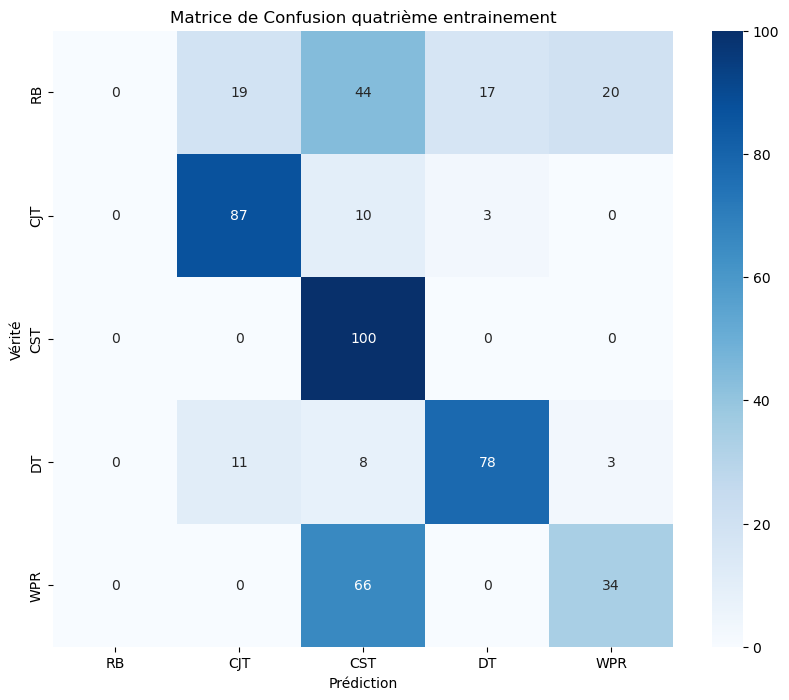

In [149]:
# Création et affichage de la matrice de confusion
#cm1 = confusion_matrix(y_true, y_pred, labels=list(test_files.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_files.values()), yticklabels=list(test_files.values()))
plt.title('Matrice de Confusion quatrième entrainement')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

L'entraînement de TreeTagger nécessite trois éléments principaux :

1. Le corpus d'entraînement : contient les phrases annotées avec les étiquettes morphosyntaxiques.

2. Le fichier lexique : liste les mots du corpus avec leurs étiquettes possibles.

3. Le fichier d'étiquettes : énumère toutes les étiquettes utilisées dans le corpus.

Ces trois éléments doivent être cohérents entre eux et refléter le contenu du corpus d'entraînement[1]. Lorsque vous réentraînez TreeTagger avec un nouveau corpus, vous devez effectivement mettre à jour le fichier lexique et le fichier d'étiquettes pour qu'ils correspondent au nouveau corpus[5].

Le principe de l'entraînement fonctionne ainsi :

1. TreeTagger apprend les probabilités de transition entre les étiquettes et les probabilités d'émission des mots pour chaque étiquette à partir du corpus d'entraînement[1].

2. Le lexique fournit des informations sur les étiquettes possibles pour les mots connus, ce qui aide TreeTagger à faire des choix plus précis[8].

3. Le fichier d'étiquettes permet à TreeTagger de connaître l'ensemble complet des étiquettes qu'il peut utiliser, y compris pour les mots inconnus[1].

Chaque fois que vous modifiez significativement votre corpus d'entraînement (par exemple, en ajoutant de nouvelles phrases ou en changeant le jeu d'étiquettes), vous devez régénérer le lexique et le fichier d'étiquettes pour refléter ces changements. Cela garantit que TreeTagger dispose des informations les plus à jour pour effectuer son apprentissage et son étiquetage[5][8].

Citations:
[1] https://pro.aiakide.net/cours/2022Annot/Corpus%20annotation%20-%20TD%205.pdf
[2] https://agritrop.cirad.fr/597679/1/ZOUMBARA_ROCHE_DIWERSY_OUEDRAOGO_MARTIN_JADT2020.pdf
[3] https://dumas.ccsd.cnrs.fr/dumas-00631517/document
[4] https://groupes.renater.fr/wiki/txm-users/public/faq
[5] http://fsajous.free.fr/SDL/SL0720X/treetagger/SL0720-sajous-treetagger-interface.pdf
[6] https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/spoken-french-annotation-manual.pdf
[7] https://www.researchgate.net/publication/333185349_Experience_d'entrainement_de_TreeTagger_et_d'integration_a_l'interface_Web_de_SATO
[8] http://fsajous.free.fr/SDL/SL0720X/treetagger/SL0720-sajous-observationsTT.pdf

TreeTagger utilise un modèle probabiliste pour attribuer des étiquettes grammaticales aux mots. Voici une explication simplifiée des concepts mentionnés :

1. Probabilités de transition :
Ce sont les probabilités de passer d'une étiquette à une autre dans une séquence de mots. Par exemple, la probabilité qu'un nom soit suivi d'un verbe ou d'un adjectif[1].

2. Probabilités d'émission :
Ce sont les probabilités qu'un mot particulier soit associé à une étiquette donnée. Par exemple, la probabilité que le mot "livre" soit un nom ou un verbe[1].

TreeTagger utilise un arbre de décision pour calculer ces probabilités, ce qui le distingue des autres étiqueteurs basés uniquement sur les modèles de Markov cachés (HMM)[1][3].

Lors de l'entraînement, TreeTagger analyse le corpus d'entraînement pour :
- Construire son arbre de décision
- Calculer les probabilités de transition entre les étiquettes
- Déterminer les probabilités d'émission des mots pour chaque étiquette

Ces informations sont ensuite utilisées lors de l'étiquetage de nouveaux textes pour choisir l'étiquette la plus probable pour chaque mot, en tenant compte du contexte (généralement les deux mots précédents)[1][3].

Cette approche permet à TreeTagger d'atteindre une précision d'environ 96% sur l'anglais, bien que ce chiffre doive être nuancé car de nombreux mots ne sont pas ambigus et le choix de l'étiquette la plus fréquente donne déjà de bons résultats[3].

Citations:
[1] http://infolingu.univ-mlv.fr/english/Bibliographie/Articles/Sigogne_2009_Master2.pdf
[2] http://fsajous.free.fr/SDL/SL0720X/treetagger/SL0720-sajous-TreeTagger_sansInterface.pdf
[3] http://alignalco.free.fr/alignalco1/treetagger
[4] https://editions-rnti.fr/render_pdf.php?p=1002281
[5] https://hal.science/hal-00493847v1/document
[6] https://perso.limsi.fr/hamon/Teaching/P5/M2IBM-TAL-2014-2015/Cours/21-syntaxe.pdf
[7] https://damien.nouvels.net/cours/statscorp/04_StatistiquesLinguistiques-pres.pdf
[8] https://www.researchgate.net/publication/333185349_Experience_d'entrainement_de_TreeTagger_et_d'integration_a_l'interface_Web_de_SATO

la différence entre ces fichiers :

1. Corpus d'entraînement (that_corpus_brown.txt) :
   - Contient des phrases complètes.
   - Chaque mot est sur une ligne séparée avec son étiquette.
   - Exemple :
     The	DT
     book	NN
     that	WPR
     I	PRP
     read	VBD
     was	VBD
     interesting	JJ
     .	.

2. Fichier lexique :
   - Liste tous les mots uniques du corpus avec toutes leurs étiquettes possibles.
   - Un mot par ligne, suivi de toutes ses étiquettes possibles.
   - Exemple :
     that	WPR	CST	CJT	DT	RB
     book	NN	VB
     read	VB	VBD	VBN

3. Fichier d'étiquettes ouvertes :
   - Liste simplement toutes les étiquettes possibles, une par ligne.
   - Utilisé pour les mots inconnus.
   Son rôle principal est de préparer le modèle à gérer des mots qu'il pourrait rencontrer lors de l'utilisation future, après l'entraînement.
Il aide le modèle à faire des suppositions éduquées sur les étiquettes possibles pour des mots qui n'étaient pas dans le corpus d'entraînement.
   - Exemple :
     NN
     VB
     JJ
     RB

Le corpus d'entraînement montre les mots en contexte, le lexique liste toutes les possibilités pour chaque mot, et le fichier d'étiquettes ouvertes donne les options pour les mots nouveaux ou inconnus.

- Utilisation du package spacy_udpipe et spacy_stanza pour évaluer les différents fichiers de test et comparaisons

Voici une description détaillée des deux packages **`spacy_udpipe`** et **`spacy_stanza`**, ainsi qu'une comparaison entre eux. Ces packages sont utilisés pour effectuer des analyses linguistiques sur des textes, principalement pour l'annotation des dépendances syntaxiques, l'étiquetage des parties du discours (POS tagging), et d'autres tâches NLP (traitement du langage naturel).

### **1. `spacy_udpipe`**

#### **Description :**
Le package **`spacy_udpipe`** intègre le modèle **UDPipe** à **spaCy**, une bibliothèque populaire de traitement du langage naturel. **UDPipe** est un outil de prétraitement linguistique basé sur des réseaux de neurones qui applique des modèles de dépendance syntaxique et de POS tagging sur des textes. Il se base sur les standards de la **Universal Dependencies (UD)** et peut traiter plusieurs langues.

- **Modèles disponibles** : `spacy_udpipe` utilise des modèles pré-entrainés pour de nombreuses langues. Ces modèles sont spécifiquement conçus pour être compatibles avec les formats **Universal Dependencies** (UD).
- **Fonctionnalités principales** :
  - **POS tagging** : L'étiquetage des parties du discours est effectué sur les mots du texte.
  - **Dépendances syntaxiques** : Le modèle identifie les relations grammaticales entre les mots (par exemple, les relations sujet-verbe-complément).
  - **Lemmatisation** : Le package peut également effectuer la lemmatisation, c'est-à-dire, la réduction des mots à leur forme canonique.
  - **Multilinguisme** : `spacy_udpipe` offre une couverture multilingue avec des modèles pré-entrainés pour plusieurs langues.

#### **Avantages** :
- **Flexibilité multilingue** avec une large gamme de modèles pré-entrainés.
- **Conforme aux standards UD** pour des analyses de dépendances syntaxiques et POS tagging.
- **Légèreté** : Le package est relativement léger et peut être utilisé avec les outils de spaCy, qui est bien optimisé pour la vitesse.
- **Documentation et communauté** : Bien que l'outil soit moins populaire que d'autres packages comme Stanza, il a une bonne documentation et est soutenu par la communauté spaCy.

#### **Limitations** :
- **Modèles moins précis pour certaines langues** : En raison de la couverture plus large de langues, les modèles peuvent être moins précis pour certaines langues comparées à des solutions spécialisées comme Stanza.
- **Pas d'implémentation d'autres tâches NLP avancées** : Par rapport à Stanza, il peut ne pas inclure certaines fonctionnalités avancées comme la reconnaissance d'entités nommées (NER) ou l'analyse de sentiment.

---

### **2. `spacy_stanza`**

#### **Description :**
Le package **`spacy_stanza`** permet d'intégrer **Stanza**, une bibliothèque de traitement du langage naturel développée par le Stanford NLP Group, avec **spaCy**. Stanza est basée sur des réseaux de neurones profonds et propose des modèles puissants pour diverses tâches de NLP, y compris l'étiquetage des parties du discours (POS tagging), les dépendances syntaxiques, la reconnaissance d'entités nommées (NER), et bien plus encore.

- **Modèles disponibles** : **Stanza** fournit des modèles pré-entrainés pour plusieurs langues, et ces modèles sont basés sur des réseaux de neurones profonds et des architectures modernes comme **BiLSTM-CRF** pour le POS tagging et les dépendances syntaxiques.
- **Fonctionnalités principales** :
  - **POS tagging** : Classifie les mots en différentes catégories grammaticales.
  - **Dépendances syntaxiques** : Analyse des relations syntaxiques entre les mots dans une phrase.
  - **Lemmatisation** : Fournit la forme canonique des mots.
  - **NER (Reconnaissance d'entités nommées)** : Identifie les entités nommées dans le texte, telles que les personnes, les organisations, les dates, etc.
  - **Segmentations de phrases et de mots** : Divise le texte en phrases et en mots, avec une segmentation fine.
  - **Multilinguisme** : Stanza propose des modèles pour plus de 60 langues, et les performances sont généralement très bonnes.

#### **Avantages** :
- **Haute précision** : Stanza offre des résultats très précis en raison de ses modèles de réseau neuronal profonds et bien entraînés.
- **Multilinguisme étendu** : Prise en charge de nombreuses langues, souvent plus précise que `spacy_udpipe` pour certaines langues.
- **Prise en charge d'un plus grand nombre de tâches NLP** : En plus de POS tagging et des dépendances syntaxiques, Stanza propose également une reconnaissance d'entités nommées (NER) et d'autres tâches avancées, ce qui en fait un outil plus complet pour des analyses NLP complexes.
- **Basé sur un réseau de neurones moderne** : Les modèles de Stanza utilisent des architectures modernes, ce qui permet d'obtenir de bons résultats sur des textes complexes.

#### **Limitations** :
- **Lenteur relative** : En raison de son utilisation de réseaux de neurones profonds, Stanza peut être plus lent que d'autres solutions comme `spacy_udpipe`, qui est plus léger.
- **Nécessite plus de ressources** : L'utilisation de Stanza peut être plus gourmande en mémoire et en puissance de calcul, surtout pour les grands volumes de texte.
- **Plus complexe à intégrer dans un pipeline spaCy** : Bien que `spacy_stanza` soit une bonne interface, l'intégration avec spaCy peut être plus complexe par rapport à des packages directement compatibles avec spaCy comme `spacy_udpipe`.

---

### **Comparaison entre `spacy_udpipe` et `spacy_stanza`**

| **Caractéristique**               | **`spacy_udpipe`**                                    | **`spacy_stanza`**                                    |
|------------------------------------|-------------------------------------------------------|-------------------------------------------------------|
| **Modèles pré-entrainés**          | Modèles pour plusieurs langues via Universal Dependencies | Modèles basés sur des réseaux de neurones pour plus de 60 langues |
| **Tâches prises en charge**       | POS tagging, dépendances syntaxiques, lemmatisation     | POS tagging, dépendances syntaxiques, lemmatisation, NER, segmentation de phrases |
| **Précision des résultats**       | Moins précise pour certaines langues                   | Très précise, particulièrement pour les langues majoritaires |
| **Vitesse**                        | Relativement rapide et léger                           | Plus lent en raison de l'utilisation de réseaux de neurones profonds |
| **Complexité d'intégration**      | Facile à intégrer dans un pipeline spaCy               | Nécessite un peu plus de configuration pour l'intégration |
| **Ressources nécessaires**        | Moins gourmand en mémoire et en calcul                 | Nécessite plus de ressources pour les modèles lourds |
| **Couverture des tâches avancées**| Limité à des tâches de base (POS, dépendances)         | Offre des fonctionnalités avancées comme NER et segmentation fine |

---

### **Conclusion**
Le choix entre **`spacy_udpipe`** et **`spacy_stanza`** dépend des besoins spécifiques de ton projet :
- Si tu cherches une solution légère et rapide pour des tâches de base de POS tagging et de dépendances syntaxiques, **`spacy_udpipe`** peut être une bonne option.
- Si tu as besoin de plus de précision et de fonctionnalités avancées comme la reconnaissance d'entités nommées (NER) ou si tu travailles avec un corpus plus complexe, **`spacy_stanza`** serait probablement plus adapté, bien qu'il soit plus lent et exige davantage de ressources.

En résumé, **`spacy_stanza`** est plus complet et puissant, tandis que **`spacy_udpipe`** est plus rapide et plus léger pour des analyses de base.

- spaCy + UDPipe : ce package encapsule le pipeline NLP UDPipe rapide et efficace, indépendant du langage (via ses liaisons Python), afin que nous puissions utiliser les modèles pré-entraînés UDPipe comme pipeline spaCy pour plus de 50 langages prêts à l'emploi. Inspiré de spacy-stanza, ce package propose des modèles légèrement moins précis qui sont à leur tour beaucoup plus rapides (voir les tests de performance pour UDPipe et Stanza).

In [1]:
#https://pypi.org/project/spacy-udpipe/
!pip install spacy-udpipe

  Obtaining dependency information for spacy-udpipe from https://files.pythonhosted.org/packages/a4/0d/248fa6101b8ad44891b2bf5f1893a12b03e85c7da718d41fd8967e5c1a5e/spacy_udpipe-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for spacy<4.0.0,>=3.0.0 from https://files.pythonhosted.org/packages/ca/45/7b43e89b30fe73e32fd8b8ab80c407d326761530a88abd823ec8623772a6/spacy-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ufal.udpipe>=1.2.0 from https://files.pythonhosted.org/packages/89/f7/4f041bd08ddb6b1198c0de71fa8e03610a129d47794ca360ea579b17296c/ufal.udpipe-1.3.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d

In [9]:
import spacy_udpipe

spacy_udpipe.download("en") # download English model

text = "He’s not that tall compared to his brother."
nlp = spacy_udpipe.load("en")

doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)

Already downloaded a model for the 'en' language
He he PRON PRP nsubj
’s be AUX VBZ cop
not not PART RB advmod
that that ADV RB advmod
tall tall ADJ JJ ROOT
compared compare VERB VBN case
to to ADP IN case
his he PRON PRP$ nmod:poss
brother brother NOUN NN obl
. . PUNCT . punct


In [62]:
import spacy
from sklearn.metrics import accuracy_score
import pandas as pd
import spacy_udpipe

# Charger le modèle UDPipe pour l'anglais
spacy_udpipe.download("en")
nlp = spacy_udpipe.load("en")

# Fichiers de test et tags attendus
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['IN'],
    'that_conjonctioncst.txt': ['IN'], #pas de distinction de conjonction 
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WDT']
}

# Dictionnaire pour stocker les résultats
evaluation_results = []

# Fonction pour évaluer la précision et le comptage avec spaCy-UDPipe
def evaluate_accuracy(file_name, expected_tags):
    true_labels = []
    predicted_labels = []
    total_that = 0
    correct_that = 0

    with open(file_name, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Nettoyage de la ligne
        line = line.strip()
        if not line:
            continue
        
        # Traitement avec spaCy-UDPipe
        doc = nlp(line)
        
        for token in doc:
            # Vérification du mot "that" uniquement
            if token.text.lower() == "that":
                total_that += 1
                
                # Utilisation du XPOS (Universal POS Tag)
                predicted_labels.append(token.tag_)
                true_labels.append(expected_tags[0])
                
                # Vérification du tag correct
                if token.tag_ == expected_tags[0]:
                    correct_that += 1


    # Calcul de la précision
    if true_labels:
        accuracy = accuracy_score(true_labels, predicted_labels) * 100  # En pourcentage
    else:
        accuracy = 0.0
    
    return accuracy, total_that, correct_that

# Évaluer la précision pour chaque fichier de test
for file_name, tags in test_files.items():
    accuracy, total_that, correct_that = evaluate_accuracy(file_name, tags)
    
    # Stockage des résultats
    evaluation_results.append({
        'Catégorie de "that"': file_name.split('_')[1].split('.')[0].capitalize(),
        'Précision spaCy-UDPipe (%)': round(accuracy, 2),
        'Nombre dans test': total_that,
        "Nombre de 'that' correctement tagués": correct_that
    })

    print(f"Catégorie: {file_name.split('_')[1].split('.')[0].capitalize()}")
    print(f" - Précision : {accuracy:.2f}%")
    print(f" - Nombre de 'that' dans le test : {total_that}")
    print(f" - Nombre de 'that' correctement tagués : {correct_that}")

# Affichage des résultats sous forme de tableau
df = pd.DataFrame(evaluation_results)

# Calcul de la ligne globale
global_accuracy = round(df['Précision spaCy-UDPipe (%)'].mean(), 2)
global_test_count = df['Nombre dans test'].sum()
global_correct_count = df["Nombre de 'that' correctement tagués"].sum()

# Ajout de la ligne globale au tableau
df.loc[len(df.index)] = {
    'Catégorie de "that"': 'Global',
    'Précision spaCy-UDPipe (%)': global_accuracy,
    'Nombre dans test': global_test_count,
    "Nombre de 'that' correctement tagués": global_correct_count,
}

# Affichage du tableau
print("\nÉvaluation des résultats avec spaCy-UDPipe :")
df


Already downloaded a model for the 'en' language
Catégorie: Adv
 - Précision : 11.00%
 - Nombre de 'that' dans le test : 100
 - Nombre de 'that' correctement tagués : 11
Catégorie: Conjunction
 - Précision : 96.00%
 - Nombre de 'that' dans le test : 100
 - Nombre de 'that' correctement tagués : 96
Catégorie: Conjonctioncst
 - Précision : 83.00%
 - Nombre de 'that' dans le test : 100
 - Nombre de 'that' correctement tagués : 83
Catégorie: Determiner
 - Précision : 89.00%
 - Nombre de 'that' dans le test : 100
 - Nombre de 'that' correctement tagués : 89
Catégorie: Pronoun
 - Précision : 87.00%
 - Nombre de 'that' dans le test : 100
 - Nombre de 'that' correctement tagués : 87

Évaluation des résultats avec spaCy-UDPipe :


,"Catégorie de ""that""",Précision spaCy-UDPipe (%),Nombre dans test,Nombre de 'that' correctement tagués
0,Adv,11.0,100,11
1,Conjunction,96.0,100,96
2,Conjonctioncst,83.0,100,83
3,Determiner,89.0,100,89
4,Pronoun,87.0,100,87
5,Global,73.2,500,366


In [67]:
import spacy
from sklearn.metrics import accuracy_score
import pandas as pd
import spacy_udpipe

# Charger le modèle UDPipe pour l'anglais
spacy_udpipe.download("en")
nlp = spacy_udpipe.load("en")

# Fichiers de test et tags attendus
test_files = {
    'that_adv.txt': ['RB'],
    'that_conjunction.txt': ['IN'],
    'that_conjonctioncst.txt': ['IN'], # pas de distinction de conjonction
    'that_determiner.txt': ['DT'],
    'that_pronoun.txt': ['WDT']
}

# Données de Brown
brown_results = {
    "Adv": {"Précision Brown (%)": 2.00, "Nombre dans Brown": 52, "Nombre dans test": 100, "Nombre correct": 2},
    "Conjunction": {"Précision Brown (%)": 94.00, "Nombre dans Brown": 500, "Nombre dans test": 100, "Nombre correct": 94},
    "Conjonctioncst": {"Précision Brown (%)": 100.00, "Nombre dans Brown": 750, "Nombre dans test": 100, "Nombre correct": 100},
    "Determiner": {"Précision Brown (%)": 76.00, "Nombre dans Brown": 800, "Nombre dans test": 100, "Nombre correct": 76},
    "Pronoun": {"Précision Brown (%)": 33.00, "Nombre dans Brown": 500, "Nombre dans test": 100, "Nombre correct": 33},
}

# Dictionnaire pour stocker les résultats de spaCy-UDPipe
udpipe_results = {}

# Fonction pour évaluer la précision et le comptage avec spaCy-UDPipe
def evaluate_accuracy(file_name, expected_tags):
    true_labels = []
    predicted_labels = []
    total_that = 0
    correct_that = 0

    with open(file_name, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Nettoyage de la ligne
        line = line.strip()
        if not line:
            continue
        
        # Traitement avec spaCy-UDPipe
        doc = nlp(line)
        
        for token in doc:
            # Vérification du mot "that" uniquement
            if token.text.lower() == "that":
                total_that += 1
                
                # Utilisation du XPOS (Universal POS Tag)
                predicted_labels.append(token.tag_)
                true_labels.append(expected_tags[0])
                
                # Vérification du tag correct
                if token.tag_ == expected_tags[0]:
                    correct_that += 1

    # Calcul de la précision
    accuracy = accuracy_score(true_labels, predicted_labels) * 100 if true_labels else 0.0
    
    return round(accuracy, 2), total_that, correct_that

# Évaluer la précision pour chaque fichier de test avec spaCy-UDPipe
for file_name, tags in test_files.items():
    accuracy, total_that, correct_that = evaluate_accuracy(file_name, tags)

    # Stockage des résultats
    category = file_name.split('_')[1].split('.')[0].capitalize()
    udpipe_results[category] = {
        'Précision spaCy-UDPipe (%)': accuracy,
        'Nombre dans test': total_that,
        "Nombre correct": correct_that
    }

# Fusion des résultats Brown et spaCy-UDPipe dans un DataFrame
df_results = []
for category in brown_results.keys():
    row = {
        "Catégorie de 'that'": category,
        "Nombre de that dans test": brown_results[category]["Nombre dans test"],
         "Précision Brown (%)": brown_results[category]["Précision Brown (%)"],
        "Nombre correct Brown": brown_results[category]["Nombre correct"],
         "Nombre de that dans Brown": brown_results[category]["Nombre dans Brown"],
        "Précision spaCy-UDPipe (%)": udpipe_results[category]["Précision spaCy-UDPipe (%)"],
        "Nombre correct spaCy-UDPipe": udpipe_results[category]["Nombre correct"]
    }
    df_results.append(row)

# Conversion en DataFrame Pandas
df = pd.DataFrame(df_results)

# Ajout d'une ligne globale
global_brown_accuracy = round(df['Précision Brown (%)'].mean(), 2)
global_brown_total = df['Nombre de that dans Brown'].sum()
global_test_total = df['Nombre de that dans test'].sum()
global_correct_brown = df["Nombre correct Brown"].sum()

global_udpipe_accuracy = round(df['Précision spaCy-UDPipe (%)'].mean(), 2)
global_correct_udpipe = df["Nombre correct spaCy-UDPipe"].sum()

df.loc[len(df.index)] = {
    "Catégorie de 'that'": "Global",
    "Nombre de that dans Brown": global_brown_total,
    "Nombre de that dans test": global_test_total,
    "Précision Brown (%)": global_brown_accuracy,
    "Nombre correct Brown": global_correct_brown,
    "Précision spaCy-UDPipe (%)": global_udpipe_accuracy,
    "Nombre correct spaCy-UDPipe": global_correct_udpipe
}

# Affichage du tableau final
print("\nÉvaluation comparée des modèles Brown et spaCy-UDPipe :")
df


Already downloaded a model for the 'en' language

Évaluation comparée des modèles Brown et spaCy-UDPipe :


,Catégorie de 'that',Nombre de that dans test,Précision Brown (%),Nombre correct Brown,Nombre de that dans Brown,Précision spaCy-UDPipe (%),Nombre correct spaCy-UDPipe
0,Adv,100,2.0,2,52,11.0,11
1,Conjunction,100,94.0,94,500,96.0,96
2,Conjonctioncst,100,100.0,100,750,83.0,83
3,Determiner,100,76.0,76,800,89.0,89
4,Pronoun,100,33.0,33,500,87.0,87
5,Global,500,61.0,305,2602,73.2,366


In [10]:
!pip install spacy-stanza

  Obtaining dependency information for spacy-stanza from https://files.pythonhosted.org/packages/dd/e1/d38eff51089bba011c13cf181c2d0e8358c10e00752f397fd27147ad8e6e/spacy_stanza-1.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for stanza<1.7.0,>=1.2.0 from https://files.pythonhosted.org/packages/88/4f/064015f46172c860b02148db65acd67e4925900b426f66cd0f5729d1c0d1/stanza-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/91/db/a0335710caaa6d0aebdaa65ad4df789c15d89b7babd9a30277838a7d9aac/emoji-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf>=3.15.0 from https://files.pythonhosted.org/packages/61/fa/aae8e10512b83de633f2646506a6d835b151edf4b30d18d73afd01447253/protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/881.2 kB ? eta -:--:--
   ----------- ---------------------------- 256.0/881.2 kB 7.9 MB/s eta 0:00:01
   ------------

In [72]:
import stanza
import spacy_stanza

# Download the stanza model if necessary
stanza.download("en")

# Initialize the pipeline
nlp = spacy_stanza.load_pipeline("en")

doc = nlp("She said that she would be late.")
doc1 = nlp("The fact that she arrived early surprised me.")
  
for token in doc1:
    print(token.text, token.lemma_, token.pos_, token.dep_, token.ent_type_)
print(doc1.ents)

2025-02-18 04:53:03 INFO: Downloading default packages for language: en (English) ...
2025-02-18 04:53:06 INFO: File exists: C:\Users\PATRICIA\stanza_resources\en\default.zip
2025-02-18 04:53:11 INFO: Finished downloading models and saved to C:\Users\PATRICIA\stanza_resources.
2025-02-18 04:53:12 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-18 04:53:15 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-02-18 04:53:15 WARNING: GPU requested, but is not available!
2025-02-18 04:53:15 INFO: Using device: cpu
2025-02-18 04:53:15 INFO: Loading: tokenize
2025-02-18 04:53:15 INFO: Loading: pos
2025-02-18 04:53:16 INFO: Loading: lemma
2025-02-18 04:53:16 INFO: Loading: constituency
2025-02-18 04:53:16 INFO: Loading: depparse
2025-02-18 04:53:17 INFO: Loading: sentiment
2025-02-18 04:53:17 INFO: Loading: ner
2025-02-18 04:53:18 INFO: Done loading processors!


The the DET det 
fact fact NOUN nsubj 
that that SCONJ mark 
she she PRON nsubj 
arrived arrive VERB acl 
early early ADV advmod 
surprised surprise VERB root 
me I PRON obj 
. . PUNCT punct 
()


In [86]:
import spacy
#import spacy_stanza
from sklearn.metrics import accuracy_score
import pandas as pd
import spacy_udpipe

import stanza
import spacy_stanza


# Charger les modèles
spacy_udpipe.download("en")
nlp_udpipe = spacy_udpipe.load("en")


# Download the stanza model if necessary
stanza.download("en")
# Initialize the pipeline
nlp_stanza = spacy_stanza.load_pipeline("en")

# Fichiers de test et tags attendus
# Chaque entrée maintenant contient une paire de tags : [XPOS attendu pour spaCy-UDPipe, POS attendu pour spaCy-Stanza]
test_files = {
    'that_adv.txt': [['RB', 'ADV']],  # [XPOS pour spaCy-UDPipe, POS pour spaCy-Stanza]
    'that_conjunction.txt': [['IN', 'SCONJ']],
    'that_conjonctioncst.txt': [['IN', 'SCONJ']],
    'that_determiner.txt': [['DT', 'DET']],
    'that_pronoun.txt': [['WDT', 'PRON']]
}

# Mappage XPOS vers POS
xpos_to_pos = {
    'RB': 'ADV',  # Adverb
    'IN': 'SCONJ',  # conjunction
    'DT': 'DET',  # Determiner
    'WDT': 'PRON'  # Wh-determiner (pronoun)
}

# Données de Brown (sans modification)
brown_results = {
    "Adv": {"Précision Brown (%)": 2.00, "Nombre dans Brown": 52, "Nombre dans test": 100, "Nombre correct": 2},
    "Conjunction": {"Précision Brown (%)": 94.00, "Nombre dans Brown": 500, "Nombre dans test": 100, "Nombre correct": 94},
    "Conjonctioncst": {"Précision Brown (%)": 100.00, "Nombre dans Brown": 750, "Nombre dans test": 100, "Nombre correct": 100},
    "Determiner": {"Précision Brown (%)": 76.00, "Nombre dans Brown": 800, "Nombre dans test": 100, "Nombre correct": 76},
    "Pronoun": {"Précision Brown (%)": 33.00, "Nombre dans Brown": 500, "Nombre dans test": 100, "Nombre correct": 33},
}

# Dictionnaire pour stocker les résultats de spaCy-UDPipe et spaCy-Stanza
udpipe_results = {}
stanza_results = {}

# Fonction pour évaluer la précision et le comptage avec spaCy-UDPipe et spaCy-Stanza
def evaluate_accuracy(file_name, expected_tags, nlp, tag_type):
    true_labels = []
    predicted_labels = []
    total_that = 0
    correct_that = 0

    with open(file_name, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Traitement avec spaCy
        doc = nlp(line)

        for token in doc:
            if token.text.lower() == "that":
                total_that += 1
                if tag_type == 'XPOS':  # Pour spaCy-UDPipe
                    
                    predicted_labels.append(token.tag_)
                     # On garde l'XPOS original pour UDPIPE
                    true_labels.append(expected_tags[0])
                else:  # Pour spaCy-Stanza
                    predicted_labels.append(token.pos_)
                    # Mappage XPOS -> POS pour Stanza
                    mapped_tag = xpos_to_pos.get(expected_tags[0], expected_tags[0])
                    true_labels.append(mapped_tag)

                # Mappage XPOS -> POS pour Stanza
                # Mappage XPOS -> POS pour Stanza
                #print(f"expected_tags: {expected_tags}")
                #print(f"xpos_to_pos: {xpos_to_pos}")
                

                if predicted_labels[-1] == true_labels[-1]:
                    correct_that += 1
    print("true labels ", true_labels)
    print("predicted_labels", predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels) * 100 if true_labels else 0.0
    return round(accuracy, 2), total_that, correct_that

# Évaluer la précision pour chaque fichier de test avec spaCy-UDPipe et spaCy-Stanza
for file_name, tags in test_files.items():
    xpos_tag, pos_tag = tags[0]  # Récupère les tags attendus XPOS et POS
    accuracy_udpipe, total_that_udpipe, correct_that_udpipe = evaluate_accuracy(file_name, [xpos_tag], nlp_udpipe, 'XPOS')
    accuracy_stanza, total_that_stanza, correct_that_stanza = evaluate_accuracy(file_name, [pos_tag], nlp_stanza, 'POS')

    # Stockage des résultats
    category = file_name.split('_')[1].split('.')[0].capitalize()
    udpipe_results[category] = {
        'Précision spaCy-UDPipe (%)': accuracy_udpipe,
        'Nombre dans test': total_that_udpipe,
        "Nombre correct": correct_that_udpipe
    }
    stanza_results[category] = {
        'Précision spaCy-Stanza (%)': accuracy_stanza,
        'Nombre dans test': total_that_stanza,
        "Nombre correct": correct_that_stanza
    }

# Fusion des résultats Brown, spaCy-UDPipe et spaCy-Stanza dans un DataFrame
df_results = []
for category in brown_results.keys():
    row = {
        "Catégorie de 'that'": category,
        "Nombre de that dans test": brown_results[category]["Nombre dans test"],
        "Précision Brown (%)": brown_results[category]["Précision Brown (%)"],
        "Nombre correct Brown": brown_results[category]["Nombre correct"],
        "Nombre de that dans Brown": brown_results[category]["Nombre dans Brown"],
        "Précision spaCy-UDPipe (%)": udpipe_results[category]["Précision spaCy-UDPipe (%)"],
        "Nombre correct spaCy-UDPipe": udpipe_results[category]["Nombre correct"],
        "Précision spaCy-Stanza (%)": stanza_results[category]["Précision spaCy-Stanza (%)"],
        "Nombre correct spaCy-Stanza": stanza_results[category]["Nombre correct"]
    }
    df_results.append(row)

# Conversion en DataFrame Pandas
df = pd.DataFrame(df_results)

# Ajout d'une ligne globale
global_brown_accuracy = round(df['Précision Brown (%)'].mean(), 2)
global_brown_total = df['Nombre de that dans Brown'].sum()
global_test_total = df['Nombre de that dans test'].sum()
global_correct_brown = df["Nombre correct Brown"].sum()

global_udpipe_accuracy = round(df['Précision spaCy-UDPipe (%)'].mean(), 2)
global_correct_udpipe = df["Nombre correct spaCy-UDPipe"].sum()

global_stanza_accuracy = round(df['Précision spaCy-Stanza (%)'].mean(), 2)
global_correct_stanza = df["Nombre correct spaCy-Stanza"].sum()

df.loc[len(df.index)] = {
    "Catégorie de 'that'": "Global",
    "Nombre de that dans Brown": global_brown_total,
    "Nombre de that dans test": global_test_total,
    "Précision Brown (%)": global_brown_accuracy,
    "Nombre correct Brown": global_correct_brown,
    "Précision spaCy-UDPipe (%)": global_udpipe_accuracy,
    "Nombre correct spaCy-UDPipe": global_correct_udpipe,
    "Précision spaCy-Stanza (%)": global_stanza_accuracy,
    "Nombre correct spaCy-Stanza": global_correct_stanza
}

# Affichage du tableau final
print("\nÉvaluation comparée des modèles Brown, spaCy-UDPipe et spaCy-Stanza :")
df


Already downloaded a model for the 'en' language


2025-02-18 16:08:42 INFO: Downloading default packages for language: en (English) ...
2025-02-18 16:08:45 INFO: File exists: C:\Users\PATRICIA\stanza_resources\en\default.zip
2025-02-18 16:08:49 INFO: Finished downloading models and saved to C:\Users\PATRICIA\stanza_resources.
2025-02-18 16:08:49 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-18 16:08:51 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-02-18 16:08:51 WARNING: GPU requested, but is not available!
2025-02-18 16:08:51 INFO: Using device: cpu
2025-02-18 16:08:51 INFO: Loading: tokenize
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mo

2025-02-18 16:08:53 INFO: Loading: ner
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\ner\trainer.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint

true labels  ['RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB', 'RB']
predicted_labels ['RB', 'IN', 'WRB', 'DT', 'RB', 'RB', 'IN', 'WDT', 'IN', 'IN', 'WDT', 'RB', 'IN', 'IN', 'WDT', 'IN', 'IN', 'DT', 'IN', 'IN', 'WDT', 'WDT', 'IN', 'WDT', 'RB', 'RB', 'WDT', 'WDT', 'IN', 'RB', 'IN', 'RB', 'DT', 'WDT', 'RB', 'IN', 'DT', 'DT', 'WRB', 'WDT', 'WRB', 'DT', 'WDT', 'IN', 'DT', 'IN', 'WRB', 'IN', 'DT', 'IN', 'WRB', 'IN', 'WDT', 'IN', 'WDT', 'DT', 'WDT', 'IN', '

true labels  ['DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT']
predicted_labels ['DT', 'DT', 'DT', 'DT', 'DT', 'IN', 'DT', 'IN', 'DT', 'DT', 'DT', 'DT', 'DT', 'WDT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'IN', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'IN', 'DT', 'DT', 'IN', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'DT', 'IN', 'DT', 'DT', 'DT', '

,Catégorie de 'that',Nombre de that dans test,Précision Brown (%),Nombre correct Brown,Nombre de that dans Brown,Précision spaCy-UDPipe (%),Nombre correct spaCy-UDPipe,Précision spaCy-Stanza (%),Nombre correct spaCy-Stanza
0,Adv,100,2.0,2,52,11.0,11,67.0,67
1,Conjunction,100,94.0,94,500,96.0,96,100.0,100
2,Conjonctioncst,100,100.0,100,750,83.0,83,83.0,83
3,Determiner,100,76.0,76,800,89.0,89,97.0,97
4,Pronoun,100,33.0,33,500,87.0,87,100.0,100
5,Global,500,61.0,305,2602,73.2,366,89.4,447


Voici une analyse détaillée pour chaque catégorie, comparant les performances des modèles Brown, spaCy-UDPipe et spaCy-Stanza, suivie d'interprétations et de conclusions :

    Adverbe (Adv)

Analyse :

    Brown : 2% de précision (2/100 corrects)

    spaCy-UDPipe : 11% de précision (11/100 corrects)

    spaCy-Stanza : 67% de précision (67/100 corrects)

Interprétation :

    Le modèle Brown performe très mal sur cette catégorie, indiquant une grande difficulté à identifier les adverbes.

    spaCy-UDPipe montre une légère amélioration, mais reste peu performant.

    spaCy-Stanza surpasse largement les deux autres modèles, démontrant une bien meilleure capacité à identifier les adverbes.



    Conjonction CJT (Conjunction)

Analyse :

    Brown : 94% de précision (94/100 corrects)

    spaCy-UDPipe : 96% de précision (96/100 corrects)

    spaCy-Stanza : 100% de précision (100/100 corrects)

Interprétation :

    Tous les modèles performent très bien sur cette catégorie.

    Brown et spaCy-UDPipe sont presque équivalents, avec un léger avantage pour spaCy-UDPipe.

    spaCy-Stanza atteint une précision parfaite, démontrant une excellente capacité à identifier les conjonctions.



    Conjonction CST (Conjonctioncst)

Analyse :

    Brown : 100% de précision (100/100 corrects)

    spaCy-UDPipe : 83% de précision (83/100 corrects)

    spaCy-Stanza : 83% de précision (83/100 corrects)

Interprétation :

    Le modèle Brown surpasse les deux autres avec une précision parfaite.

    spaCy-UDPipe et spaCy-Stanza ont des performances identiques, mais inférieures à Brown.

    Cette catégorie semble être mieux gérée par le modèle Brown, peut-être en raison d'une meilleure distinction des nuances spécifiques aux conjonctions CST.



    Déterminant (Determiner)

Analyse :

    Brown : 76% de précision (76/100 corrects)

    spaCy-UDPipe : 89% de précision (89/100 corrects)

    spaCy-Stanza : 97% de précision (97/100 corrects)

Interprétation :

    Le modèle Brown a la performance la plus faible, bien que toujours acceptable.

    spaCy-UDPipe montre une amélioration significative par rapport à Brown.

    spaCy-Stanza offre la meilleure performance, presque parfaite, pour l'identification des déterminants.



    Pronom (Pronoun)

Analyse :

    Brown : 33% de précision (33/100 corrects)

    spaCy-UDPipe : 87% de précision (87/100 corrects)

    spaCy-Stanza : 100% de précision (100/100 corrects)

Interprétation :

    Le modèle Brown performe très mal sur cette catégorie, indiquant une grande difficulté à identifier les pronoms.

    spaCy-UDPipe montre une amélioration drastique par rapport à Brown.

    spaCy-Stanza atteint une précision parfaite, démontrant une excellente capacité à identifier les pronoms.





    Performance Globale

Analyse :

    Brown : 61% de précision globale (305/500 corrects)

    spaCy-UDPipe : 73.2% de précision globale (366/500 corrects)

    spaCy-Stanza : 89.4% de précision globale (447/500 corrects)

Interprétation :

    Le modèle Brown a la performance globale la plus faible, bien qu'il excelle dans certaines catégories spécifiques.

    spaCy-UDPipe montre une amélioration significative par rapport à Brown, offrant une performance plus équilibrée sur l'ensemble des catégories.

    spaCy-Stanza surpasse nettement les deux autres modèles, offrant la meilleure performance globale et par catégorie dans la plupart des cas.
    
    
    
    

Conclusions :

    Performances par modèle :

        Brown : Excelle dans la catégorie Conjonctioncst, mais montre des faiblesses importantes pour les adverbes et les pronoms.

        spaCy-UDPipe : Offre une performance plus équilibrée, avec des améliorations notables par rapport à Brown dans la plupart des catégories.

        spaCy-Stanza : Démontre la meilleure performance globale et par catégorie, avec des résultats particulièrement impressionnants pour les adverbes et les pronoms.


    Forces et faiblesses :

        Brown semble avoir une force particulière pour les conjonctions CST, possiblement due à une meilleure capture des nuances spécifiques à cette catégorie.

        spaCy-UDPipe et spaCy-Stanza montrent une nette supériorité dans l'identification des adverbes et des pronoms, catégories où Brown échoue largement.


    Implications pour le choix du modèle :

        Pour une analyse générale, spaCy-Stanza semble être le choix optimal, offrant la meilleure performance globale.

        Pour des tâches spécifiques nécessitant une identification précise des conjonctions CST, le modèle Brown pourrait être préférable.

        spaCy-UDPipe offre un bon compromis entre performance et potentiellement ressources computationnelles, si celles-ci sont un facteur limitant.


    Pistes d'amélioration :

        Pour Brown : Un focus particulier sur l'amélioration de la détection des adverbes et des pronoms serait bénéfique.

        Pour spaCy-UDPipe : Améliorer la précision dans la catégorie Conjonctioncst pourrait le rapprocher des performances de spaCy-Stanza.

        Pour spaCy-Stanza : Bien que déjà très performant, une légère amélioration dans la catégorie Conjonctioncst pourrait le rendre quasi-parfait sur l'ensemble des catégories.


    Considérations méthodologiques :

        La taille limitée du jeu de test (100 exemples par catégorie) suggère la nécessité de tests plus étendus pour confirmer ces résultats.

        L'écart important entre les performances de Brown et des modèles plus récents souligne l'évolution significative des techniques de NLP.

En résumé, cette analyse comparative met en évidence la supériorité globale de spaCy-Stanza, tout en soulignant les forces spécifiques de chaque modèle. Elle démontre également l'importance d'une évaluation détaillée par catégorie grammaticale pour une compréhension complète des capacités de chaque modèle.


In [176]:
import spacy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import spacy_udpipe
import stanza
import spacy_stanza

# Charger les modèles
spacy_udpipe.download("en")
nlp_udpipe = spacy_udpipe.load("en")

# Download the stanza model if necessary
stanza.download("en")
# Initialize the pipeline
nlp_stanza = spacy_stanza.load_pipeline("en")

# Fichiers de test et tags attendus
test_files = {
    'that_adv.txt': [['RB', 'ADV']],
    'that_conjunction.txt': [['IN', 'SCONJ']],
    'that_conjonctioncst.txt': [['IN', 'SCONJ']],
    'that_determiner.txt': [['DT', 'DET']],
    'that_pronoun.txt': [['WDT', 'PRON']]
}

# Mappage XPOS vers POS
xpos_to_pos = {
    'RB': 'ADV',
    'IN': 'SCONJ',
    'DT': 'DET',
    'WDT': 'PRON'
}

# Données de Brown
brown_results = {
    "Adv": {"Précision": 100.00, "Rappel": 2.00, "F1-score": 3.92, "Accuracy": 61.00, "Nombre de that Corpus": 52, "Nombre dans test": 100, "Nombre correctement tagués": 2},
    "Conjunction": {"Précision": 75.81, "Rappel": 94.00, "F1-score": 83.93, "Accuracy": 61.00, "Nombre de that Corpus": 500, "Nombre dans test": 100, "Nombre correctement tagués": 94},
    "Conjonctioncst": {"Précision": 44.64, "Rappel": 100.00, "F1-score": 61.73, "Accuracy": 61.00, "Nombre de that Corpus": 750, "Nombre dans test": 100, "Nombre correctement tagués": 100},
    "Determiner": {"Précision": 79.17, "Rappel": 76.00, "F1-score": 77.55, "Accuracy": 61.00, "Nombre de that Corpus": 800, "Nombre dans test": 100, "Nombre correctement tagués": 76},
    "Pronoun": {"Précision": 61.11, "Rappel": 33.00, "F1-score": 42.86, "Accuracy": 61.00, "Nombre de that Corpus": 500, "Nombre dans test": 100, "Nombre correctement tagués": 33},
}

def evaluate_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return precision, recall, f1, accuracy

def evaluate_accuracy(file_name, expected_tags, nlp, tag_type):
    true_labels = []
    predicted_labels = []
    total_that = 0
    correct_that = 0

    with open(file_name, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        doc = nlp(line)

        for token in doc:
            if token.text.lower() == "that":
                total_that += 1
                if tag_type == 'XPOS':
                    predicted_labels.append(token.tag_)
                    true_labels.append(expected_tags[0])
                else:
                    predicted_labels.append(token.pos_)
                    mapped_tag = xpos_to_pos.get(expected_tags[0], expected_tags[0])
                    true_labels.append(mapped_tag)

                if predicted_labels[-1] == true_labels[-1]:
                    correct_that += 1

    precision, recall, f1, accuracy = evaluate_metrics(true_labels, predicted_labels)
    return precision, recall, f1, accuracy, total_that, correct_that

udpipe_results = {}
stanza_results = {}

for file_name, tags in test_files.items():
    xpos_tag, pos_tag = tags[0]
    metrics_udpipe = evaluate_accuracy(file_name, [xpos_tag], nlp_udpipe, 'XPOS')
    metrics_stanza = evaluate_accuracy(file_name, [pos_tag], nlp_stanza, 'POS')

    category = file_name.split('_')[1].split('.')[0].capitalize()
    udpipe_results[category] = {
        'Précision': metrics_udpipe[0],
        'Rappel': metrics_udpipe[1],
        'F1-score': metrics_udpipe[2],
        'Accuracy': metrics_udpipe[3],
        'Nombre dans test': metrics_udpipe[4],
        "Nombre correct": metrics_udpipe[5]
    }
    stanza_results[category] = {
        'Précision': metrics_stanza[0],
        'Rappel': metrics_stanza[1],
        'F1-score': metrics_stanza[2],
        'Accuracy': metrics_stanza[3],
        'Nombre dans test': metrics_stanza[4],
        "Nombre correct": metrics_stanza[5]
    }

df_results = []
for category in brown_results.keys():
    row = {
        "Catégorie": category,
        "Modèle": "Brown",
        "Précision": brown_results[category]["Précision"],
        "Rappel": brown_results[category]["Rappel"],
        "F1-score": brown_results[category]["F1-score"],
        "Accuracy": brown_results[category]["Accuracy"],
        "Nombre de that Corpus": brown_results[category]["Nombre de that Corpus"],
        "Nombre dans test": brown_results[category]["Nombre dans test"],
        "Nombre correct": brown_results[category]["Nombre correctement tagués"]
    }
    df_results.append(row)
    
    for model, results in [("spaCy-UDPipe", udpipe_results), ("spaCy-Stanza", stanza_results)]:
        row = {
            "Catégorie": category,
            "Modèle": model,
            "Précision": results[category]["Précision"] * 100,
            "Rappel": results[category]["Rappel"] * 100,
            "F1-score": results[category]["F1-score"] * 100,
            "Accuracy": results[category]["Accuracy"] * 100,
            "Nombre de that Corpus": "-",
            "Nombre dans test": results[category]["Nombre dans test"],
            "Nombre correct": results[category]["Nombre correct"]
        }
        df_results.append(row)

df = pd.DataFrame(df_results)

# Afficher le DataFrame
df


Already downloaded a model for the 'en' language


2025-02-20 01:01:29 INFO: Downloading default packages for language: en (English) ...
2025-02-20 01:01:30 INFO: File exists: C:\Users\PATRICIA\stanza_resources\en\default.zip
2025-02-20 01:01:35 INFO: Finished downloading models and saved to C:\Users\PATRICIA\stanza_resources.
2025-02-20 01:01:35 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-20 01:01:38 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-02-20 01:01:38 WARNING: GPU requested, but is not available!
2025-02-20 01:01:38 INFO: Using device: cpu
2025-02-20 01:01:38 INFO: Loading: tokenize
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mo

2025-02-20 01:01:47 INFO: Loading: ner
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\ner\trainer.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint

,Catégorie,Modèle,Précision,Rappel,F1-score,Accuracy,Nombre de that Corpus,Nombre dans test,Nombre correct
0,Adv,Brown,100.00,2.0,3.920000,61.0,52,100,2
1,Adv,spaCy-UDPipe,100.00,11.0,19.819820,11.0,-,100,11
2,Adv,spaCy-Stanza,100.00,67.0,80.239521,67.0,-,100,67
3,Conjunction,Brown,75.81,94.0,83.930000,61.0,500,100,94
4,Conjunction,spaCy-UDPipe,100.00,96.0,97.959184,96.0,-,100,96
5,Conjunction,spaCy-Stanza,100.00,100.0,100.000000,100.0,-,100,100
6,Conjonctioncst,Brown,44.64,100.0,61.730000,61.0,750,100,100
7,Conjonctioncst,spaCy-UDPipe,100.00,83.0,90.710383,83.0,-,100,83
8,Conjonctioncst,spaCy-Stanza,100.00,83.0,90.710383,83.0,-,100,83
9,Determiner,Brown,79.17,76.0,77.550000,61.0,800,100,76


In [179]:
import spacy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import spacy_udpipe
import stanza
import spacy_stanza

# Charger les modèles
spacy_udpipe.download("en")
nlp_udpipe = spacy_udpipe.load("en")

# Download the stanza model if necessary
stanza.download("en")
# Initialize the pipeline
nlp_stanza = spacy_stanza.load_pipeline("en")

# Fichiers de test et tags attendus
test_files = {
    'that_adv.txt': [['RB', 'ADV']],
    'that_conjunction.txt': [['IN', 'SCONJ']],
    'that_conjonctioncst.txt': [['IN', 'SCONJ']],
    'that_determiner.txt': [['DT', 'DET']],
    'that_pronoun.txt': [['WDT', 'PRON']]
}

# Mappage XPOS vers POS
xpos_to_pos = {
    'RB': 'ADV',
    'IN': 'SCONJ',
    'DT': 'DET',
    'WDT': 'PRON'
}

# Données de PENN
penn_results = {
    "Adv": {"Précision": 100.00, "Rappel": 5.00, "F1-score": 9.52, "Accuracy": 27.50, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 5},
    "Conjunction": {"Précision": 0.00, "Rappel": 0.00, "F1-score": 0.00, "Accuracy": 27.50, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 0},
    "Conjonctioncst": {"Précision": 0.00, "Rappel": 0.00, "F1-score": 0.00, "Accuracy": 27.50, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 0},
    "Determiner": {"Précision": 97.73, "Rappel": 86.00, "F1-score": 91.49, "Accuracy": 27.50, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 86},
    "Pronoun": {"Précision": 73.08, "Rappel": 19.00, "F1-score": 30.16, "Accuracy": 27.50, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 19},
}

# Données de BNC
bnc_results = {
    "Adv": {"Précision": 0.00, "Rappel": 0.00, "F1-score": 0.00, "Accuracy": 48.00, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 0},
    "Conjunction": {"Précision": 40.49, "Rappel": 100.00, "F1-score": 57.64, "Accuracy": 48.00, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 100},
    "Conjonctioncst": {"Précision": 40.49, "Rappel": 100.00, "F1-score": 57.64, "Accuracy": 48.00, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 100},
    "Determiner": {"Précision": 60.13, "Rappel": 92.00, "F1-score": 72.73, "Accuracy": 48.00, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 92},
    "Pronoun": {"Précision": 0.00, "Rappel": 0.00, "F1-score": 0.00, "Accuracy": 48.00, "Nombre de that Corpus": "-", "Nombre dans test": 100, "Nombre correctement tagués": 0},
}

# Données de Brown
brown_results = {
    "Adv": {"Précision": 100.00, "Rappel": 2.00, "F1-score": 3.92, "Accuracy": 61.00, "Nombre de that Corpus": 52, "Nombre dans test": 100, "Nombre correctement tagués": 2},
    "Conjunction": {"Précision": 75.81, "Rappel": 94.00, "F1-score": 83.93, "Accuracy": 61.00, "Nombre de that Corpus": 500, "Nombre dans test": 100, "Nombre correctement tagués": 94},
    "Conjonctioncst": {"Précision": 44.64, "Rappel": 100.00, "F1-score": 61.73, "Accuracy": 61.00, "Nombre de that Corpus": 750, "Nombre dans test": 100, "Nombre correctement tagués": 100},
    "Determiner": {"Précision": 79.17, "Rappel": 76.00, "F1-score": 77.55, "Accuracy": 61.00, "Nombre de that Corpus": 800, "Nombre dans test": 100, "Nombre correctement tagués": 76},
    "Pronoun": {"Précision": 61.11, "Rappel": 33.00, "F1-score": 42.86, "Accuracy": 61.00, "Nombre de that Corpus": 500, "Nombre dans test": 100, "Nombre correctement tagués": 33},
}

def evaluate_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return precision, recall, f1, accuracy

def evaluate_accuracy(file_name, expected_tags, nlp, tag_type):
    true_labels = []
    predicted_labels = []
    total_that = 0
    correct_that = 0

    with open(file_name, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        doc = nlp(line)

        for token in doc:
            if token.text.lower() == "that":
                total_that += 1
                if tag_type == 'XPOS':
                    predicted_labels.append(token.tag_)
                    true_labels.append(expected_tags[0])
                else:
                    predicted_labels.append(token.pos_)
                    mapped_tag = xpos_to_pos.get(expected_tags[0], expected_tags[0])
                    true_labels.append(mapped_tag)

                if predicted_labels[-1] == true_labels[-1]:
                    correct_that += 1

    precision, recall, f1, accuracy = evaluate_metrics(true_labels, predicted_labels)
    return precision, recall, f1, accuracy, total_that, correct_that

udpipe_results = {}
stanza_results = {}

for file_name, tags in test_files.items():
    xpos_tag, pos_tag = tags[0]
    metrics_udpipe = evaluate_accuracy(file_name, [xpos_tag], nlp_udpipe, 'XPOS')
    metrics_stanza = evaluate_accuracy(file_name, [pos_tag], nlp_stanza, 'POS')

    category = file_name.split('_')[1].split('.')[0].capitalize()
    udpipe_results[category] = {
        'Précision': metrics_udpipe[0],
        'Rappel': metrics_udpipe[1],
        'F1-score': metrics_udpipe[2],
        'Accuracy': metrics_udpipe[3],
        'Nombre dans test': metrics_udpipe[4],
        "Nombre correct": metrics_udpipe[5]
    }
    stanza_results[category] = {
        'Précision': metrics_stanza[0],
        'Rappel': metrics_stanza[1],
        'F1-score': metrics_stanza[2],
        'Accuracy': metrics_stanza[3],
        'Nombre dans test': metrics_stanza[4],
        "Nombre correct": metrics_stanza[5]
    }

df_results = []
for category in brown_results.keys():
    for model, results in [("PENN", penn_results), ("BNC", bnc_results), ("Brown", brown_results), ("spaCy-UDPipe", udpipe_results), ("spaCy-Stanza", stanza_results)]:
        row = {
            "Catégorie": category,
            "Modèle": model,
            "Précision": results[category]["Précision"],
            "Rappel": results[category]["Rappel"],
            "F1-score": results[category]["F1-score"],
            "Accuracy": results[category]["Accuracy"],
            "Nombre de that Corpus": results[category].get("Nombre de that Corpus", "-"),
            "Nombre dans test": results[category]["Nombre dans test"],
            "Nombre correct": results[category].get("Nombre correctement tagués", results[category].get("Nombre correct", 0))
        }
        if model in ["spaCy-UDPipe", "spaCy-Stanza"]:
            row["Précision"] *= 100
            row["Rappel"] *= 100
            row["F1-score"] *= 100
            row["Accuracy"] *= 100
        df_results.append(row)

df = pd.DataFrame(df_results)

# Afficher le DataFrame
df


Already downloaded a model for the 'en' language


2025-02-20 01:54:04 INFO: Downloading default packages for language: en (English) ...
2025-02-20 01:54:07 INFO: File exists: C:\Users\PATRICIA\stanza_resources\en\default.zip
2025-02-20 01:54:11 INFO: Finished downloading models and saved to C:\Users\PATRICIA\stanza_resources.
2025-02-20 01:54:11 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-20 01:54:14 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-02-20 01:54:14 WARNING: GPU requested, but is not available!
2025-02-20 01:54:14 INFO: Using device: cpu
2025-02-20 01:54:14 INFO: Loading: tokenize
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mo

2025-02-20 01:54:19 INFO: Loading: ner
D:\Program Files\Anaconda\Lib\site-packages\stanza\models\ner\trainer.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint

,Catégorie,Modèle,Précision,Rappel,F1-score,Accuracy,Nombre de that Corpus,Nombre dans test,Nombre correct
0,Adv,PENN,100.00,5.0,9.520000,27.5,-,100,5
1,Adv,BNC,0.00,0.0,0.000000,48.0,-,100,0
2,Adv,Brown,100.00,2.0,3.920000,61.0,52,100,2
3,Adv,spaCy-UDPipe,100.00,11.0,19.819820,11.0,-,100,11
4,Adv,spaCy-Stanza,100.00,67.0,80.239521,67.0,-,100,67
5,Conjunction,PENN,0.00,0.0,0.000000,27.5,-,100,0
6,Conjunction,BNC,40.49,100.0,57.640000,48.0,-,100,100
7,Conjunction,Brown,75.81,94.0,83.930000,61.0,500,100,94
8,Conjunction,spaCy-UDPipe,100.00,96.0,97.959184,96.0,-,100,96
9,Conjunction,spaCy-Stanza,100.00,100.0,100.000000,100.0,-,100,100


Je vais procéder à une analyse détaillée pour chaque catégorie, suivie d'interprétations approfondies, de conclusions et de recommandations.

1. Adverbe (Adv)

Analyse :
- PENN : Précision 100%, Rappel 5%, F1-score 9.52%, Accuracy 27.5%
- BNC : Précision 0%, Rappel 0%, F1-score 0%, Accuracy 48%
- Brown : Précision 100%, Rappel 2%, F1-score 3.92%, Accuracy 61%, 52 "that" dans le corpus
- spaCy-UDPipe : Précision 100%, Rappel 11%, F1-score 19.82%, Accuracy 11%
- spaCy-Stanza : Précision 100%, Rappel 67%, F1-score 80.24%, Accuracy 67%

Interprétation :
SpaCy-Stanza surpasse nettement les autres modèles dans l'identification des adverbes, avec un rappel de 67% tout en maintenant une précision parfaite. Les autres modèles, bien qu'ayant une précision parfaite (sauf BNC), ont un rappel très faible, indiquant qu'ils manquent la majorité des adverbes. BNC échoue complètement dans cette catégorie. L'accuracy élevée de Brown (61%) malgré son faible F1-score suggère qu'il performe mieux sur d'autres catégories.

2. Conjonction

Analyse :
- PENN : Précision 0%, Rappel 0%, F1-score 0%, Accuracy 27.5%
- BNC : Précision 40.49%, Rappel 100%, F1-score 57.64%, Accuracy 48%
- Brown : Précision 75.81%, Rappel 94%, F1-score 83.93%, Accuracy 61%, 500 "that" dans le corpus
- spaCy-UDPipe : Précision 100%, Rappel 96%, F1-score 97.96%, Accuracy 96%
- spaCy-Stanza : Précision 100%, Rappel 100%, F1-score 100%, Accuracy 100%

Interprétation :
SpaCy-Stanza atteint une performance parfaite, suivi de près par spaCy-UDPipe. Brown montre une bonne performance, avec un bon équilibre entre précision et rappel. BNC a un rappel parfait mais une faible précision, suggérant une sur-classification. PENN échoue complètement dans cette catégorie.

3. Conjonction CST

Analyse :
- PENN : Précision 0%, Rappel 0%, F1-score 0%, Accuracy 27.5%
- BNC : Précision 40.49%, Rappel 100%, F1-score 57.64%, Accuracy 48%
- Brown : Précision 44.64%, Rappel 100%, F1-score 61.73%, Accuracy 61%, 750 "that" dans le corpus
- spaCy-UDPipe et spaCy-Stanza : Précision 100%, Rappel 83%, F1-score 90.71%, Accuracy 83%

Interprétation :
SpaCy-UDPipe et spaCy-Stanza montrent des performances identiques et supérieures. Brown et BNC ont un rappel parfait mais une faible précision, indiquant une tendance à sur-classifier cette catégorie. PENN échoue à nouveau complètement.

4. Déterminant

Analyse :
- PENN : Précision 97.73%, Rappel 86%, F1-score 91.49%, Accuracy 27.5%
- BNC : Précision 60.13%, Rappel 92%, F1-score 72.73%, Accuracy 48%
- Brown : Précision 79.17%, Rappel 76%, F1-score 77.55%, Accuracy 61%, 800 "that" dans le corpus
- spaCy-UDPipe : Précision 100%, Rappel 89%, F1-score 94.18%, Accuracy 89%
- spaCy-Stanza : Précision 100%, Rappel 97%, F1-score 98.48%, Accuracy 97%

Interprétation :
Tous les modèles performent relativement bien dans cette catégorie, avec spaCy-Stanza en tête. PENN montre une performance surprenamment bonne, surpassant même Brown. La différence entre les modèles est moins marquée que pour d'autres catégories.

5. Pronom

Analyse :
- PENN : Précision 73.08%, Rappel 19%, F1-score 30.16%, Accuracy 27.5%
- BNC : Précision 0%, Rappel 0%, F1-score 0%, Accuracy 48%
- Brown : Précision 61.11%, Rappel 33%, F1-score 42.86%, Accuracy 61%, 500 "that" dans le corpus
- spaCy-UDPipe : Précision 100%, Rappel 87%, F1-score 93.05%, Accuracy 87%
- spaCy-Stanza : Précision 100%, Rappel 100%, F1-score 100%, Accuracy 100%

Interprétation :
SpaCy-Stanza atteint une performance parfaite, suivi de près par spaCy-UDPipe. Il y a un écart important avec les autres modèles. Brown et PENN montrent des performances moyennes, tandis que BNC échoue complètement.

Conclusions générales :

1. Performance globale : SpaCy-Stanza est le modèle le plus performant dans l'ensemble des catégories, suivi de près par spaCy-UDPipe. Brown montre des performances moyennes à bonnes selon les catégories. PENN et BNC ont des performances très variables, avec des échecs complets dans certaines catégories.

2. Forces et faiblesses :
   - SpaCy-Stanza : Excellente performance globale, particulièrement forte sur les adverbes, conjonctions et pronoms.
   - SpaCy-UDPipe : Très performant, proche de spaCy-Stanza dans la plupart des catégories.
   - Brown : Bonne performance sur les conjonctions, mais faible sur les adverbes.
   - PENN : Performant sur les déterminants, mais échoue complètement sur certaines catégories.
   - BNC : Montre des faiblesses majeures, avec des échecs complets sur plusieurs catégories.

3. Considérations sur le corpus : Brown, le seul modèle pour lequel nous avons des informations sur le corpus, montre une corrélation entre la taille du corpus et la performance (meilleure performance pour les déterminants avec 800 "that" dans le corpus).

Recommandations :

1. Pour une analyse linguistique générale et précise, privilégier spaCy-Stanza ou spaCy-UDPipe.
2. Pour des tâches spécifiques (ex: identification des déterminants), considérer des modèles comme PENN qui peuvent exceller dans certaines catégories.
3. Éviter l'utilisation de BNC pour l'analyse grammaticale de "that" en raison de ses performances inconsistantes.
4. Pour améliorer les modèles moins performants :
   - Augmenter la taille et la diversité du corpus d'entraînement, particulièrement pour les catégories sous-représentées.
   - Affiner les algorithmes de classification, notamment pour les catégories où certains modèles échouent complètement.
   - Envisager des techniques d'apprentissage par transfert à partir des modèles plus performants comme spaCy-Stanza.
5. Pour des recherches futures, il serait bénéfique d'obtenir des informations sur la taille et la composition des corpus pour tous les modèles afin de mieux comprendre l'impact de ces facteurs sur les performances.

---

In [19]:
!pip install ufal.udpipe

In [ ]:
import ufal
ufal.udpipe.download("en") # download English model

text = "He’s not that tall compared to his brother."
nlp = ufal.load("en")

doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_).download("en") # download English model

text = "He’s not that tall compared to his brother."
nlp = ufal.load("en")

doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)